Define the base cosmology, which is the Planck 2018 cosmology. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import consts
import halo
import precalc as pc
import powerspectra as ps
import cib

(210,)
Note: redshifts have been re-sorted (earliest first)


/Users/tkarim/research/galCIB/powerspectra.py:64: RuntimeWarning: divide by zero encountered in log10
  ELL_sampled = np.logspace(np.log10(consts.LMIN),
/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


# Plots for Publication

In [4]:
# fontsize
fs = 20

### Interpolated $P(k)$ over the $k$ grid corresponding to the $\ell$ and $z$ grids.

Text(0.5, 0, '$k$ Mpc$^{-1}$')

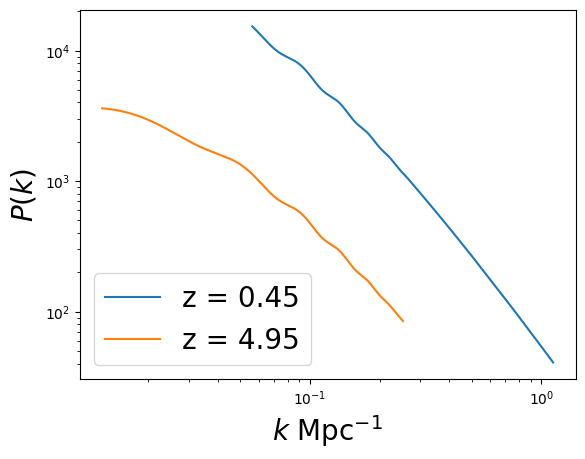

In [86]:
idx = 5

plt.loglog(consts.k_grid_over_ell[:,idx],
           consts.Pk_array_over_ell[:,idx],
           label = f'z = {np.round(consts.Plin["z"][idx],2)}')

idx = 50
plt.loglog(consts.k_grid_over_ell[:,idx],
           consts.Pk_array_over_ell[:,idx],
           label = f'z = {np.round(consts.Plin["z"][idx],2)}')

plt.legend(loc = 'best', fontsize = fs)
plt.ylabel(r"$P(k)$",fontsize = fs)
plt.xlabel(r"$k$ Mpc$^{-1}$", fontsize = fs)


### Fourier Transformed Radial Profiles

In [87]:
# best fit from Rocher et al. 2023

fexp = 0.58; tau_prof = 6.14; lambda_NFW = 0.67
prof_params = fexp, tau_prof, lambda_NFW

In [88]:
uprof,expterm,nfwterm = halo.uprof_mixed(prof_params=prof_params, rad200=pc.rad200, c=pc.concentration, c_term=pc.concentration_amp, plot=True)

In [89]:
%timeit uprof,expterm,nfwterm = halo.uprof_mixed(prof_params=prof_params, rad200=pc.rad200, c=pc.concentration, c_term=pc.concentration_amp, plot=True)

KeyboardInterrupt: 

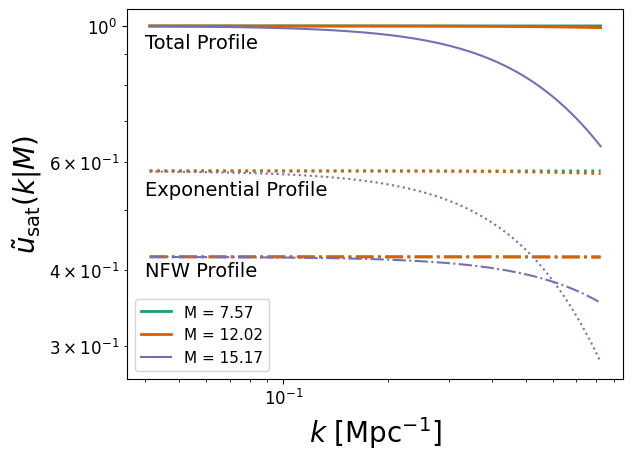

In [ ]:
midx = 5 #mass ID
zidx = 7 #z ID
color = '#1b9e77'
plt.plot(consts.k_grid_over_ell[:,zidx], uprof[:,midx,zidx],
         ls = 'solid', lw = 2,
         c = color, 
         label = f'M = {np.round(np.log10(consts.Mh_Msol[midx]),2)}')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         fexp*expterm[:,midx,zidx], lw = 2,
         c=color, ls = 'dotted')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         (1-fexp)*nfwterm[:,midx,zidx], lw = 2,
         c=color, ls='dashdot')

midx = 60 #mass ID
color = '#d95f02'
plt.plot(consts.k_grid_over_ell[:,zidx], uprof[:,midx,zidx],
         ls = 'solid',lw = 2,
         c = color, 
         label = f'M = {np.round(np.log10(consts.Mh_Msol[midx]),2)}')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         fexp*expterm[:,midx,zidx],lw = 2,
         c = color, ls = 'dotted')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         (1-fexp)*nfwterm[:,midx,zidx],lw = 2,
         c = color, ls='dashdot')

# midx = 70 #mass ID
# plt.plot(consts.k_grid_over_ell[:,zidx], uprof[:,midx,zidx],
#          ls = 'solid',lw = 2,
#          c = '#b2df8a', 
#          label = f'M = {np.round(np.log10(consts.Mh_Msol[midx]),2)}')
# plt.plot(consts.k_grid_over_ell[:,zidx], 
#          fexp*expterm[:,midx,zidx],lw = 2,
#          c='#b2df8a', ls = 'dotted')
# plt.plot(consts.k_grid_over_ell[:,zidx], 
#          (1-fexp)*nfwterm[:,midx,zidx],lw = 2,
#          c='#b2df8a', ls='dashdot')

midx = -1 #mass ID
color = '#7570b3'
plt.plot(consts.k_grid_over_ell[:,zidx], uprof[:,midx,zidx],
         ls = 'solid',
         c = color, label = f'M = {np.round(np.log10(consts.Mh_Msol[midx]),2)}')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         fexp*expterm[:,midx,zidx], 
         c = color, ls = 'dotted')
plt.plot(consts.k_grid_over_ell[:,zidx], 
         (1-fexp)*nfwterm[:,midx,zidx],
         c = color, ls='dashdot')

#plt.title(f"M = {np.round(np.log10(consts.Mh_Msol[60]),2)}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$k$ [Mpc$^{-1}]$", fontsize = fs)
plt.ylabel(r"$\tilde{u}_{\rm sat} (k|M)$", fontsize = fs)
plt.legend(loc = 'best', fontsize = 11)

plt.text(4e-2, 9.2e-1, 'Total Profile', fontsize = 14)
plt.text(4e-2, 5.3e-1, 'Exponential Profile', fontsize = 14)
plt.text(4e-2, 3.9e-1, 'NFW Profile', fontsize = 14)
plt.tick_params(axis='both', which='both', labelsize=12)

#plt.savefig("sat_profile_z_105.pdf", dpi = 250, bbox_inches = 'tight')

### Halo Bias

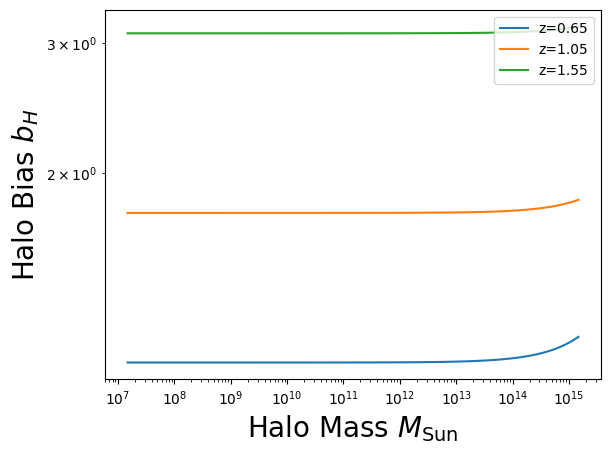

In [ ]:
zidx = 7
plt.loglog(consts.Mh_Msol, 
           pc.halo_biases[:,zidx],
           label = f"z={np.round(consts.Plin['z'][zidx],2)}")

zidx = 11
plt.loglog(consts.Mh_Msol, 
           pc.halo_biases[:,zidx],
           label = f"z={np.round(consts.Plin['z'][zidx],2)}")

zidx = 16
plt.loglog(consts.Mh_Msol, 
           pc.halo_biases[:,zidx],
           label = f"z={np.round(consts.Plin['z'][zidx],2)}")

plt.ylabel(r"Halo Bias $b_H$",fontsize=fs)
plt.xlabel(r"Halo Mass $M_{\rm Sun}$", fontsize = fs)
plt.legend(loc = 'best')

### Radial Kernel

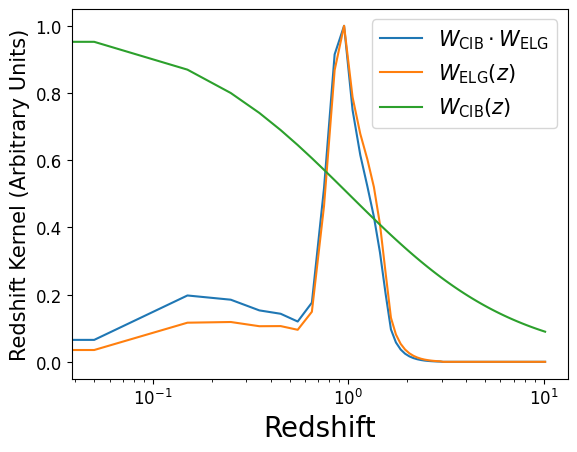

In [ ]:
plt.plot(consts.Plin['z'], 
         pc.w_cibxgal/pc.w_cibxgal.max(), 
         label = r'$W_{\rm CIB} \cdot W_{\rm ELG}$')
plt.plot(consts.Plin['z'],
         pc.w_gal_tot/pc.w_gal_tot.max(),
         label = r'$W_{\rm ELG}(z)$')
plt.plot(consts.Plin['z'],
         pc.w_cib/pc.w_cib.max(),
         label = r'$W_{\rm CIB}(z)$')
plt.xlabel("Redshift", fontsize = fs)
plt.ylabel(r"Redshift Kernel (Arbitrary Units)",
           fontsize = 15)
plt.legend(loc = 'best', fontsize = 15)
plt.xscale("log")
plt.tick_params(axis='both', which='both', labelsize=12)

#plt.savefig("redshift_kernel.pdf", dpi = 250, bbox_inches = 'tight')

### Halo Mass Function

Text(0, 0.5, 'HMF')

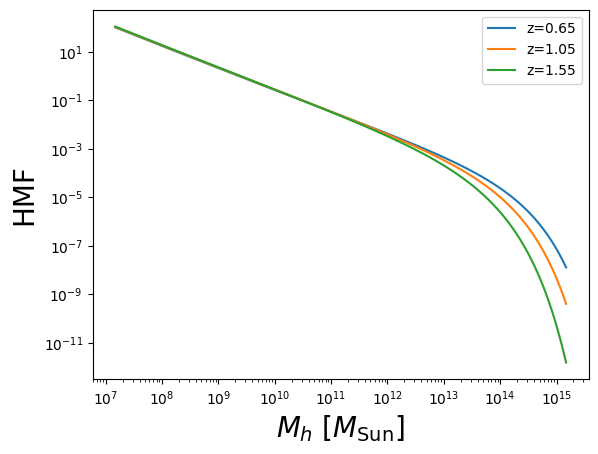

In [ ]:
zidx = 7
plt.loglog(consts.Mh_Msol,
           consts.hmfz[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 11
plt.loglog(consts.Mh_Msol,
           consts.hmfz[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 16
plt.loglog(consts.Mh_Msol,
           consts.hmfz[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

plt.legend(loc = 'best')
plt.xlabel(r"$M_h$ [$M_{\rm Sun}$]",
           fontsize = fs)
plt.ylabel("HMF",
           fontsize = fs)

### HMF $\times b_H$

In [ ]:
zidx = 7
plt.loglog(consts.Mh_Msol,
           HMFxbh.T[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 11
plt.loglog(consts.Mh_Msol,
           HMFxbh.T[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 16
plt.loglog(consts.Mh_Msol,
           HMFxbh.T[zidx,:],
           label=f'z={np.round(consts.Plin["z"][zidx],2)}')

plt.legend(loc = 'best')
plt.xlabel(r"$M_h$ [$M_{\rm Sun}$]",
           fontsize = fs)
plt.ylabel(r"HMF $\times b_H$",
           fontsize = fs)

NameError: name 'HMFxbh' is not defined

### HOD of ELGs

In [ ]:
import gal 

In [ ]:
gamma_hod_elg, log10Mc_hod_elg, sigmaM_hod_elg, Ac = 5.47, 11.64, 0.30, 0.1
cen_params = (gamma_hod_elg, log10Mc_hod_elg, sigmaM_hod_elg, Ac)

As, M0_hod_elg, M1_hod_elg, alpha_hod_elg = 0.41, 10**(11.20), 0.41**0.81 * 10**(13.84), 0.81
sat_params = (As, M0_hod_elg, M1_hod_elg, alpha_hod_elg)

Mmin_hod_ir, IR_sigma_lnM = 12.74, 0.4
ir_params = (Mmin_hod_ir, IR_sigma_lnM)


In [ ]:
Ncen_ELG = gal.Ncen(hod_params=cen_params,
         gal_type='ELG')
Nsat_ELG = gal.Nsat(hod_params=sat_params)
Ncen_IR = gal.Ncen(hod_params=ir_params, 
                   gal_type='IR')

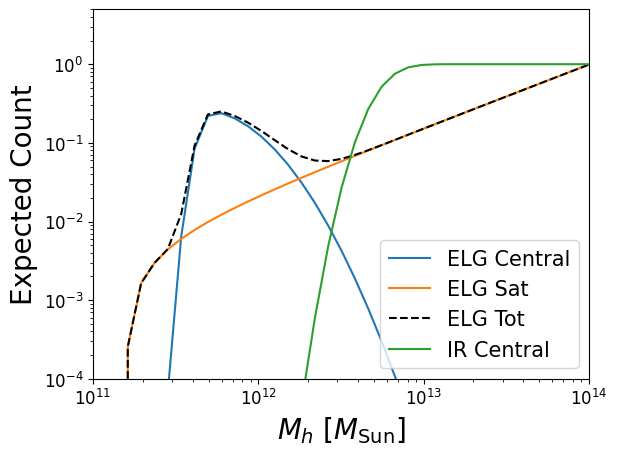

In [ ]:
plt.loglog(consts.Mh_Msol,
           Ncen_ELG, 
           label = 'ELG Central')

plt.loglog(consts.Mh_Msol,
           Nsat_ELG, 
           label = 'ELG Sat')

plt.loglog(consts.Mh_Msol,
           Nsat_ELG + Ncen_ELG, 
           label = 'ELG Tot',
           c = 'k', ls = '--')

plt.loglog(consts.Mh_Msol,
           Ncen_IR, 
           label = 'IR Central')

plt.legend(loc = 'best', fontsize = 15)
plt.xlabel(r"$M_h$ [$M_{\rm Sun}$]",
           fontsize = fs)
plt.ylabel("Expected Count", 
           fontsize = fs)
plt.xlim([1e11,1e14])
plt.ylim([1e-4,0.5*1e1])

plt.tick_params(axis='both', which='both', labelsize=12)
plt.savefig("HOD.pdf", dpi = 250, bbox_inches = 'tight')

### galterm
$N_c + N_s \tilde{u}$

In [ ]:
gterm = Ncen_ELG[np.newaxis,:,np.newaxis] + Nsat_ELG[np.newaxis,:,np.newaxis]*uprof

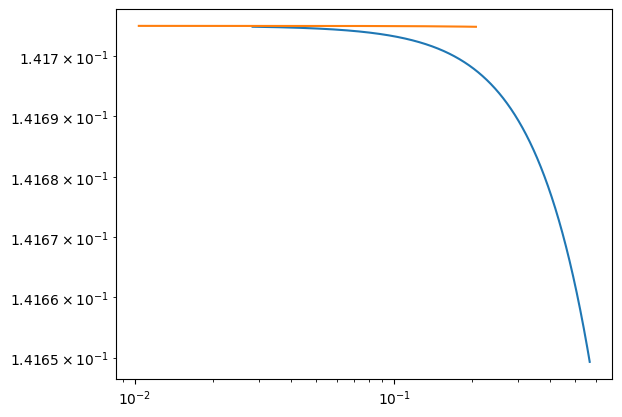

In [ ]:
plt.loglog(consts.k_grid_over_ell[:,11], gterm[:,60,11])
plt.loglog(consts.k_grid_over_ell[:,-1], gterm[:,60,-1])
#plt.loglog(consts.k_grid_over_ell[:,11], gterm[:,-1,11])
#plt.loglog(consts.k_grid_over_ell[:,11], gterm[:,-1,11])

### CIB term

#### $S_{\rm eff}$

In [ ]:
import cib

In [ ]:
seff_m21 = cib.Seff(params=None,model='M21')

Text(0, 0.5, '$S_{\\rm eff} (\\nu)$')

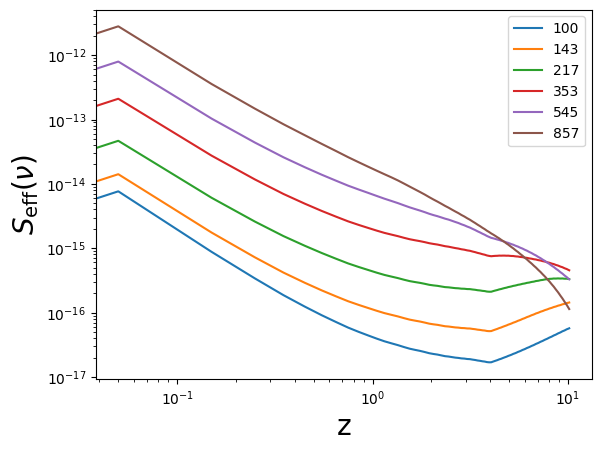

In [ ]:
for i in range(6):
    plt.loglog(consts.Plin['z'],
               seff_m21[i],
               label = int(consts.nu_list[i]/consts.ghz))
plt.legend(loc = 'best')
plt.xlabel(r"z", fontsize = fs)
plt.ylabel(r"$S_{\rm eff} (\nu)$", fontsize = fs)

#### $S_{\rm eff}$ for `Y23`

In [ ]:
beta = 1.98
T0 = 21.13
alpha_seff = 0.21
params_seff = (beta, T0, alpha_seff)

##### $\Theta$: Dust SED

In [ ]:
theta_y23 = cib.Theta(params_seff)

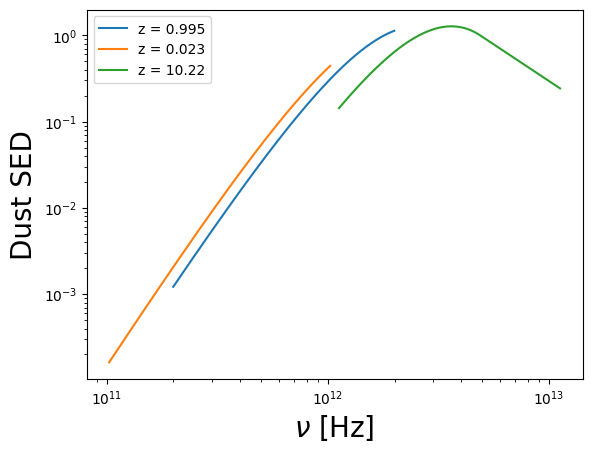

In [ ]:
zidx = 59
plt.loglog(consts.nu_primes[:,zidx], theta_y23[:,zidx],
           label = f'z = {consts.redshifts_M23[zidx]}')

zidx = 1
plt.loglog(consts.nu_primes[:,zidx], theta_y23[:,zidx],
           label = f'z = {consts.redshifts_M23[zidx]}')

zidx = -1
plt.loglog(consts.nu_primes[:,zidx], theta_y23[:,zidx],
           label = f'z = {consts.redshifts_M23[zidx]}')

plt.xlabel(r"$\nu$ [Hz]", fontsize = fs)
plt.ylabel("Dust SED", fontsize = fs)
plt.legend(loc = 'best')

##### $S_{\rm eff}$ convolved

In [ ]:
seff_y23 = cib.Seff(params_seff, 'Y23')

Text(0, 0.5, '$S_{\\rm eff} (\\nu)$')

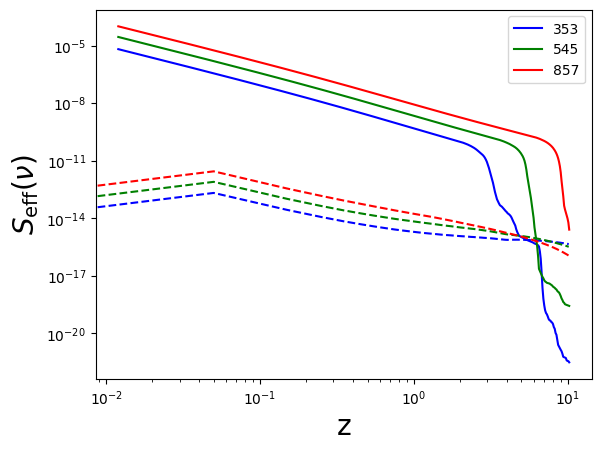

In [ ]:
plt.loglog(consts.redshifts_M23,
           seff_y23[-3], label = '353',
           c = 'b')
plt.loglog(consts.redshifts_M23,
           seff_y23[-2], label = '545',
           c = 'g')
plt.loglog(consts.redshifts_M23,
           seff_y23[-1], label = '857',
           c = 'r')


plt.loglog(consts.Plin['z'], seff_m21[-3], 
           c = 'b', ls = 'dashed')
plt.loglog(consts.Plin['z'], seff_m21[-2], 
           c = 'g', ls = 'dashed')
plt.loglog(consts.Plin['z'], seff_m21[-1], 
           c = 'r', ls = 'dashed')

plt.legend(loc = 'best')
plt.xlabel(r"z", fontsize = fs)
plt.ylabel(r"$S_{\rm eff} (\nu)$", fontsize = fs)

### BAR

Text(0, 0.5, 'BAR')

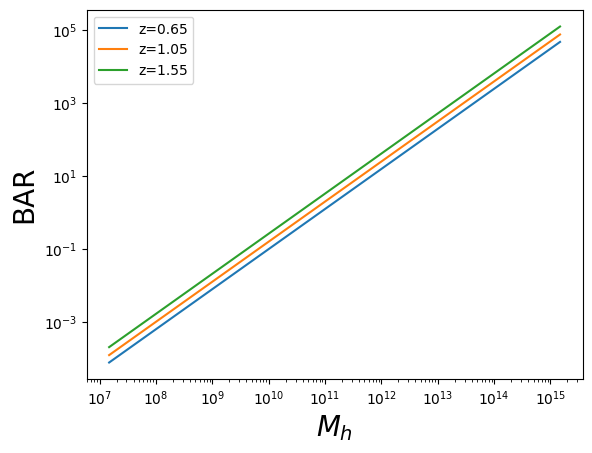

In [ ]:
plt.loglog(consts.Mh_Msol,
           consts.bar_c[:,7], label = 'z=0.65')

plt.loglog(consts.Mh_Msol,
           consts.bar_c[:,11], label = 'z=1.05')

plt.loglog(consts.Mh_Msol,
           consts.bar_c[:,16], label = 'z=1.55')

plt.legend(loc = 'best')
plt.xlabel(r"$M_h$",fontsize = fs)
plt.ylabel("BAR", fontsize = fs)

Text(0, 0.5, 'BAR')

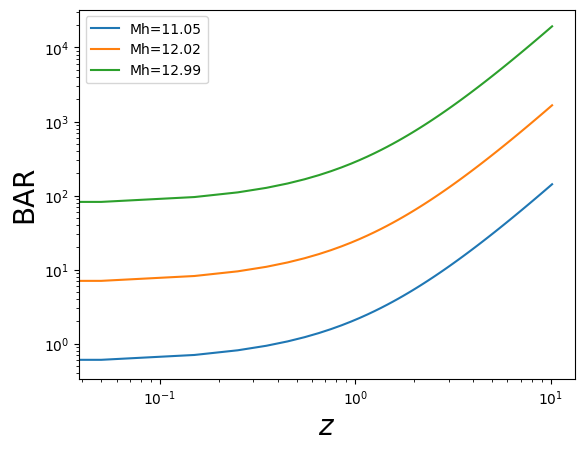

In [ ]:
plt.loglog(consts.Plin['z'],
           consts.bar_c[48,:], label = 'Mh=11.05')

plt.loglog(consts.Plin['z'],
           consts.bar_c[60,:], label = 'Mh=12.02')

plt.loglog(consts.Plin['z'],
           consts.bar_c[72,:], label = 'Mh=12.99')

plt.legend(loc = 'best')
plt.xlabel(r"$z$",fontsize = fs)
plt.ylabel("BAR", fontsize = fs)

In [ ]:
z = consts.Plin['z']
Mh = consts.log10Mh

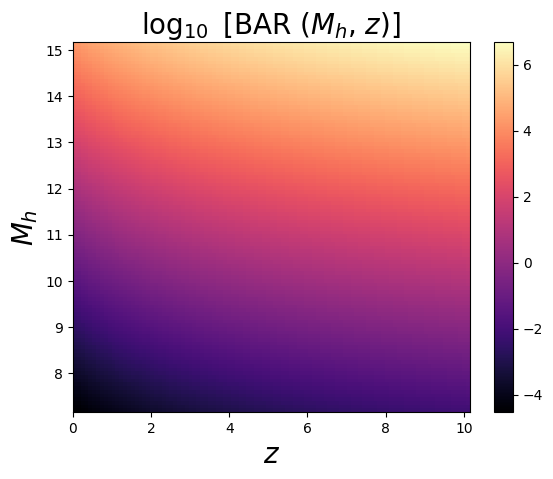

In [ ]:
plt.imshow(np.log10(consts.bar_c),
           aspect='auto', extent=[z.min(), z.max(), Mh.min(), Mh.max()], 
           origin='lower', cmap='magma')
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel(r"$M_h$", fontsize = fs)
plt.title(r"$\log_{10}$ [BAR ($M_h$, $z$)]", fontsize = fs)
plt.colorbar()

### $\eta$: SF efficiency

In [ ]:
etamax, mu_peak0_sfr, mu_peakp_sfr, sigma_M0_sfr, tau_sfr, zc = 0.49, 11.52, -0.02, 2.74, 0.5, 2.15
params_eta = (etamax, mu_peak0_sfr, mu_peakp_sfr, sigma_M0_sfr, tau_sfr, zc)  # SFR (M23): etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc

In [ ]:
%timeit eta = cib.eta(etamax, mu_peak0_sfr, mu_peakp_sfr, sigma_M0_sfr, tau_sfr, zc, is_sub = False)

115 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Text(0, 0.5, '$\\eta$')

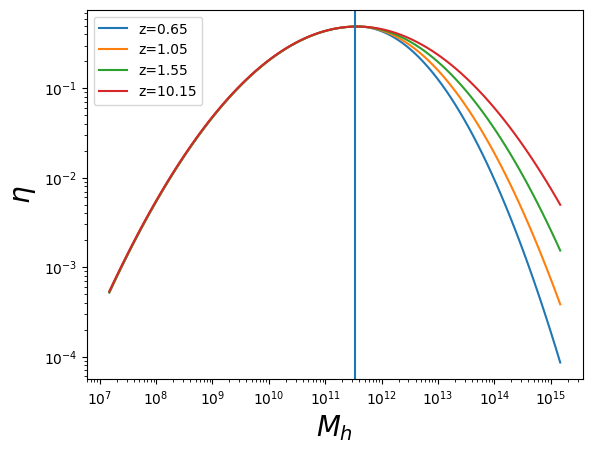

In [ ]:
plt.loglog(consts.Mh_Msol,
           eta[:,7], label = 'z=0.65')

plt.loglog(consts.Mh_Msol,
           eta[:,11], label = 'z=1.05')

plt.loglog(consts.Mh_Msol,
           eta[:,16], label = 'z=1.55')

idx = -1
plt.loglog(consts.Mh_Msol,
           eta[:,idx],
           label = f'z={np.round(consts.Plin["z"][idx],2)}')

plt.axvline(10**11.52)
plt.legend(loc = 'best')
plt.xlabel(r"$M_h$",fontsize = fs)
plt.ylabel(r"$\eta$", fontsize = fs)

Text(0, 0.5, '$\\eta$')

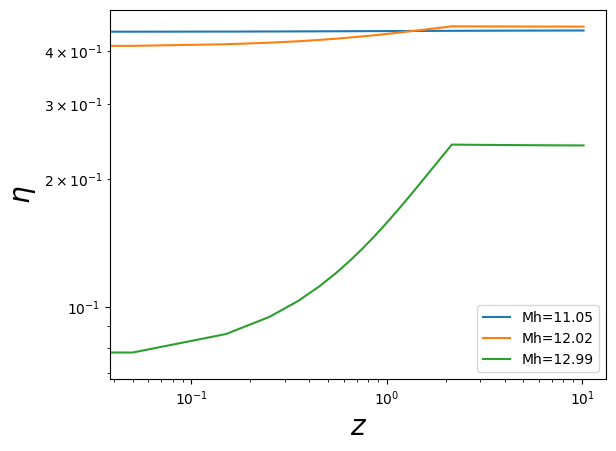

In [ ]:
plt.loglog(consts.Plin['z'],
           eta[48,:], label = 'Mh=11.05')

plt.loglog(consts.Plin['z'],
           eta[60,:], label = 'Mh=12.02')

plt.loglog(consts.Plin['z'],
           eta[72,:], label = 'Mh=12.99')

plt.legend(loc = 'best')
plt.xlabel(r"$z$",fontsize = fs)
plt.ylabel(r"$\eta$", fontsize = fs)

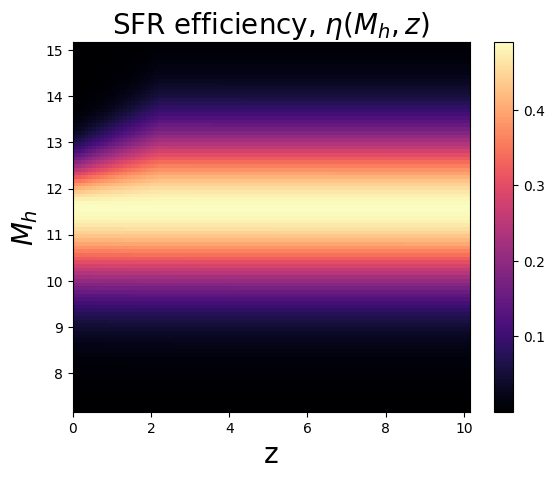

In [ ]:
plt.imshow(eta,
           aspect='auto', 
           extent=[z.min(), z.max(), Mh.min(), Mh.max()], 
           origin='lower', cmap='magma')
plt.xlabel("z", fontsize = fs)
plt.ylabel(r"$M_h$", fontsize = fs)
plt.title(r"SFR efficiency, $\eta (M_h, z)$",fontsize = fs)
plt.colorbar()

### SFR

In [ ]:
%timeit sfr = cib.SFR(etamax, mu_peak0_sfr, mu_peakp_sfr, sigma_M0_sfr, tau_sfr, zc, is_sub = False)

118 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Text(0.5, 1.0, '$\\log_{10}$ [SFR $(M_h, z)$]')

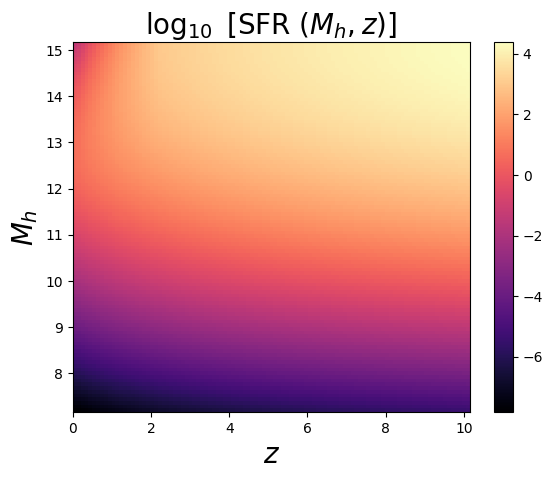

In [ ]:
plt.imshow(np.log10(sfr),
           aspect='auto', extent=[z.min(), z.max(), Mh.min(), Mh.max()], 
           origin='lower', cmap='magma')
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel(r"$M_h$", fontsize = fs)
plt.colorbar()
plt.title(r"$\log_{10}$ [SFR $(M_h, z)$]", fontsize = fs)

Text(0, 0.5, '$SFR$')

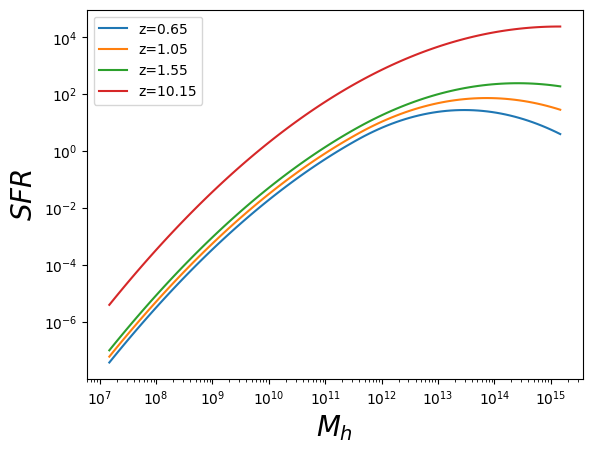

In [ ]:
plt.loglog(consts.Mh_Msol,
           sfr[:,7], label = 'z=0.65')

plt.loglog(consts.Mh_Msol,
           sfr[:,11], label = 'z=1.05')

plt.loglog(consts.Mh_Msol,
           sfr[:,16], label = 'z=1.55')

idx = -1
plt.loglog(consts.Mh_Msol,
           sfr[:,idx],
           label = f'z={np.round(consts.Plin["z"][idx],2)}')

plt.legend(loc = 'best')
plt.xlabel(r"$M_h$",fontsize = fs)
plt.ylabel(r"$SFR$", fontsize = fs)

$\rho_{\rm SFR_c}$

In [ ]:
from scipy.integrate import simpson

In [ ]:
params_sfr = (etamax, mu_peak0_sfr, mu_peakp_sfr, 
              sigma_M0_sfr, tau_sfr, zc, 
              Mmin_hod_ir, IR_sigma_lnM) #etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM
sfrc = cib.SFRc(params_sfr, model='M21')

In [ ]:
rho_c = simpson(y=consts.hmfz.T*sfrc, x=consts.log10Mh,
        axis=0)

In [ ]:
Af = 0.015/rho_c[0]

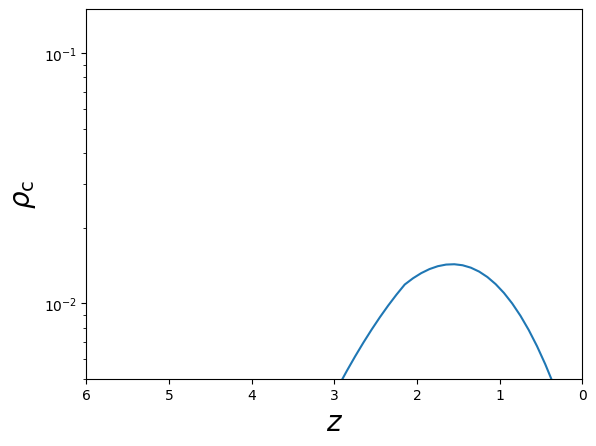

In [ ]:
plt.semilogy(consts.Plin['z'],rho_c)
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel(r"$\rho_{\rm c}$", fontsize = fs)
plt.xlim([0,6])
plt.ylim([5e-3,1.5e-1])
plt.gca().invert_xaxis()

### ${\rm SFR}_c$

In [ ]:
params_sfr = (0.49, 11.52, -0.02, 2.74, 0.5, 2.15, 12.74, 0.4) #etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM

In [ ]:
%timeit sfrc = cib.SFRc(params_sfr, model='M21')

136 µs ± 3.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Text(0, 0.5, '${\\rm SFR}_c$')

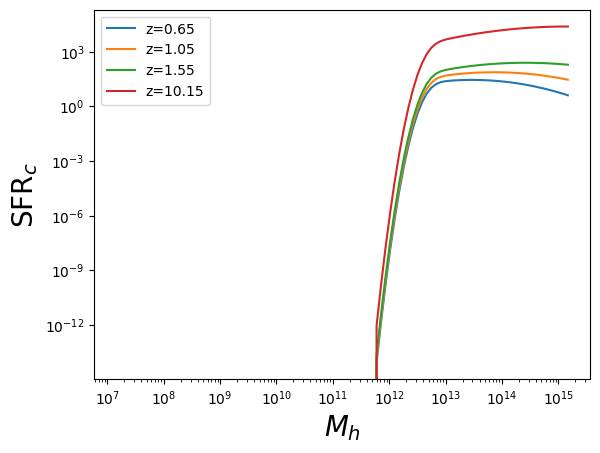

In [ ]:
plt.loglog(consts.Mh_Msol,
           sfrc[:,7], label = 'z=0.65')

plt.loglog(consts.Mh_Msol,
           sfrc[:,11], label = 'z=1.05')

plt.loglog(consts.Mh_Msol,
           sfrc[:,16], label = 'z=1.55')

idx = -1
plt.loglog(consts.Mh_Msol,
           sfrc[:,idx],
           label = f'z={np.round(consts.Plin["z"][idx],2)}')

plt.legend(loc = 'best')
plt.xlabel(r"$M_h$",fontsize = fs)
plt.ylabel(r"${\rm SFR}_c$", fontsize = fs)

Text(0, 0.5, '${\\rm SFR}_c$')

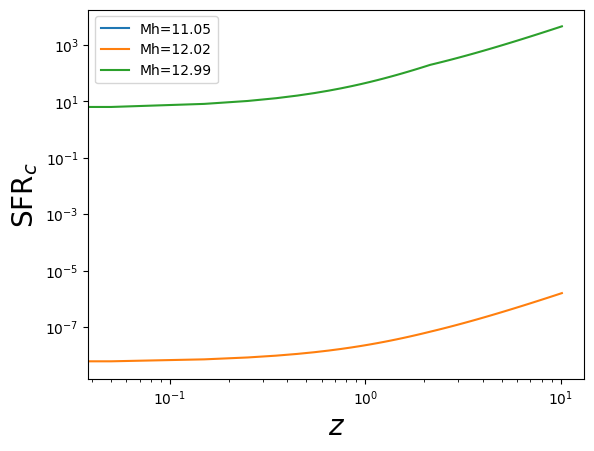

In [ ]:
plt.loglog(consts.Plin['z'],
           sfrc[48,:], label = 'Mh=11.05')

plt.loglog(consts.Plin['z'],
           sfrc[60,:], label = 'Mh=12.02')

plt.loglog(consts.Plin['z'],
           sfrc[72,:], label = 'Mh=12.99')

plt.legend(loc = 'best')
plt.xlabel(r"$z$",fontsize = fs)
plt.ylabel(r"${\rm SFR}_c$", fontsize = fs)

In [ ]:
z = consts.Plin['z']

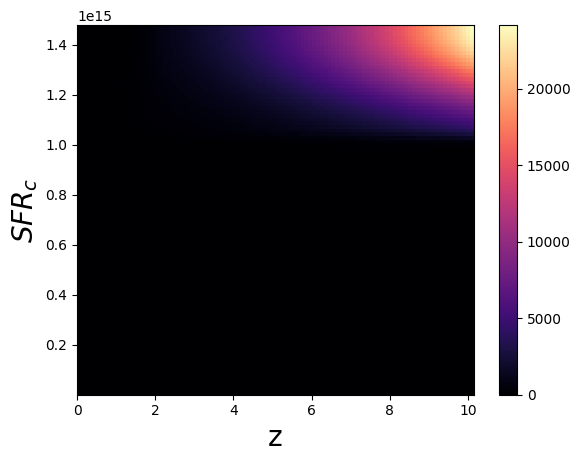

In [ ]:
plt.imshow(sfrc,
           aspect='auto', 
           extent=[z.min(), z.max(), Mh.min(), Mh.max()], 
           origin='lower', cmap='magma')
plt.xlabel("z", fontsize = fs)
plt.ylabel(r"$SFR_c$", fontsize = fs)
plt.colorbar()

### $BAR_{\rm sub}$

In [ ]:
bar_sub = consts.bar_sub #shape (ms, Mh, z)
msub = consts.ms_Msol
Mh = consts.Mh_Msol

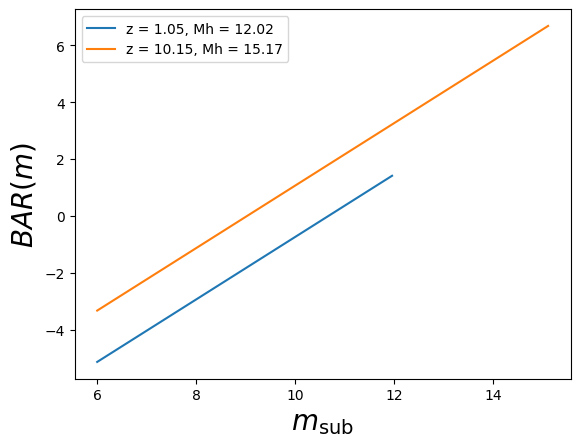

In [ ]:
# plot BAR as a function of subhaloes at z = 1.05
# for log10 Mh = 12 (Representative of ELGs)

zidx = 11
mhidx = 60

plt.plot(np.log10(consts.ms_Msol[:,mhidx]),
         np.log10(bar_sub[:,mhidx, zidx]),
         label =f"z = {np.round(consts.Plin['z'][zidx],2)}, Mh = {np.round(consts.log10Mh[mhidx],2)}")

plt.plot(np.log10(consts.ms_Msol[:, -1]),
         np.log10(bar_sub[:,-1, -1]),
         label =f"z = {np.round(consts.Plin['z'][-1],2)}, Mh = {np.round(consts.log10Mh[-1],2)}")

plt.xlabel(r"$m_{\rm sub}$", fontsize = fs)
plt.ylabel(r"$BAR (m)$", fontsize = fs)
plt.legend(loc = 'best')

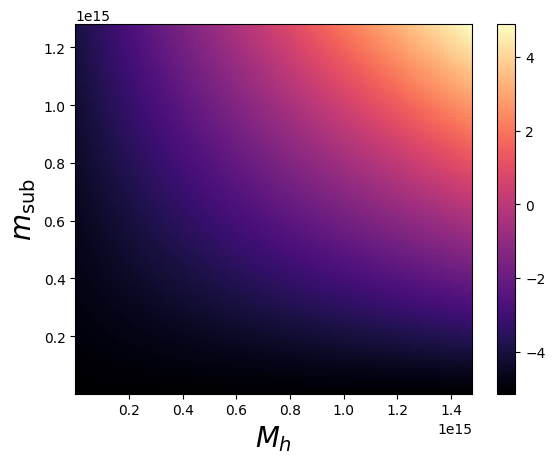

In [ ]:
plt.imshow(np.log10(bar_sub[:,:,zidx]),
           aspect='auto', 
           extent=[Mh.min(), Mh.max(), msub.min(), msub.max()], 
           origin='lower', cmap='magma')
plt.ylabel(r"$m_{\rm sub}$", fontsize = fs)
plt.xlabel(r"$M_h$", fontsize = fs)
plt.colorbar()

### Sub-halo Mass Function

In [ ]:
shmf = consts.subhalomf

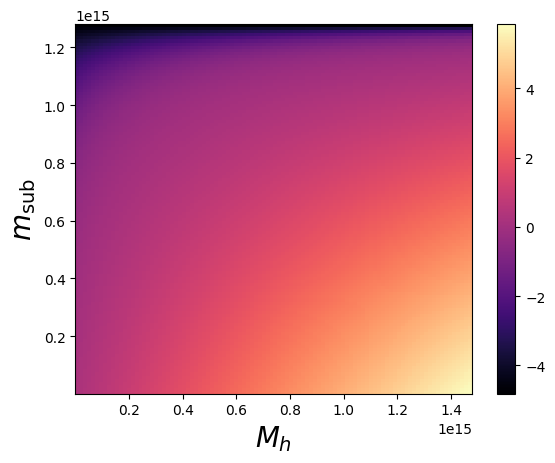

In [ ]:
plt.imshow(np.log10(shmf),
           aspect='auto', 
           extent=[Mh.min(), Mh.max(), msub.min(), msub.max()], 
           origin='lower', cmap='magma')
plt.ylabel(r"$m_{\rm sub}$", fontsize = fs)
plt.xlabel(r"$M_h$", fontsize = fs)
plt.colorbar()

### $SFR_{\rm sub}$

In [ ]:
params_sfr = (0.49, 11.52, -0.02, # etamax, mu_peak0, mu_peakp,
              2.74, 0.5, 2.15, # sigma_M0, tau, zc,
              12.74, 0.4)   # Mmin_IR, IR_sigma_lnM

In [ ]:
sfrsub = cib.SFRsub(params_sfr, 'M21') # (ms, Mh, z)

Text(0.5, 1.0, '$SFR_{\\rm sub}$')

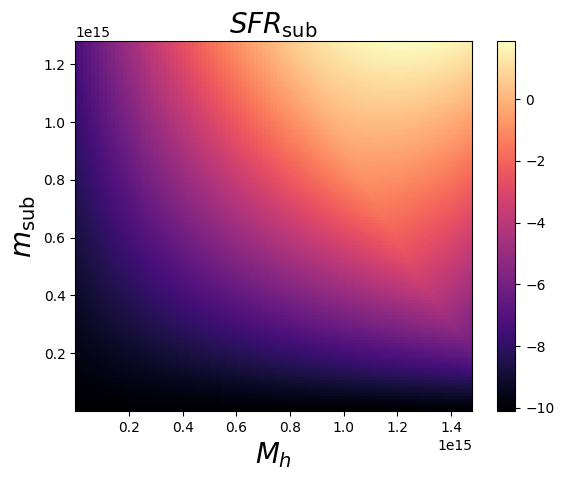

In [ ]:
plt.imshow(np.log10(sfrsub[:,:,zidx]),
           aspect='auto', 
           extent=[Mh.min(), Mh.max(), msub.min(), msub.max()], 
           origin='lower', cmap='magma')
plt.ylabel(r"$m_{\rm sub}$", fontsize = fs)
plt.xlabel(r"$M_h$", fontsize = fs)
plt.colorbar()
plt.title(r"$SFR_{\rm sub}$",fontsize = fs)

#### $\rho_{\rm SFR_{\rm sub}}$

In [ ]:
integrand = shmf[:,:,np.newaxis] * sfrsub # first integrate over shmf

In [ ]:
integrand2 = np.zeros((len(Mh), len(consts.Plin['z'])))

for i in range(len(Mh)):
    for j in range(len(consts.Plin['z'])):
        integrand2[i,j] = simpson(y=integrand[:,i,j],
                                  x=np.log10(msub[:,i]))

In [ ]:
rho_sub = simpson(y=consts.hmfz.T*integrand2, x=consts.log10Mh,
        axis=0) # next integrate of hmf

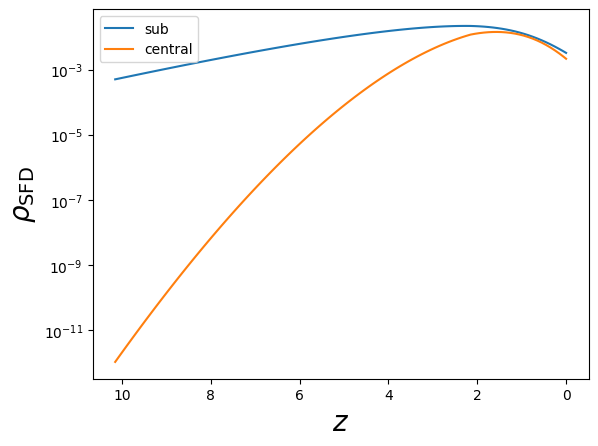

In [ ]:
plt.semilogy(consts.Plin['z'],rho_sub, label = 'sub')
plt.semilogy(consts.Plin['z'],rho_c, label = 'central')
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel(r"$\rho_{\rm SFD}$", fontsize = fs)
#plt.xlim([0,6])
#plt.ylim([5e-3,1.5e-1])
plt.gca().invert_xaxis()
plt.legend(loc = 'best')

### $j_c$

In [ ]:
sfrXseff = sfrc[np.newaxis,:,:] * seff[:,np.newaxis,:]

/var/folders/s2/zrtt0b094p52rpt0m42r4xmr0000gn/T/ipykernel_80394/3115477144.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sfrc), origin='lower')


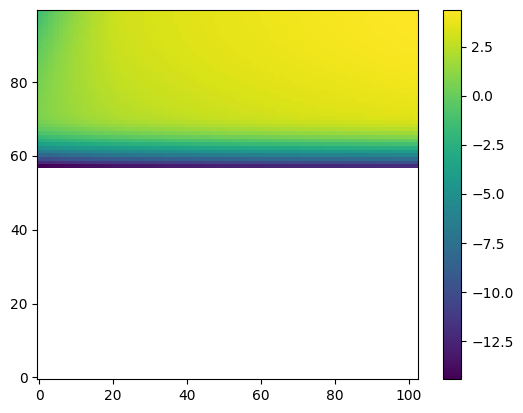

In [ ]:
plt.imshow(np.log10(sfrc), origin='lower')
plt.colorbar()

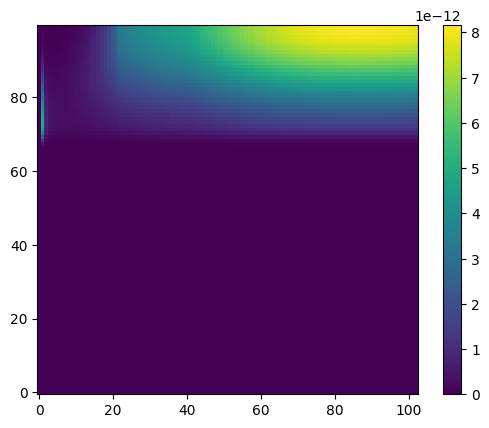

In [ ]:
plt.imshow(sfrXseff[-2], origin='lower')
plt.colorbar()

### $j_c + j_s * \tilde{u}$

In [ ]:
%timeit cterm = cib.cibterm(params=params_sfr, u=uprof, cib_model='M21')

1.09 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
cterm = cib.cibterm(params=params_sfr, u=uprof, cib_model='M21')

In [ ]:
zidx=11
mhidx=60

Text(0, 0.5, '$j_c$')

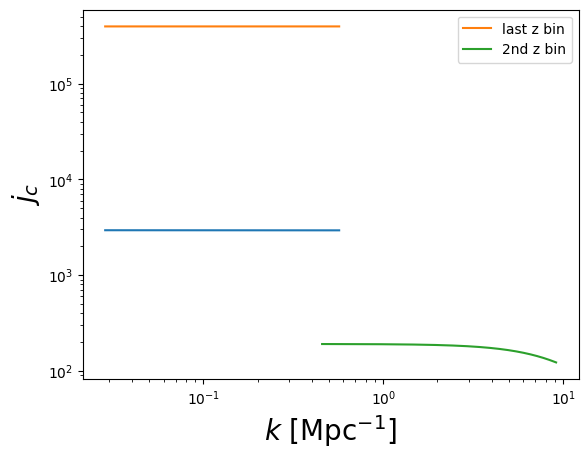

In [ ]:
plt.loglog(consts.k_grid_over_ell[:,zidx],
           cterm[-2][:,mhidx,zidx])
plt.loglog(consts.k_grid_over_ell[:,zidx],
           cterm[-2][:,mhidx,-1], label = 'last z bin')
plt.loglog(consts.k_grid_over_ell[:,1],
           cterm[-2][:,mhidx,1], label = '2nd z bin')
plt.legend(loc = 'best')
plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel(r"$j_c$", fontsize = fs)

This result makes sense to me because although $S_{\rm eff}$ is dropping by an order of mag from $0$ to $1$ in $z$, the $SFR$ increases much faster. So the overall emissivity term is pulled up as a function of redshift. 

Text(0, 0.5, 'Comparison to the lowest z bin value')

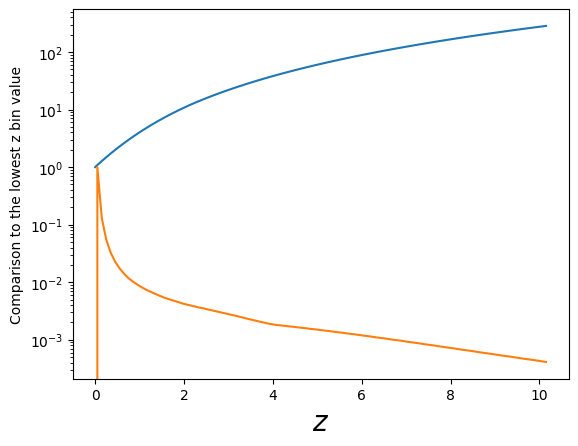

In [ ]:
plt.semilogy(z,sfrc[60]/sfrc[60][0], label = 'SFRc')
plt.semilogy(z,seff[-2]/seff[-2][1], label = 'Seff')
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel("Comparison to the lowest z bin value")

Text(0.5, 1.0, 'SFR X Seff, CIB = 545, log Mh = 12')

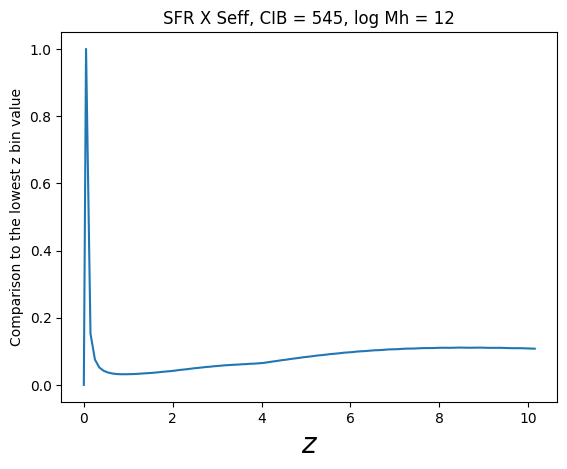

In [ ]:
plt.plot(z, sfrXseff[-2][60]/sfrXseff[-2][60][1])
plt.xlabel(r"$z$", fontsize = fs)
plt.ylabel("Comparison to the lowest z bin value")
plt.title("SFR X Seff, CIB = 545, log Mh = 12")

#### $dj_{\rm sub}$

In [ ]:
integrand = sfrsub * shmf[:,:,np.newaxis]

In [ ]:
integral = simpson(y=integrand,
                   x = np.log10(msub)[:,:,np.newaxis],
                   axis = 0)

In [ ]:
sfrsubXseff = integral[np.newaxis,:,:] * seff[:,np.newaxis,:]

In [ ]:
hmfXsfrXseff = consts.hmfz.T[np.newaxis,:,:] * sfrXseff

In [ ]:
hmfXsfrsubXseff = consts.hmfz.T[np.newaxis,:,:] * sfrsubXseff

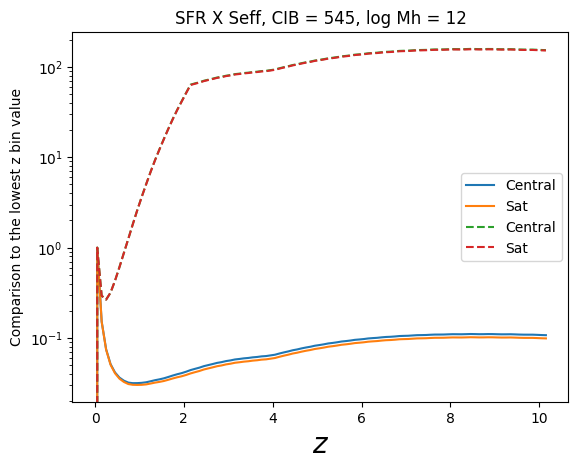

In [ ]:
plt.plot(z, 
         sfrXseff[-2][60]/sfrXseff[-2][60][1],
         label = 'Central')
plt.plot(z, sfrsubXseff[-2][60]/sfrsubXseff[-2][60][1],
         label = 'Sat')

plt.plot(z, sfrXseff[-2][-1]/sfrXseff[-2][-1][1], 
         label = 'Central',
         ls = '--')
plt.plot(z, 
         sfrsubXseff[-2][-1]/sfrsubXseff[-2][-1][1], 
         label = 'Sat',
         ls = '--')

# plt.plot(z, consts.hmfz.T[60]/consts.hmfz.T[60][0], label = 'HMF')
# plt.plot(z, consts.hmfz.T[-1]/consts.hmfz.T[-1][0], label = 'HMFz')
plt.xlabel(r"$z$", fontsize = fs)
plt.yscale("log")
plt.ylabel("Comparison to the lowest z bin value")
plt.title("SFR X Seff, CIB = 545, log Mh = 12")
plt.legend(loc = 'best')

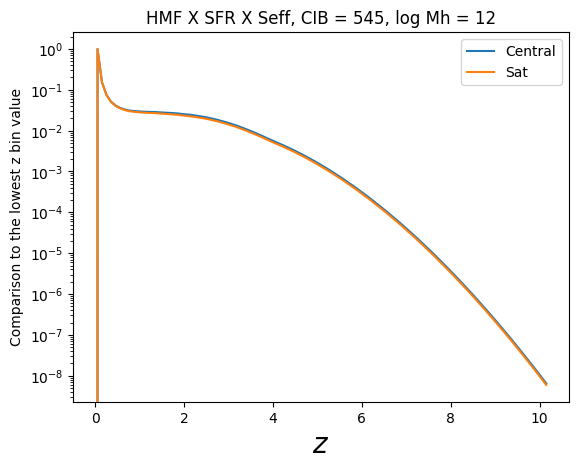

In [ ]:
plt.plot(z, 
         hmfXsfrXseff[-2][60]/hmfXsfrXseff[-2][60][1],
         label = 'Central')
plt.plot(z, hmfXsfrsubXseff[-2][60]/hmfXsfrsubXseff[-2][60][1],
         label = 'Sat')

# plt.plot(z, hmfXsfrXseff[-2][-1]/hmfXsfrXseff[-2][-1][1], 
#          label = 'Central',
#          ls = '--')
# plt.plot(z, 
#          hmfXsfrsubXseff[-2][-1]/hmfXsfrsubXseff[-2][-1][1], 
#          label = 'Sat',
#          ls = '--')

# plt.plot(z, consts.hmfz.T[60]/consts.hmfz.T[60][0], label = 'HMF')
# plt.plot(z, consts.hmfz.T[-1]/consts.hmfz.T[-1][0], label = 'HMFz')
plt.xlabel(r"$z$", fontsize = fs)
plt.yscale("log")
plt.ylabel("Comparison to the lowest z bin value")
plt.title("HMF X SFR X Seff, CIB = 545, log Mh = 12")
plt.legend(loc = 'best')

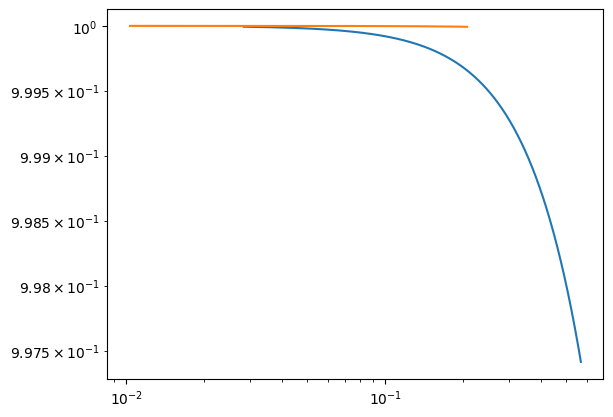

In [ ]:
plt.loglog(consts.k_grid_over_ell[:,11],uprof[:,60,11])
plt.loglog(consts.k_grid_over_ell[:,-1],uprof[:,60,-1])

### $P(k)$ 2-halo term

Here, the HMF should pull down the overall power as a function of redshift. 

HMF is not changing with redshift but from $M_h = 12$ to $15$ there is about $3$ orders of mag difference. Bias only introduces a factor of $2-3$ increase with $z$ so not the most important term. So that leaves the galterm and cibterm to control the power. If emissivity and galaxy count terms are also same orders of magnitude, then overall, $P(k)$ remains a constant? 

In [ ]:
gterm2 = gterm[np.newaxis,:,:]

In [ ]:
%timeit pk2h, int_g, int_cib = ps.cibgalcross_pk_2h(gterm2, cterm, plot = True)

1.08 s ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


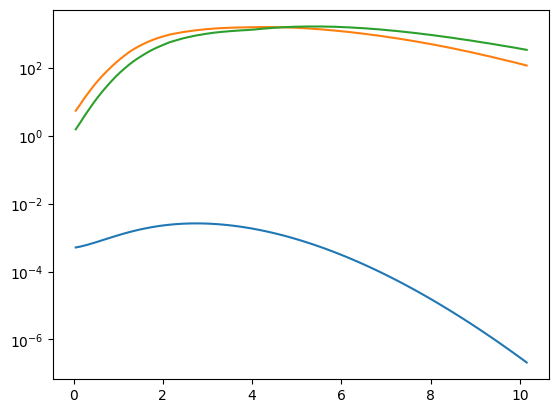

In [ ]:
plt.semilogy(z, int_g[0])
plt.semilogy(z, int_cib[-1][0])
plt.semilogy(z, int_cib[-2][0])

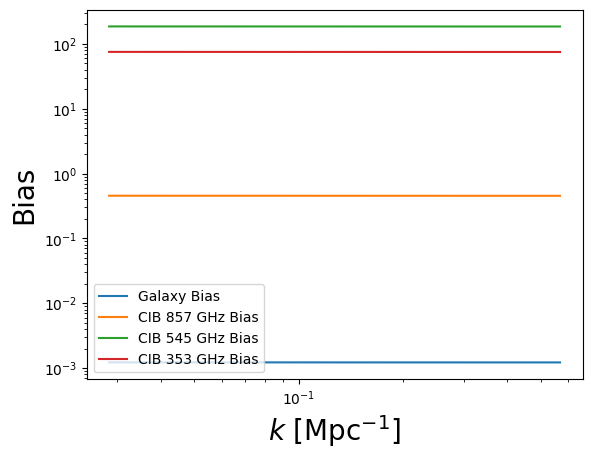

In [ ]:
plt.loglog(consts.k_grid_over_ell[:,11],
           int_g[:,11], label = 'Galaxy Bias')

nulist = [857, 545, 353]
for i in range(3):
    plt.loglog(consts.k_grid_over_ell[:,11],
           int_cib[-1 * i, :,11], 
           label = f'CIB {nulist[i]} GHz Bias')
plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel("Bias", fontsize = fs)
plt.legend(loc = 'best')

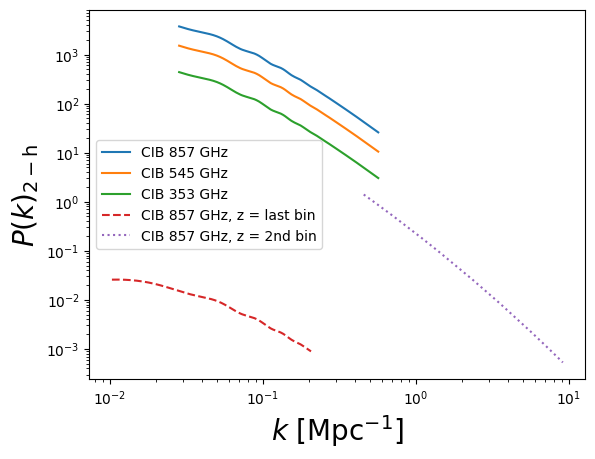

In [ ]:
nulist = [857, 545, 353]
for i in range(1,4):
    plt.loglog(consts.k_grid_over_ell[:,11],
           pk2h[-1 * i, :,11], 
           label = f'CIB {nulist[i-1]} GHz')
    

plt.loglog(consts.k_grid_over_ell[:,-1],
           pk2h[-1, :,-1], 
           label = f'CIB 857 GHz, z = last bin',
           ls = '--')

plt.loglog(consts.k_grid_over_ell[:,1],
           pk2h[-1, :,1], 
           label = f'CIB 857 GHz, z = 2nd bin',
           ls = 'dotted')

plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel(r"$P(k)_{\rm 2-h}$", fontsize = fs)
plt.legend(loc = 'best')

### $P(k)_{\rm 1-h}$

In [ ]:
%timeit pk1h = ps.cibgalcross_pk_1h(gterm, cterm)

829 ms ± 90.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


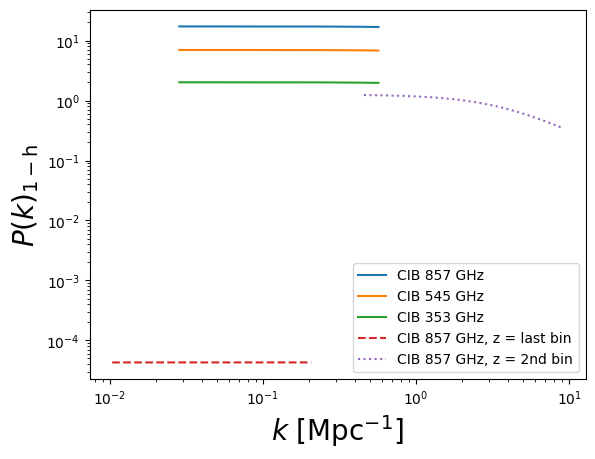

In [ ]:
nulist = [857, 545, 353]
for i in range(1,4):
    plt.loglog(consts.k_grid_over_ell[:,11],
           pk1h[-1 * i, :,11], 
           label = f'CIB {nulist[i-1]} GHz')
    

plt.loglog(consts.k_grid_over_ell[:,-1],
           pk1h[-1, :,-1], 
           label = f'CIB 857 GHz, z = last bin',
           ls = '--')

plt.loglog(consts.k_grid_over_ell[:,1],
           pk1h[-1, :,1], 
           label = f'CIB 857 GHz, z = 2nd bin',
           ls = 'dotted')

plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel(r"$P(k)_{\rm 1-h}$", fontsize = fs)
plt.legend(loc = 'best')

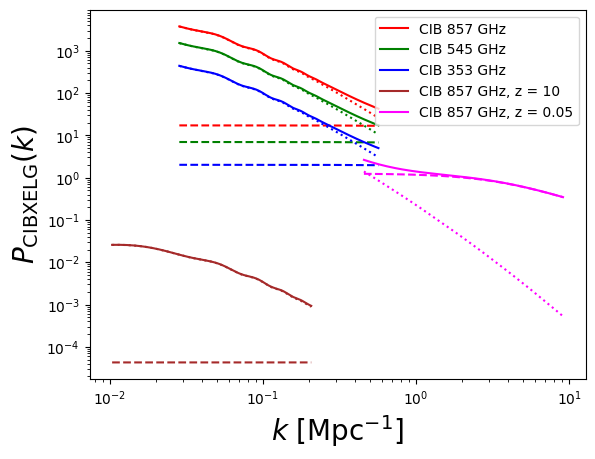

In [ ]:
nulist = [857, 545, 353]
colors = ['r', 'g', 'b']
for i in range(1,4):
        
        plt.loglog(consts.k_grid_over_ell[:,11],
                pk2h[-1 * i, :,11],
                c = colors[i-1], ls = 'dotted')
        plt.loglog(consts.k_grid_over_ell[:,11],
                pk1h[-1 * i, :,11], 
                c = colors[i-1], ls = '--')
        plt.loglog(consts.k_grid_over_ell[:,11],
                pk1h[-1 * i, :,11] + pk2h[-1 * i, :,11], 
                label = f'CIB {nulist[i-1]} GHz',
                c = colors[i-1], ls = 'solid')


plt.loglog(consts.k_grid_over_ell[:,-1],
           pk2h[-1, :,-1] + pk1h[-1, :,-1], 
           label = f'CIB 857 GHz, z = 10',
           ls = 'solid', c = 'brown')
plt.loglog(consts.k_grid_over_ell[:,-1],
           pk2h[-1, :,-1], 
           ls = 'dotted', c = 'brown')
plt.loglog(consts.k_grid_over_ell[:,-1],
           pk1h[-1, :,-1], 
           ls = 'dashed', c = 'brown')

plt.loglog(consts.k_grid_over_ell[:,1],
           pk2h[-1, :,1] + pk1h[-1, :,1], 
           label = f'CIB 857 GHz, z = 0.05',
           ls = 'solid', c = 'magenta')
plt.loglog(consts.k_grid_over_ell[:,1],
           pk2h[-1, :,1], 
           ls = 'dotted', c = 'magenta')
plt.loglog(consts.k_grid_over_ell[:,1],
           pk1h[-1, :,1], 
           ls = 'dashed', c = 'magenta')

plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel(r"$P_{\rm CIB X ELG}(k)$", fontsize = fs)
plt.legend(loc = 'best')

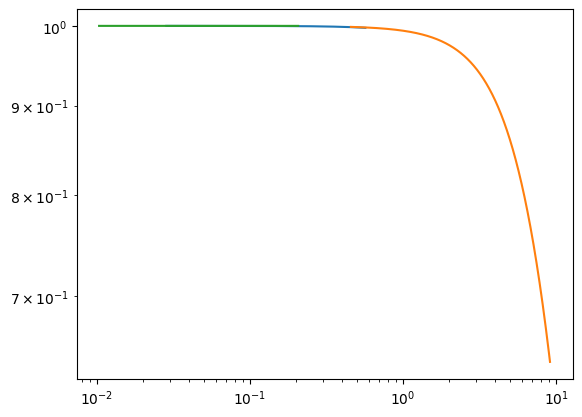

In [ ]:
plt.loglog(consts.k_grid_over_ell[:,11], uprof[:,60,11])
plt.loglog(consts.k_grid_over_ell[:,1], uprof[:,60,1])
plt.loglog(consts.k_grid_over_ell[:,-1], uprof[:,60,-1])

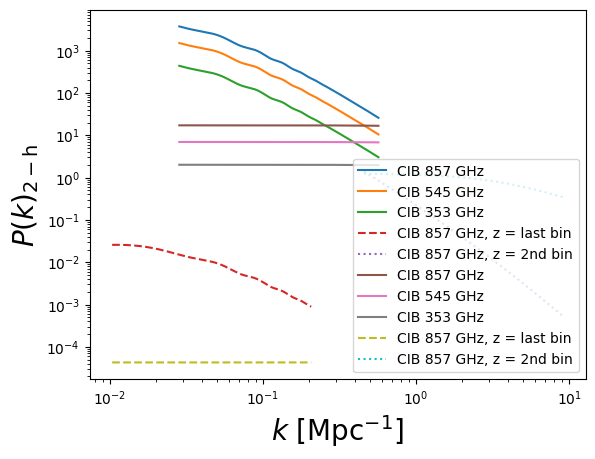

In [ ]:
nulist = [857, 545, 353]
for i in range(1,4):
    plt.loglog(consts.k_grid_over_ell[:,11],
           pk2h[-1 * i, :,11], 
           label = f'CIB {nulist[i-1]} GHz')
    
plt.loglog(consts.k_grid_over_ell[:,-1],
           pk2h[-1, :,-1], 
           label = f'CIB 857 GHz, z = last bin',
           ls = '--')

plt.loglog(consts.k_grid_over_ell[:,1],
           pk2h[-1, :,1], 
           label = f'CIB 857 GHz, z = 2nd bin',
           ls = 'dotted')

for i in range(1,4):
    plt.loglog(consts.k_grid_over_ell[:,11],
           pk1h[-1 * i, :,11], 
           label = f'CIB {nulist[i-1]} GHz')
    

plt.loglog(consts.k_grid_over_ell[:,-1],
           pk1h[-1, :,-1], 
           label = f'CIB 857 GHz, z = last bin',
           ls = '--')

plt.loglog(consts.k_grid_over_ell[:,1],
           pk1h[-1, :,1], 
           label = f'CIB 857 GHz, z = 2nd bin',
           ls = 'dotted')

plt.xlabel(r"$k$ [Mpc$^{-1}$]", fontsize = fs)
plt.ylabel(r"$P(k)_{\rm 2-h}$", fontsize = fs)
plt.legend(loc = 'best')

### $C_{\ell}$ for $1$-halo and $2$-halo terms

In [ ]:
theta_M23 = np.array([1., # relaxtion parameter hmalpha
                  0., # shotnoise
                  5.47, 11.64, 0.30, 0.1, # Ncen (Y23): gamma, log10Mc, sigmaM, Ac
                  0.41, 10**(11.20), 10**(13.78), 0.81, # Nsat (R23): As, M0, M1, alpha
                  0.58, 6.14, 0.67, # radial profile (R23): fexp, tau, lambda_NFW
                  0.49, 11.52, -0.02, 11.51, 0.55, 2.74, 0.5, 2.15, # SFR (M23): etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc
                  ])

In [ ]:
%timeit tot, oneh, twoh = ps.cibgalcross_cell_tot(theta_M23, cib_model='M21', plot=True)

/Users/tkarim/Documents/research/cib.nosync/halo.py:97: RuntimeWarning: invalid value encountered in cos
  cos_q_term = np.cos(q) * (Ci_qcq - Ci_q)
/Users/tkarim/Documents/research/cib.nosync/halo.py:98: RuntimeWarning: invalid value encountered in sin
  sin_q_term = np.sin(q) * (Si_qcq - Si_q)


4.28 s ± 339 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from scipy.integrate import simpson

In [ ]:
# set z = 0 for integration otherwise NaN
oneh[:,:,0] = 0
twoh[:,:,0] = 0

In [ ]:
c_ell_1h = simpson(oneh, 
                   x = consts.Plin['z'], 
                   axis=2)

c_ell_2h = simpson(twoh, 
                   x = consts.Plin['z'], 
                   axis=2)

Text(0, 0.5, '$C ({\\ell})$')

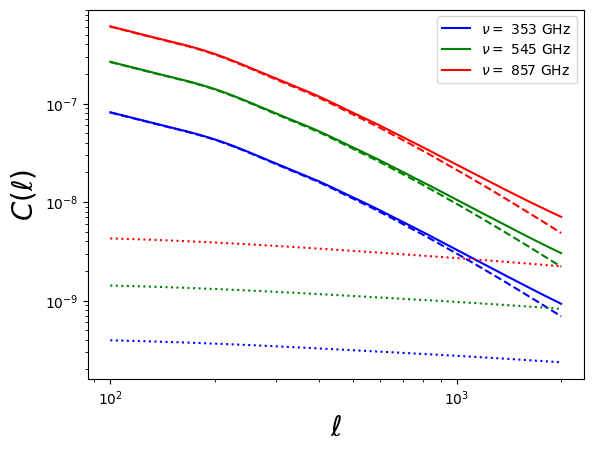

In [ ]:
cols = ['b', 'g', 'r']
nulist = ['353', '545', '857']

for i in range(3):
    plt.loglog(consts.ell, tot[1*i-3], c = cols[i],
               ls = 'solid', 
               label = fr'$\nu = $ {nulist[i]} GHz')
    plt.loglog(consts.ell, c_ell_1h[1*i-3], c = cols[i],
               ls = 'dotted')
    plt.loglog(consts.ell, c_ell_2h[1*i-3], c = cols[i],
               ls = 'dashed')
plt.legend(loc = 'best')
plt.xlabel(r"$\ell$", fontsize = fs)
plt.ylabel(r"$C ({\ell})$", fontsize = fs)

# Line Profiler

In [ ]:
nnu = 6; nk = 1900; nmh = 100; nz = 103
mat2 = np.random.rand(nnu,1,nmh,nz)
mat1 = np.random.rand(nnu,1,nmh,nz)
mat3 = np.random.rand(1,nk,nmh,nz)

In [ ]:
%timeit mat1 + (mat2 * mat3)

644 ms ± 5.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
_, djc, djsub = cib.cibterm(params=params_sfr, u=uprof, cib_model='M21')

In [ ]:
djc2 = djc[:,np.newaxis,:,:]
djsub2 = djsub[:,np.newaxis,:,:]
uprof2 = uprof[np.newaxis,:,:,:]
    

In [ ]:
%timeit djc2 + (djsub2 * uprof2)

971 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit djc[:,np.newaxis,:,:] + djsub[:,np.newaxis,:,:] * uprof[np.newaxis,:,:,:]

1.02 s ± 82.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f cib.cibterm cib.cibterm(params=params_sfr, u=uprof, cib_model='M21')

Timer unit: 1e-09 s

Total time: 1.84072 s
File: /Users/tkarim/Documents/research/cib.nosync/cib.py
Function: cibterm at line 72

Line #      Hits         Time  Per Hit   % Time  Line Contents
    72                                           def cibterm(params, u, cib_model):
    73                                               """
    74                                               Returns the first bracket in A13 of 2204.05299.
    75                                               This corresponds to the CIB term in calculating Pk. 
    76                                               
    77                                               Args:
    78                                                   params : SFR and SED parameters 
    79                                                   unfw : Fourier transform the NFW profile inside the halo. (k, Mh, z)
    80                                                   cib_model : Name of the CIB model to be tested
    81                    

In [ ]:
%lprun -f ps.cibgalcross_cell_tot ps.cibgalcross_cell_tot(theta_M23, cib_model='M21')

/Users/tkarim/Documents/research/cib.nosync/halo.py:97: RuntimeWarning: invalid value encountered in cos
  cos_q_term = np.cos(q) * (Ci_qcq - Ci_q)
/Users/tkarim/Documents/research/cib.nosync/halo.py:98: RuntimeWarning: invalid value encountered in sin
  sin_q_term = np.sin(q) * (Si_qcq - Si_q)


Timer unit: 1e-09 s

Total time: 6.01773 s
File: /Users/tkarim/Documents/research/cib.nosync/powerspectra.py
Function: cibgalcross_cell_tot at line 71

Line #      Hits         Time  Per Hit   % Time  Line Contents
    71                                           def cibgalcross_cell_tot(theta, cib_model,
    72                                                                    plot=False): 
    73                                               """
    74                                               Returns C_{g, CIB} accounting for all halo terms.
    75                                               """
    76                                               
    77         1      11000.0  11000.0      0.0      hmalpha = theta[0]
    78         1       1000.0   1000.0      0.0      shotnoise = theta[1]
    79         1       7000.0   7000.0      0.0      gal_params = theta[2:10] # Ncen (4): gamma, log10Mc, sigmaM, Ac
    80                                                                 

profile calculator is slow. need to figure out why.

In [ ]:
%lprun -f halo.uprof_mixed halo.uprof_mixed(prof_params, pc.rad200, pc.concentration, pc.concentration_amp)

/Users/tkarim/Documents/research/cib.nosync/halo.py:97: RuntimeWarning: invalid value encountered in cos
  cos_q_term = np.cos(q) * (Ci_qcq - Ci_q)
/Users/tkarim/Documents/research/cib.nosync/halo.py:98: RuntimeWarning: invalid value encountered in sin
  sin_q_term = np.sin(q) * (Si_qcq - Si_q)


Timer unit: 1e-09 s

Total time: 2.79851 s
File: /Users/tkarim/Documents/research/cib.nosync/halo.py
Function: uprof_mixed at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def uprof_mixed(prof_params, rad200, c, c_term,
    24                                                           plot=False):
    25                                               """
    26                                               Returns Fourier Transform of halo profile mimicing DESI ELGs. 
    27                                               
    28                                               According to 2306.06319, the ELG halo profile is:
    29                                               p(r|M) = f_exp * exp(-r/(r_s * tau)) * (1-fexp)[NFW](r|M).
    30                                               
    31                                               Args: 
    32                                                   prof_params: p

NFW profile taking most of the time. 

In [ ]:
%lprun -f halo.nfwfourier_u halo.nfwfourier_u(lambda_NFW=lambda_NFW, rad200=pc.rad200, c=pc.concentration, c_term=pc.concentration_amp)

Timer unit: 1e-09 s

Total time: 2.53195 s
File: /Users/tkarim/Documents/research/cib.nosync/halo.py
Function: nfwfourier_u at line 70

Line #      Hits         Time  Per Hit   % Time  Line Contents
    70                                           def nfwfourier_u(lambda_NFW, rad200, c, c_term):
    71                                               """
    72                                               Returns Fourier Transform of the NFW profile.
    73                                               
    74                                               From 2.14 of 2310.10848.
    75                                               Form is: [ln(1+c) - c/(1+c)]^(-1) [cos(q)(Ci(q + cq) - Ci(q)) + sin(q)(Si(q + cq) - Si(q)) - sin(cq)/(1 + cq)]
    76                                               
    77                                               Note rs is rescaled as rs/lambda_NFW according to pg 24 of 2306.06319.
    78                                               This applies for ELG

Improved NFW from 4 seconds to 2 seconds. 
$\lambda_{\rm NFW}$ reparametrization takes up the time. 

Test out Pk terms as they take up 3.5 and 3 s respectively.

In [ ]:
gterm2 = gterm[np.newaxis,:,:,:] #(nu,k,Mh,z)

In [ ]:
%lprun -f ps.cibgalcross_pk_1h ps.cibgalcross_pk_1h(gterm2,cterm)

Timer unit: 1e-09 s

Total time: 2.29245 s
File: /Users/tkarim/Documents/research/cib.nosync/powerspectra.py
Function: cibgalcross_pk_1h at line 111

Line #      Hits         Time  Per Hit   % Time  Line Contents
   111                                           def cibgalcross_pk_1h(galterm, cibterm):
   112                                                   """
   113                                                   Returns 1-halo term of CIB X g power spectrum.
   114                                                   
   115                                                   From A13 of 2204.05299.
   116                                                   Form is: 
   117                                                       Pk_1h = int HMF * g-term * CIB-term * dlogMh
   118                                                       
   119                                                   Args:
   120                                                       galterm : Nc + Ns * unfw (nu, k, M

In [ ]:
import numba as nb
from scipy.special import sici
from scipy.integrate import simpson

In [ ]:
@nb.cfunc('float64(float64)','float64(float64)')
def gxc_numba(gterm2,cterm):
    return np.multiply(gterm2, cterm)

TypeError: invalid type in signature: expected a type instance, got 'float64(float64)'

In [ ]:
@nb.cfunc('float64(float64)')
def sici_numba(x):
    return sici(x)

In [ ]:
import numba as nb
import numpy as np
import scipy as sp

factor = -1.0 / (2 * np.power(peak_width, 2))

# change row and col to test speed
row = 100; col = 100; peak_height=300; peak_width=60

@nb.cfunc('float64(float64)')
def compute_numba(x):
    return np.exp(np.power(x - peak_height, 2) * factor)

compute_c = sp.LowLevelCallable(compute_numba.ctypes)

def integrate_lno2(top, bottom):
    return sp.integrate.quad(compute_c, top, bottom)[0]

top = np.linspace(100, 200, row*col).reshape(row, col)
bottom = np.linspace(800, 900, row*col).reshape(row, col)

res = np.zeros((row, col))

for i in range(row):
    for j in range(col):
        res[i, j] = integrate_lno2(top[i, j], bottom[i, j])


# Interpolator for NFW

Speed up calculation

In [ ]:
%timeit halo.nfwfourier_u(lambda_NFW=0.67, rad200=pc.rad200, c=pc.concentration, c_term=pc.concentration_amp)

/Users/tkarim/Documents/research/cib.nosync/halo.py:97: RuntimeWarning: invalid value encountered in cos
  cos_q_term = np.cos(q) * (Ci_qcq - Ci_q)
/Users/tkarim/Documents/research/cib.nosync/halo.py:98: RuntimeWarning: invalid value encountered in sin
  sin_q_term = np.sin(q) * (Si_qcq - Si_q)


1.93 s ± 71.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from scipy import interpolate

In [ ]:
npoints = 100
lambda_NFW_prior = np.linspace(0.2, 0.67, npoints)

In [90]:
nfw_list = np.zeros(npoints)

nfw_values = np.array([halo.nfwfourier_u(lambda_NFW=lnfw, 
                                         rad200=pc.rad200, 
                                         c=pc.concentration, 
                                         c_term=pc.concentration_amp) for lnfw in lambda_NFW_prior])  # shape (npoints, M, N, L)

/Users/tkarim/Documents/research/cib.nosync/halo.py:99: RuntimeWarning: invalid value encountered in cos
  cos_q_term = np.cos(q) * (Ci_qcq - Ci_q)
/Users/tkarim/Documents/research/cib.nosync/halo.py:100: RuntimeWarning: invalid value encountered in sin
  sin_q_term = np.sin(q) * (Si_qcq - Si_q)


In [91]:
nfw_interpolator = interpolate.interp1d(lambda_NFW_prior, 
                                        nfw_values, axis=0, 
                                        kind='cubic', fill_value=0)

: 

: 

# Data Analysis

In [3]:
import healpy as hp
import copy
import pickle
import numpy as np
#import pymaster as nmt

## Rotate masks to Equatorial and apodize

In [4]:
nulist = ['353', '545', '857']

In [5]:
# read in CIB masks
#FIXME: do we need to apodize CIB masks? 

cibmasks = {}
nulist = ['353', '545', '857']

# mask for CIB footprint
for nu in nulist:
    cibmasks[nu] = hp.read_map(f"data/cib/{nu}/mask_bool.hpx.fits")

In [12]:
# rotate CIB masks
r = hp.Rotator(coord=['G','C']) #define rotator class from Eq. Coord. to Gal. Coord

# CIB mask in equatorial
cibmasks_eq = {}

for nu in nulist:
    cibmask_alm = hp.map2alm(cibmasks[nu], pol = False)
    cibmask_alm_eq = r.rotate_alm(cibmask_alm)
    cibmasks_eq[nu] = hp.alm2map(cibmask_alm_eq, nside=1024, pol = False)

##### Calculate masks at NSIDE = 1024 

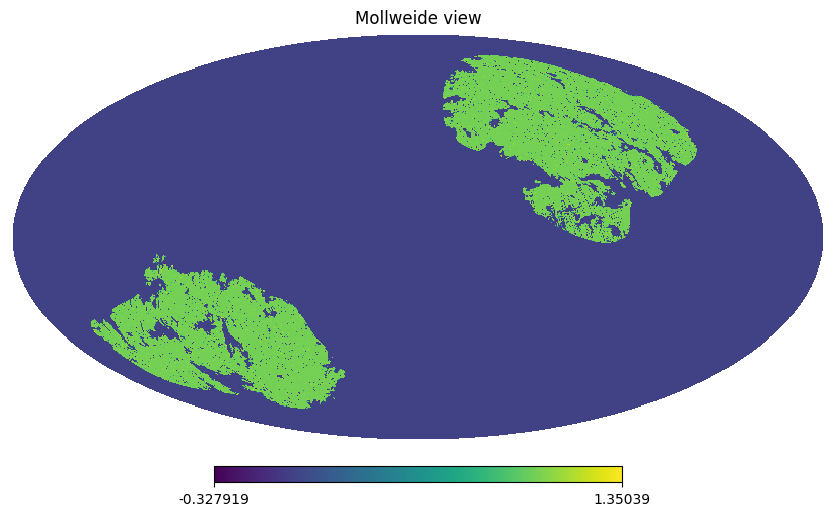

In [13]:
hp.mollview(cibmasks_eq['857'], rot = -85)

In [14]:
# convert continuous value due to rotation to boolean. 

threshold = 0.9 # any pixel with less than 90% data is masked

cibmasks_eq_bool = {}
for nu in nulist:
    mask_cont = copy.deepcopy(cibmasks_eq[nu])
    mask_bool = (mask_cont > threshold) # pixel must have at least 0.75 coverage
    cibmasks_eq_bool[nu] = mask_bool

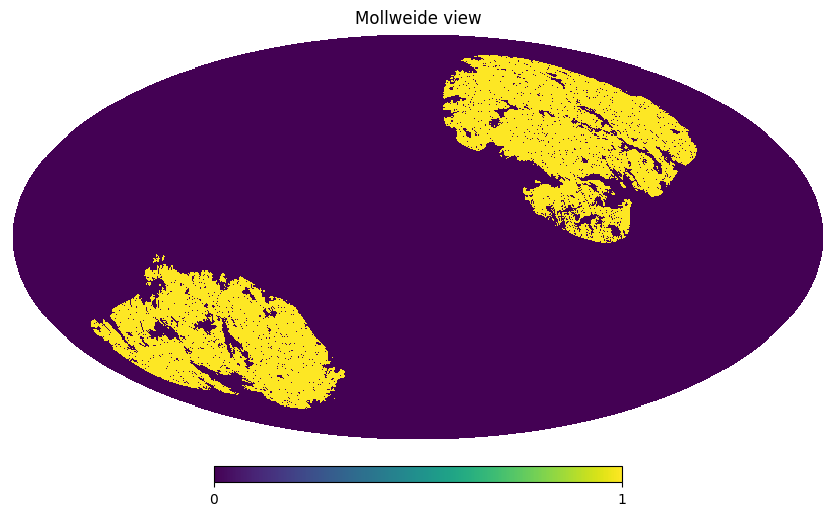

In [15]:
hp.mollview(cibmasks_eq_bool['857'], rot = -85)

Apodize using NaMaster

scale is 15' because Lenz used that same scale with C2.

In [16]:
cibmasks_eq_apodized = {}

for nu in nulist:
    cibmasks_eq_apodized[nu] = nmt.mask_apodization(cibmasks_eq_bool[nu], 0.25, "C2")

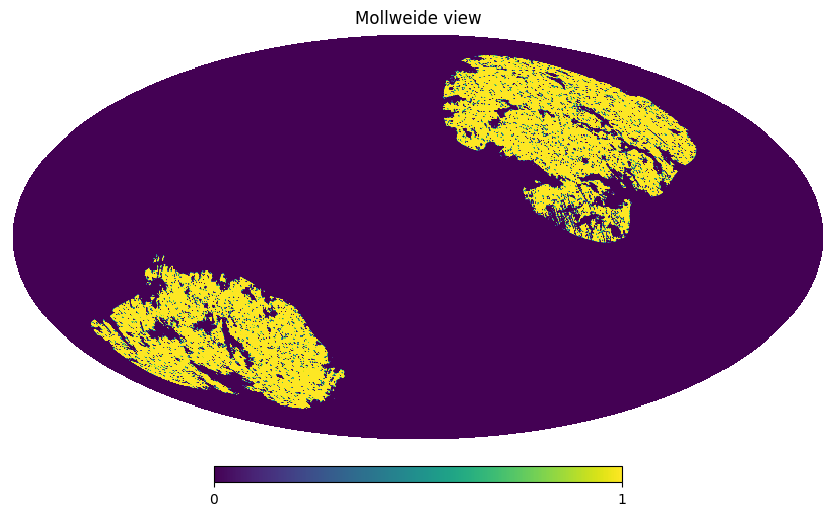

In [17]:
hp.mollview(cibmasks_eq_apodized['857'], rot = -85)

In [18]:
with open('data/cib/cibmasks_1024_eq_apodized.pkl','wb') as f:
       pickle.dump(cibmasks_eq_apodized, f, 
                   protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# if pre-calculated
with open('data/cib/cibmasks_1024_eq_apodized.pkl', 'rb') as f:
    cibmasks_eq_apodized = pickle.load(f)

## Rotate data map to Equatorial

In [7]:
folname = 'data/cib/'
fname = '/cib_fullmission.hpx.fits'

In [82]:
r = hp.Rotator(coord=['G','C']) #define rotator class from Eq. Coord. to Gal. Coord
healpy_data_path = '../healpy-weights/'
nulist = ['353', '545', '857']

# CIB data in equatorial
cibdata_eq = {} # store map 
cibdata_eq_cl = {} # store c_ell from equatorial map
cibdata_gal_cl = {} # store original c_ell from galactic map
cibdata_eq_masked_cl = {} # store c_ell from equatorial map * mask

for nu in nulist:
    # read map and replace nan with 0
    tmp_cib_map = hp.read_map(folname + nu + fname) * 1e6 # convert from mJy to Jy
    tmp_cib_map_remove_nan = np.where(np.isnan(tmp_cib_map), 0, tmp_cib_map)
    
    # measure C_ell from original map
    tmp_cl_gal = hp.anafast(tmp_cib_map_remove_nan, pol=False, 
                        datapath=healpy_data_path, 
                        use_pixel_weights=True)
    
    # store galactic C_ell
    cibdata_gal_cl[nu] = tmp_cl_gal
    
    # convert galactic map to alms
    tmp_alm_gal = hp.map2alm(tmp_cib_map_remove_nan, pol=False,
                             use_pixel_weights=True,
                             datapath=healpy_data_path)
    
    # rotate galactic alms to eq alms
    tmp_alm_eq = r.rotate_alm(tmp_alm_gal)
    
    # Project eq alms into NSIDE = 1024 maps
    tmp_map_eq = hp.alm2map(tmp_alm_eq, nside = 1024, pol=False)
    
    # store equatorial rotated map 
    cibdata_eq[nu] = tmp_map_eq
    
    # C_ell from map for comparison 
    tmp_cl_map_eq_1024 = hp.anafast(tmp_map_eq, pol = False, 
                                datapath=healpy_data_path,
                                use_pixel_weights=True)
    
    # store equatorial map C_ell for comparison
    cibdata_eq_cl[nu] = tmp_cl_map_eq_1024
    
    # C_ell from map * apodized mask for comparison
    tmp_cl_map_times_mask_eq_1024 = hp.anafast(tmp_map_eq * cibmasks_eq_apodized[nu],
                                               pol = False, datapath=healpy_data_path,
                                               use_pixel_weights=True)
    
    # store equatorial map * mask C_ell for comparison 
    cibdata_eq_masked_cl[nu] = tmp_cl_map_times_mask_eq_1024

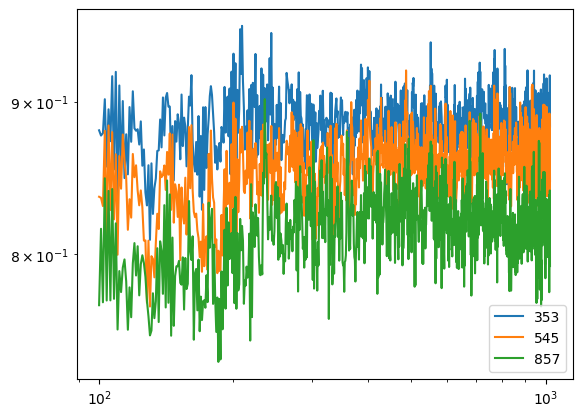

In [83]:
for nu in nulist:
    plt.loglog(np.arange(100,1024), 
               cibdata_eq_masked_cl[nu][100:1024]/cibdata_gal_cl[nu][100:1024],
               label = nu)
plt.legend(loc = 'best')

In [84]:
nu = '353'
np.mean(cibdata_eq_masked_cl[nu][100:1024]/cibdata_gal_cl[nu][100:1024])

0.8864720761253748

Apodized mask affects measured $C_{\ell}$ amplitude by $10 - 20\%$. 

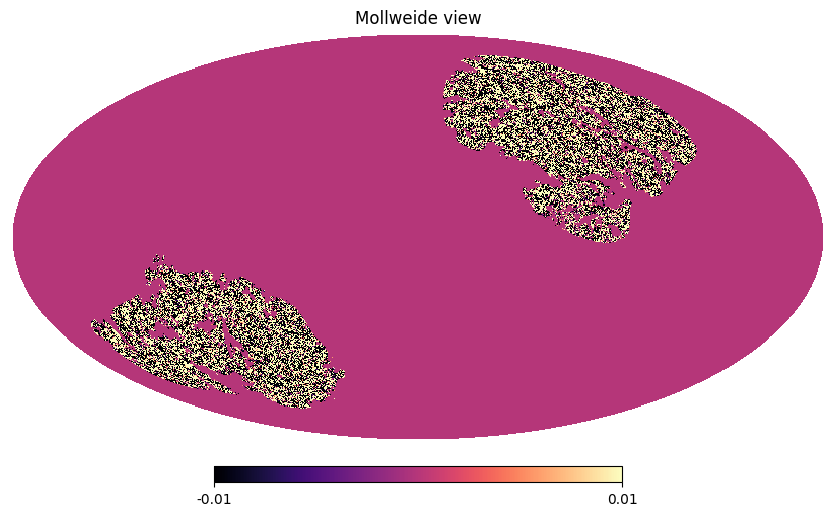

In [22]:
f1='857'
hp.mollview(cibdata_eq[f1] * cibmasks_eq_apodized[f1], rot = -85, cmap='magma',
            min = -.01, max = +.01)

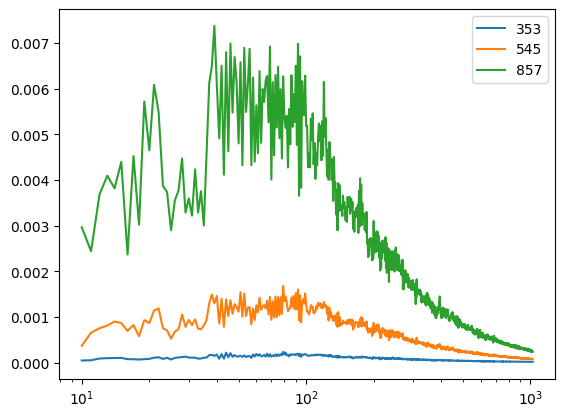

In [74]:
# plot auto power amplitude units
ells_range = np.arange(10, 1024)

for nu in nulist:
    plt.semilogx(ells_range, cibdata_eq_masked_cl[nu][10:1024] * 1e12/1e7,label=nu)
    
plt.legend(loc='best')

In [85]:
df_cib_auto = pd.read_csv("data/cib/Cl_CIB_T1T2.csv", comment='#')

In [86]:
df_cib_auto.head(5)

ell       353x545       353x857        545x857       353x353  \
0   33.5  24888.152064  47794.247983  168033.328798   8753.191022   
1   97.5  31759.790163  61502.011204  192169.517581  11253.026109   
2  161.5  21360.538992  40523.492931  122037.794903   7538.280544   
3  225.5  16275.187344  29832.040114   90353.017550   5810.410435   
4  289.5  12706.982042  22605.805409   66722.570005   4602.249479   

        545x545        857x857     d353x545     d353x857      d545x857  \
0  79173.416984  431070.374969  2673.274062  5685.932582  16427.348687   
1  94297.570883  442313.488813  1436.195351  2840.040707   8023.579074   
2  62011.390371  264039.812655   723.402563  1406.376460   3918.025970   
3  47372.669763  188148.811770   447.365647   858.970951   2367.468079   
4  36103.003912  135938.035389   296.838809   560.952082   1522.268657   

     d353x353     d545x545      d857x857  
0  949.114359  7630.658933  36349.160890  
1  522.223864  4001.008780  16460.784270  
2  267.344915  1985.911947   7913.212630  
3  167.066261  1215.595573   4718.780889  
4  112.743142   793.879764   2991.806986

Text(0.5, 1.0, '353 x 353')

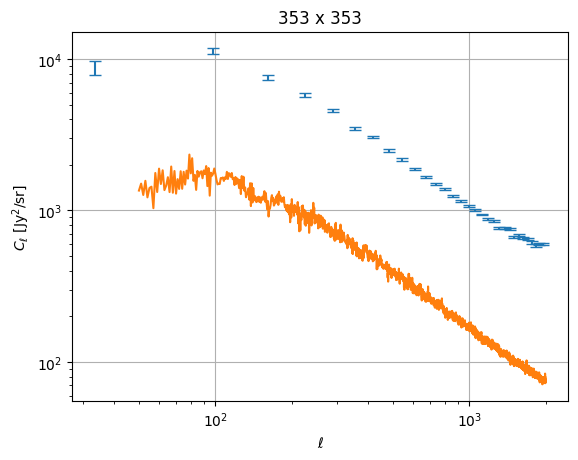

In [87]:
plt.errorbar(
    df_cib_auto['ell'],
    df_cib_auto['353x353'],
    yerr=df_cib_auto['d353x353'],
    ls="None",
    capsize=4)
plt.grid()

plt.loglog(np.arange(3072)[50:2000], (cibdata_eq_masked_cl['353'][50:2000]))

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell\ [\rm Jy^2/sr]$')
plt.title('353 x 353')

Include window function

In [88]:
wf_353 = pd.read_csv('/Users/tkarim/research/galCIB/data/cib/353/windowfunctions.csv',
    comment='#')

In [89]:
wf_353.head()

ell  pixfunc  Bl_16arcmin  Wl_16arcmin  Bl_kernel  Wl_kernel  Bl_native  \
0    0      1.0     1.000000     1.000000   1.000000   1.000000   1.000000   
1    1      1.0     0.999996     0.999996   1.000000   1.000000   1.000000   
2    2      1.0     0.999988     0.999988   1.000001   1.000001   0.999999   
3    3      1.0     0.999976     0.999976   1.000003   1.000003   0.999997   
4    4      1.0     0.999960     0.999960   1.000005   1.000004   0.999995   

   Wl_native  Bl_eff  Wl_eff  Wl_kappa  
0   1.000000     1.0     1.0       1.0  
1   1.000000     1.0     1.0       1.0  
2   0.999999     1.0     1.0       1.0  
3   0.999997     1.0     1.0       1.0  
4   0.999995     1.0     1.0       1.0

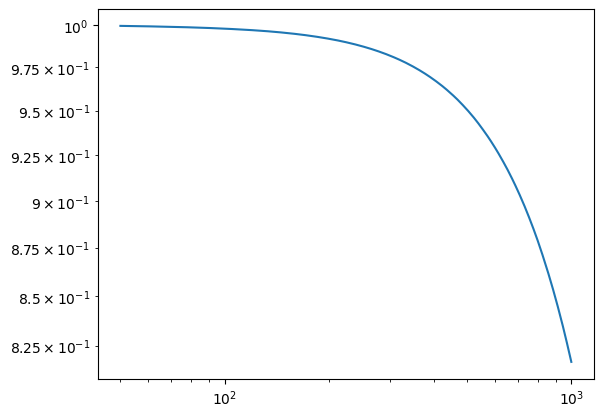

In [90]:
plt.loglog(wf_353['ell'][50:1000], wf_353['Wl_eff'][50:1000])

Text(0.5, 1.0, '353 x 353')

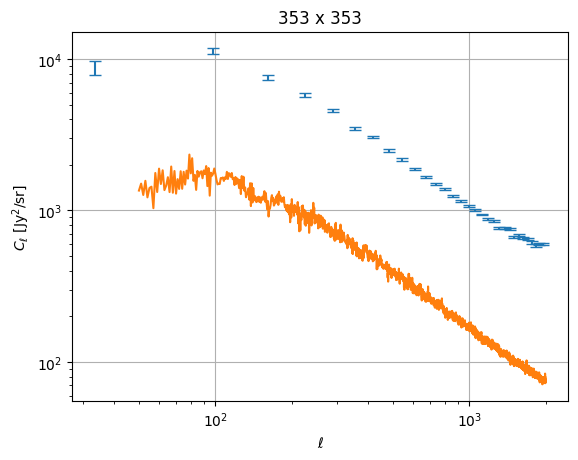

In [91]:
plt.errorbar(
    df_cib_auto['ell'],
    df_cib_auto['353x353'],
    yerr=df_cib_auto['d353x353'],
    ls="None",
    capsize=4)
plt.grid()

plt.loglog(np.arange(3072)[50:2000], 
           (cibdata_eq_masked_cl['353'][50:2000]))

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell\ [\rm Jy^2/sr]$')
plt.title('353 x 353')

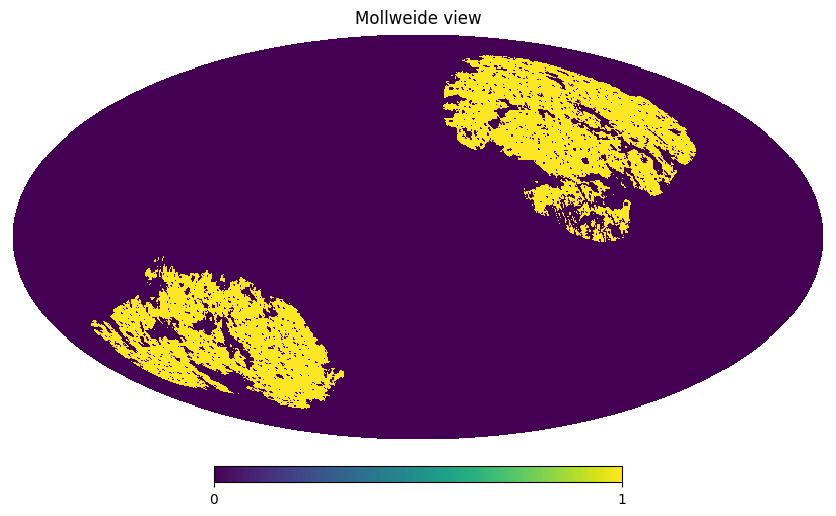

In [92]:
tstmsk = cibmasks_eq_apodized['353'] > .9
hp.mollview(tstmsk, rot = -85)

In [93]:
tst_fsky_353 = tstmsk.sum()/len(tstmsk)
tst_fsky_353

0.1409310499827067

(500.0, 20000.0)

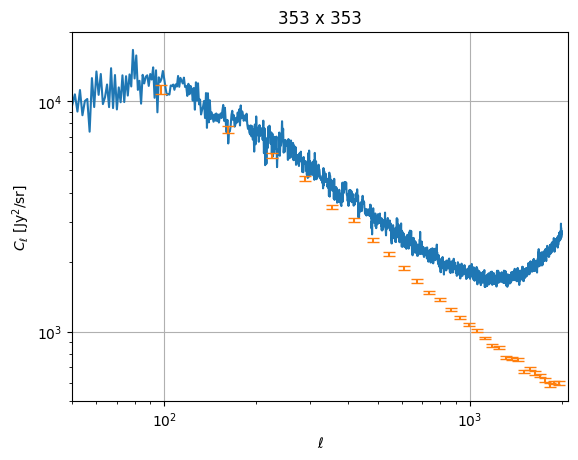

In [95]:
plt.loglog(np.arange(3072)[50:2000], 
           (cibdata_eq_masked_cl['353'][50:2000])/tst_fsky_353/wf_353['Wl_eff'][50:2000]**2)#/wf_353['Wl_eff'][50:2000]**2)

plt.errorbar(
    df_cib_auto['ell'],
    df_cib_auto['353x353'],
    yerr=df_cib_auto['d353x353'],
    ls="None",
    capsize=4)
plt.grid()

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell\ [\rm Jy^2/sr]$')
plt.title('353 x 353')
plt.xlim([50,2100])
plt.ylim([5*1e2,2*1e4])

Calculate power spectra with odd and even rings

In [96]:
oddring = hp.read_map("/Users/tkarim/research/galCIB/data/cib/353/cib_oddring.hpx.fits")*1e6
evenring = hp.read_map("/Users/tkarim/research/galCIB/data/cib/353/cib_evenring.hpx.fits")*1e6
fullmission = hp.read_map("/Users/tkarim/research/galCIB/data/cib/353/cib_fullmission.hpx.fits")*1e6

mask_bool = hp.read_map("/Users/tkarim/research/galCIB/data/cib/353/mask_bool.hpx.fits", dtype=bool)
mask_apod = hp.read_map("/Users/tkarim/research/galCIB/data/cib/353/mask_apod.hpx.fits")

In [97]:
lmax = 2000
ell = np.arange(lmax)

fsky = mask_bool.sum()/mask_bool.size

In [98]:
cl_odd_even = hp.anafast(
    map1=np.where(mask_bool, oddring, 0.) * mask_apod,
    map2=np.where(mask_bool, evenring, 0.) * mask_apod,
    lmax=lmax-1, datapath=healpy_data_path, use_pixel_weights=True, pol = False)

cl_full = hp.anafast(
    map1=np.where(mask_bool, fullmission, 0.) * mask_apod,
    map2=np.where(mask_bool, fullmission, 0.) * mask_apod,
    lmax=lmax-1, datapath=healpy_data_path, use_pixel_weights=True, pol = False)

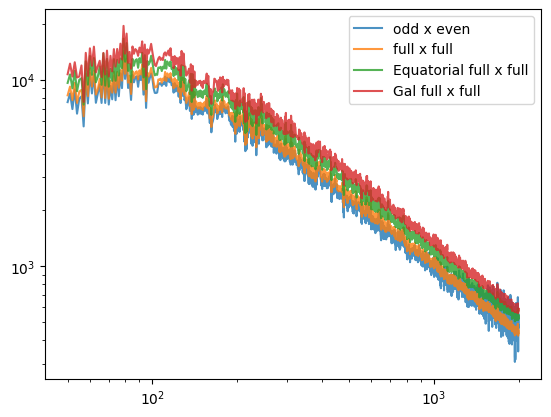

In [112]:
plt.loglog(ell[50:2000], cl_odd_even[50:2000]/fsky/wf_353['Wl_eff'][50:2000]**2, label = 'odd x even', alpha = 0.8)
plt.loglog(ell[50:2000], cl_full[50:2000]/fsky, label = 'full x full', alpha = 0.8)
plt.loglog(ell[50:2000], 
           (cibdata_eq_masked_cl['353'][50:2000])/tst_fsky_353, label = 'Equatorial full x full', alpha = 0.8)
plt.loglog(ell[50:2000], 
           (cibdata_gal_cl['353'][50:2000])/tst_fsky_353, label = 'Gal full x full', alpha = 0.8)
plt.legend(loc='best')

In [115]:
# test out by rotating the apodized gal mask 

gal_map_apod_original_353 = np.where(mask_bool, fullmission, 0.) * mask_apod

In [116]:
# convert galactic map to alms
tmp_alm_gal = hp.map2alm(gal_map_apod_original_353, pol=False,
                            use_pixel_weights=True,
                            datapath=healpy_data_path)

# rotate galactic alms to eq alms
tmp_alm_eq = r.rotate_alm(tmp_alm_gal)

# Project eq alms into NSIDE = 1024 maps
eq_map = hp.alm2map(tmp_alm_eq, nside = 1024, pol=False)

# also convert apod mask for testing 
tmp_alm_gal = hp.map2alm(mask_apod, pol=False,
                            use_pixel_weights=True,
                            datapath=healpy_data_path)

# rotate galactic alms to eq alms
tmp_alm_eq = r.rotate_alm(tmp_alm_gal)

# Project eq alms into NSIDE = 1024 maps
eq_mask_apod = hp.alm2map(tmp_alm_eq, nside = 1024, pol=False)

In [117]:
cl_eq_map_353 = hp.anafast(eq_map, use_pixel_weights=True, datapath=healpy_data_path,pol=False)
cl_eq_mask_apod_353 = hp.anafast(eq_mask_apod, use_pixel_weights=True, datapath=healpy_data_path,pol=False)

Text(0.5, 1.0, 'Eq apodised over original apodised')

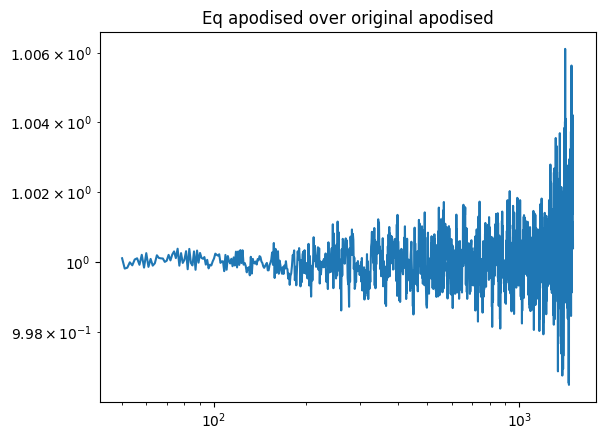

In [123]:
plt.loglog(ell[50:1500], cl_eq_map_353[50:1500]/cl_full[50:1500])
plt.title("Eq apodised over original apodised")

In [122]:
print(np.mean(cl_eq_map_353[50:1500]/cl_full[50:1500]), np.std(cl_eq_map_353[50:1500]/cl_full[50:1500]))

1.0001700649894536 0.0009173189180278688


In [125]:
cl_mask_apod = hp.anafast(mask_apod, use_pixel_weights=True, datapath=healpy_data_path, pol = False)

Text(0.5, 1.0, 'Apodized mask ratio')

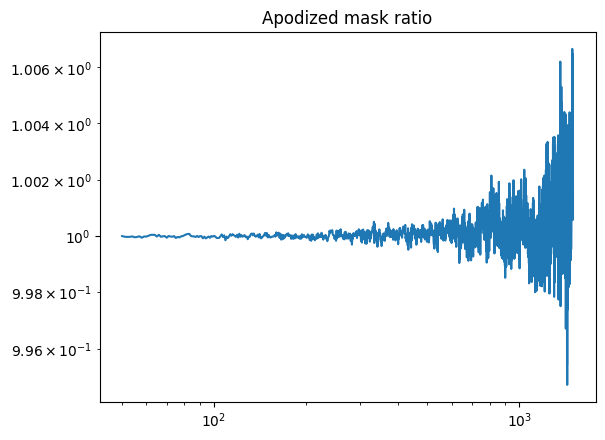

In [126]:
plt.loglog(ell[50:1500], cl_eq_mask_apod_353[50:1500]/cl_mask_apod[50:1500])
plt.title("Apodized mask ratio")

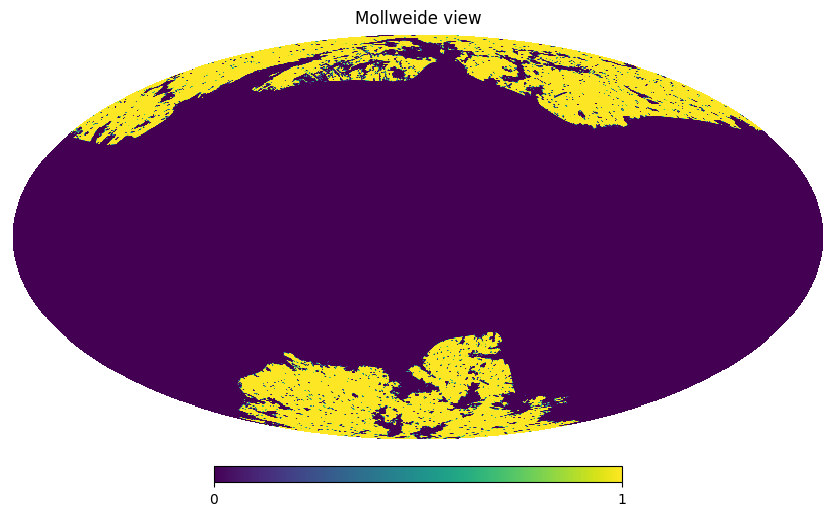

In [127]:
hp.mollview(mask_apod, rot = -85)

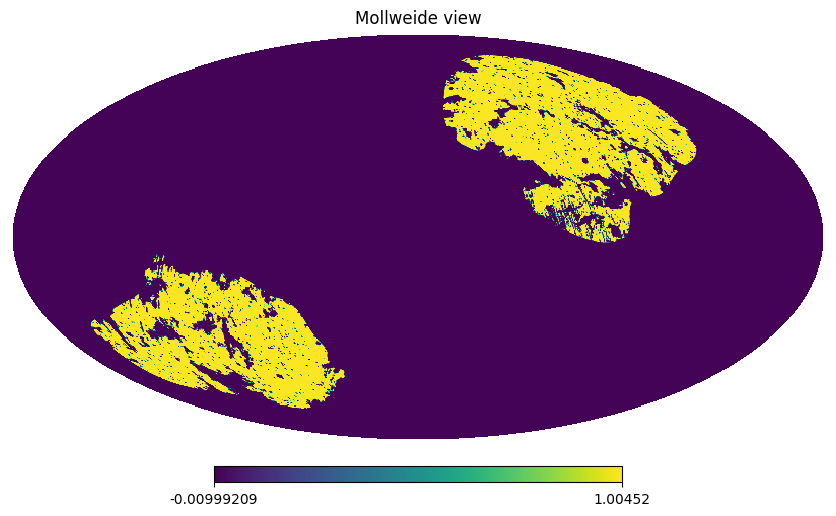

In [128]:
hp.mollview(eq_mask_apod, rot = -85)

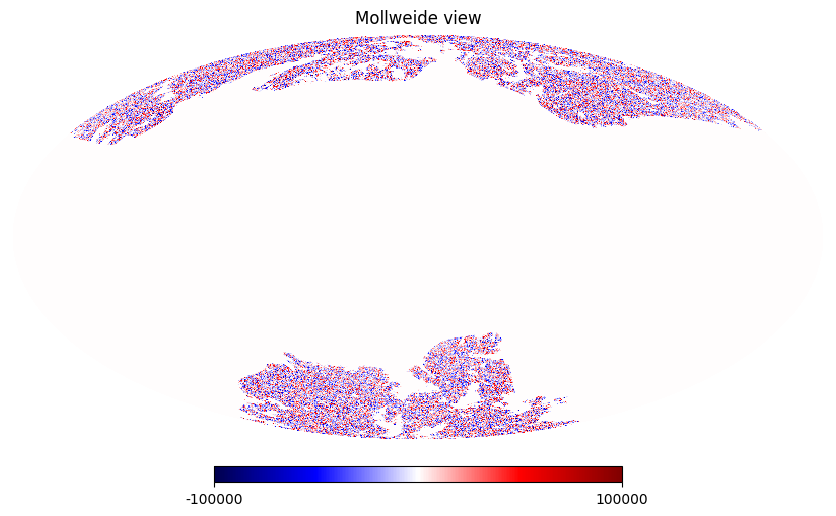

In [132]:
hp.mollview(np.where(mask_bool, fullmission, 0.) * mask_apod, rot = -85, min=-100000, max = +100000, cmap='seismic')

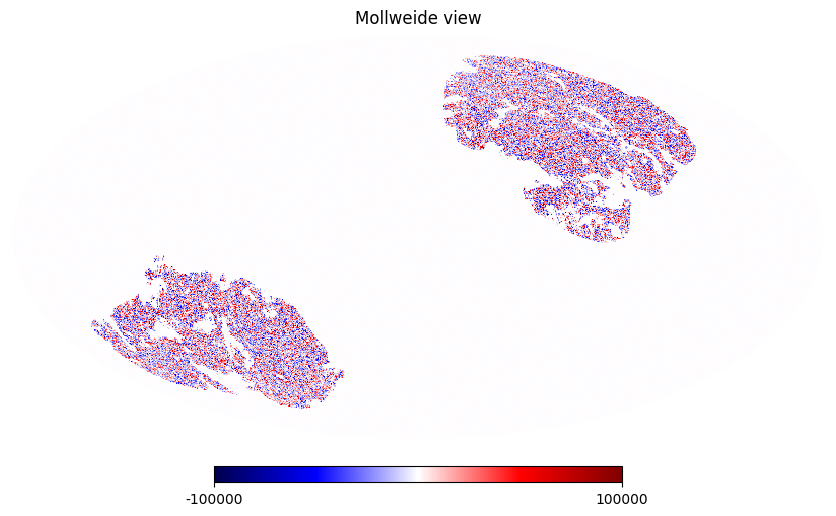

In [131]:
hp.mollview(eq_map, rot = -85, min=-100000, max = +100000, cmap='seismic')

## CIB auto-power measurement and correct rotation 

Based on these findings, I am remaking the data maps using the original apodized mask from Lenz et al. 2019. 

### Task set 1:

[Jego++22](https://arxiv.org/pdf/2206.15394) remarked in Section 3 that the pixel window function needs to be modified for the `NSIDE` used in analysis. Since our analysis is in `NSIDE = 1024`, we have to test and ensure the calculations are correct. 

The tests are listed below. 

- T1: CIB1 X CIB2 in native NSIDE = 2048 resolution using odd-even
- T2: CIB1 X CIB2 in new resolution NSIDE = 1024 resolution with correct `Wl_eff` using odd-even
- T3: CIB1 X CIB2 in native NSIDE = 2048 resolution using `fullmission`

#### T1: CIB1 X CIB2 in native `NSIDE = 2048` using `odd-even` 

In [4]:
NSIDE = 1024
LMIN = 100
LMAX = NSIDE
ells = np.arange(LMIN, LMAX)

colors = {} # colors of 353, 545, 857
colors['353'] = 'b'
colors['545'] = 'g'
colors['857'] = 'r'

In [5]:
# CIB1 X CIB2

healpy_data_path = '../healpy-weights/'
nulist = ['353', '545', '857']

cl_cibxcib_odd_even = {}
fsky_auto = {}

for nu_odd in nulist:
    for nu_even in nulist: 
        # read odd and even map for auto power spectra and multiply by 1e6 to convert Jy to mJy 
        oddring = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_odd}/cib_oddring.hpx.fits")*1e6
        evenring = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_even}/cib_evenring.hpx.fits")*1e6

        mask_bool_odd = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_odd}/mask_bool.hpx.fits", dtype=bool)
        mask_bool_even = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_even}/mask_bool.hpx.fits", dtype=bool)
        mask_apod_odd = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_odd}/mask_apod.hpx.fits")
        mask_apod_even = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu_even}/mask_apod.hpx.fits")

        fsky_auto[nu_odd] = mask_bool_odd.sum()/len(mask_bool_odd)
        
        cl_odd_even = hp.anafast(
            map1=np.where(mask_bool_odd, oddring, 0.) * mask_apod_odd,
            map2=np.where(mask_bool_even, evenring, 0.) * mask_apod_even,
            datapath=healpy_data_path, use_pixel_weights=True, pol = False)
            
        cl_cibxcib_odd_even[f'{nu_odd}x{nu_even}'] = cl_odd_even

Correct for beam function

In [58]:
# check the beam functions are different 

beam_effs = {}

for nu in nulist:
    beam_effs[nu] = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu}/windowfunctions.csv', comment='#')['Wl_eff'].values

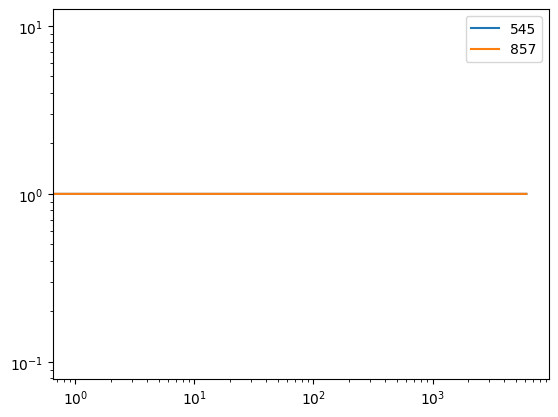

In [7]:
nu = '545'
plt.loglog(beam_effs[nu]/beam_effs['353'],label=nu)

nu = '857'
plt.loglog(beam_effs[nu]/beam_effs['353'],label=nu)

plt.legend(loc='best')

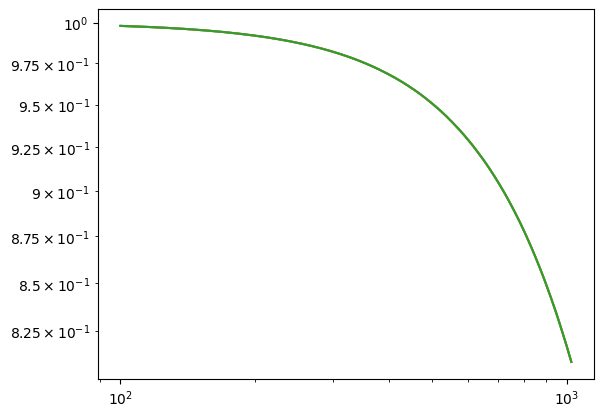

In [8]:
for nu in nulist:
    plt.loglog(ells, beam_effs[nu][LMIN:LMAX])

In [18]:
# check if the beam functions are different 

tst_353 = pd.read_csv(f'/Users/tkarim/research/galCIB/data/windowfunctions-353.csv',
                      comment='#')['Bl_native'].values

tst_545 = pd.read_csv(f'/Users/tkarim/research/galCIB/data/windowfunctions-545.csv',
                      comment='#')['Bl_native'].values

tst_857 = pd.read_csv(f'/Users/tkarim/research/galCIB/data/windowfunctions-857.csv',
                      comment='#')['Bl_native'].values

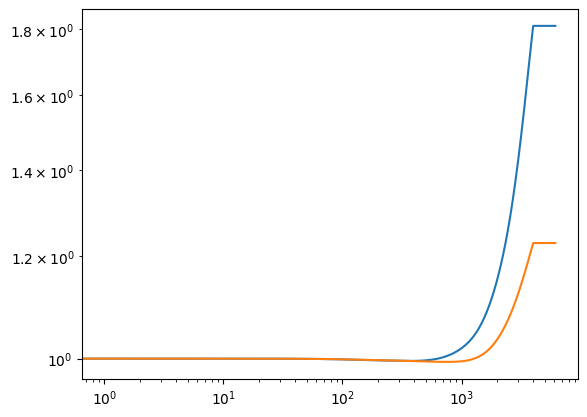

In [21]:
plt.loglog(tst_857/tst_353)
plt.loglog(tst_545/tst_353)

In [9]:
cl_cibxcib_odd_even_beam_corrected = {}

for nu_odd in nulist:
    for nu_even in nulist:
        
        odd_beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu_odd}/windowfunctions.csv', comment='#')['Wl_eff'].values
        even_beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu_even}/windowfunctions.csv', comment='#')['Wl_eff'].values
        
        cl_cibxcib_odd_even_beam_corrected[f'{nu_odd}x{nu_even}'] = cl_cibxcib_odd_even[f'{nu_odd}x{nu_even}'][:LMAX]/(odd_beam * even_beam)[:LMAX]

In [14]:
# read data from Lenz 19 paper

data_lenz19 = pd.read_csv("/Users/tkarim/research/galCIB/data/cib/Cl_CIB_T1T2.csv", comment="#")

flag_lenz19 = (data_lenz19['ell'] >= LMIN) & (data_lenz19['ell'] <= LMAX)

(800.0, 350000.0)

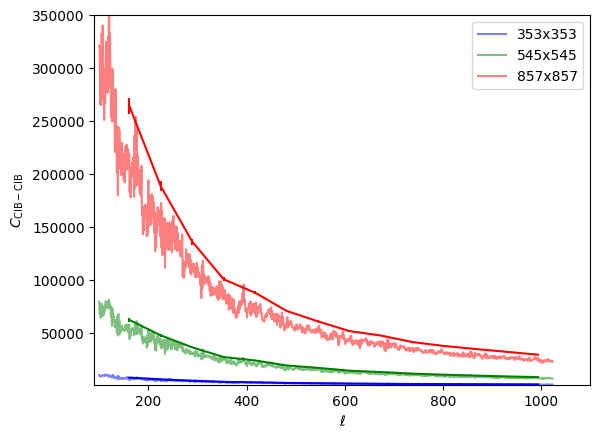

In [33]:
# check only auto-power 
for nu in nulist: 
    nu_odd = nu
    nu_even = nu_odd

    plt.plot(ells, cl_cibxcib_odd_even_beam_corrected[f'{nu_odd}x{nu_even}'][LMIN:LMAX]/fsky_auto[nu_odd], 
            label = f'{nu_odd}x{nu_even}', c = colors[nu], alpha = 0.5)
    plt.errorbar(data_lenz19['ell'][flag_lenz19], data_lenz19[f'{nu_odd}x{nu_even}'][flag_lenz19], 
                yerr=data_lenz19[f'd{nu_odd}x{nu_even}'][flag_lenz19], c = colors[nu])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_{\rm CIB-CIB}$")
plt.legend(loc='best')

plt.xlim([90, 1100])
plt.ylim([8*1e2,3.5*1e5])

Ratio of 353x545/545x353 = 1.0030775567018257 +/- 0.04530326298652308
Ratio of 353x857/857x353 = 1.00431152915839 +/- 0.04767379001239157
Ratio of 545x857/857x545 = 1.0003176536230476 +/- 0.019254757124725547


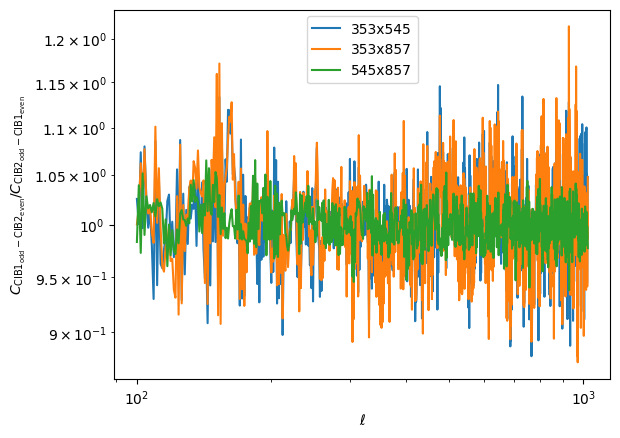

In [34]:
# check how the odd x even of nu x nu' turns out if nu' x nu is flipped. 
# this needs to be compared with fullmission nu x nu' as per https://arxiv.org/pdf/2210.01049 Section IV.F

for nu1 in nulist:
    for nu2 in nulist:
        if ((nu1 == nu2) | (int(nu1) > int(nu2))):
            continue
        plt.loglog(ells, 
                   cl_cibxcib_odd_even_beam_corrected[f'{nu1}x{nu2}'][LMIN:LMAX]/cl_cibxcib_odd_even_beam_corrected[f'{nu2}x{nu1}'][LMIN:LMAX],
                   label = f'{nu1}x{nu2}')
        
        tmp_ratio = cl_cibxcib_odd_even_beam_corrected[f'{nu1}x{nu2}'][LMIN:LMAX]/cl_cibxcib_odd_even_beam_corrected[f'{nu2}x{nu1}'][LMIN:LMAX]
        print(f'Ratio of {nu1}x{nu2}/{nu2}x{nu1} = {np.mean(tmp_ratio)} +/- {np.std(tmp_ratio)}')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_{\rm CIB1_{\rm odd}-CIB2_{\rm even}}/C_{\rm CIB2_{\rm odd}-CIB1_{\rm even}}$")
plt.legend(loc='best')

In [45]:
# now calculate the cross with fullmission and compare where nu != nu'

cl_cibxcib_fullmission = {}
cl_cibxcib_fullmission_beam_corrected = {}
fsky_cross = {}

for nu1 in nulist:
    for nu2 in nulist: 
        
        if nu1 == nu2: # ignore nu == nu' because of auto-noise
            continue 
        
        if int(nu1) > int(nu2): # ignore double counting 
            continue
        
        # multiply by 1e6 to convert Jy to mJy 
        nu1_map = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu1}/cib_fullmission.hpx.fits")*1e6
        nu2_map = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu2}/cib_fullmission.hpx.fits")*1e6

        # read in relevant masks and calculate effective fsky
        mask_bool1 = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu1}/mask_bool.hpx.fits", dtype=bool)
        mask_bool2 = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu2}/mask_bool.hpx.fits", dtype=bool)
        mask_bool_eff = mask_bool1 * mask_bool2
        fsky_cross[f'{nu1}x{nu2}'] = mask_bool_eff.sum()/len(mask_bool_eff)
        
        mask_apod1 = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu1}/mask_apod.hpx.fits")
        mask_apod2 = hp.read_map(f"/Users/tkarim/research/galCIB/data/cib/{nu2}/mask_apod.hpx.fits")

        # calculate power spectra
        cl_fullmission = hp.anafast(
            map1=np.where(mask_bool1, nu1_map, 0.) * mask_apod1,
            map2=np.where(mask_bool2, nu2_map, 0.) * mask_apod2,
            datapath=healpy_data_path, use_pixel_weights=True, pol = False)
            
        cl_cibxcib_fullmission[f'{nu1}x{nu2}'] = cl_fullmission
        
        # beam correction
        beam1 = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu1}/windowfunctions.csv', comment='#')['Wl_eff'].values
        beam2 = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu2}/windowfunctions.csv', comment='#')['Wl_eff'].values
        
        cl_cibxcib_fullmission_beam_corrected[f'{nu1}x{nu2}'] = cl_cibxcib_fullmission[f'{nu1}x{nu2}'][:LMAX]/(beam1*beam2)[:LMAX]

(90.0, 1100.0)

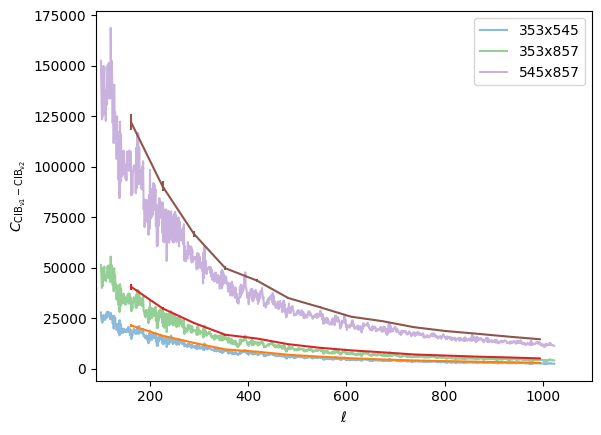

In [47]:
# plot and compare

# check only cros-power
for nu1 in nulist: 
    for nu2 in nulist: 

        if nu1 == nu2: # ignore nu == nu' because of auto-noise
            continue 
        
        if int(nu1) > int(nu2): # ignore double counting 
            continue

        # map plot
        plt.plot(ells, 
                 cl_cibxcib_fullmission_beam_corrected[f'{nu1}x{nu2}'][LMIN:LMAX]/fsky_cross[f'{nu1}x{nu2}'], 
                label = f'{nu1}x{nu2}', alpha = 0.5)
        
        # Lenz++19 data
        plt.errorbar(data_lenz19['ell'][flag_lenz19], data_lenz19[f'{nu1}x{nu2}'][flag_lenz19], 
                    yerr=data_lenz19[f'd{nu1}x{nu2}'][flag_lenz19])

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_{\rm CIB_{\nu1}-CIB_{\nu2}}$")
plt.legend(loc='best')

plt.xlim([90, 1100])
#plt.ylim([8*1e2,3.5*1e5])

Ratio of 353x545 odd-even w/ fm = 0.9976833130853208 +/- 0.48784247965900385
Ratio of 353x545 even-odd w/ fm = 0.9908749875278482 +/- 0.5894862689428707
Ratio of 353x857 odd-even w/ fm = 0.9930970815910204 +/- 0.11860539800233845
Ratio of 353x857 even-odd w/ fm = 0.9922767151186043 +/- 0.22263153633054236
Ratio of 545x857 odd-even w/ fm = 1.0012935377406937 +/- 0.06774386226483733
Ratio of 545x857 even-odd w/ fm = 0.987679338426247 +/- 0.2863943713551229


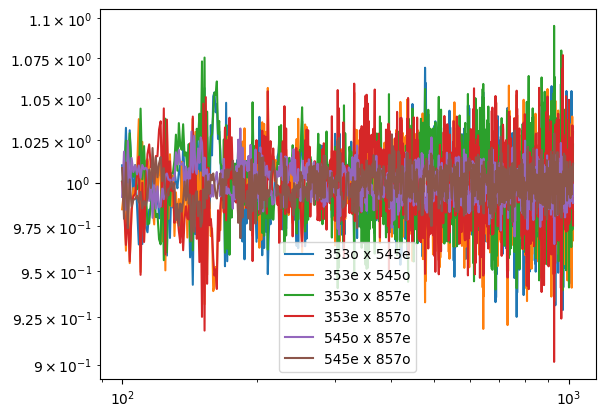

In [57]:
for nu1 in nulist: 
    for nu2 in nulist: 

        if nu1 == nu2: # ignore nu == nu' because of auto-noise
            continue 
        
        if int(nu1) > int(nu2): # ignore double counting 
            continue

        ratio1 = cl_cibxcib_odd_even_beam_corrected[f'{nu1}x{nu2}']/cl_cibxcib_fullmission_beam_corrected[f'{nu1}x{nu2}']
        ratio2 = cl_cibxcib_odd_even_beam_corrected[f'{nu2}x{nu1}']/cl_cibxcib_fullmission_beam_corrected[f'{nu1}x{nu2}']
        plt.loglog(ells, ratio1[LMIN:LMAX], label = f'{nu1}o x {nu2}e')
        plt.loglog(ells, ratio2[LMIN:LMAX], label = f'{nu1}e x {nu2}o')

        print(f'Ratio of {nu1}x{nu2} odd-even w/ fm = {np.mean(ratio1)} +/- {np.std(ratio1)}')
        print(f'Ratio of {nu1}x{nu2} even-odd w/ fm = {np.mean(ratio2)} +/- {np.std(ratio2)}')

plt.legend(loc='best')

In [59]:
# save auto from odd-even and cross from fullmission

cl_cibxcib_beam_corrected_final = {}

for nu1 in nulist:
    for nu2 in nulist:
        
        if nu1 == nu2:
            cl_cibxcib_beam_corrected_final[f'{nu1}x{nu2}'] = cl_cibxcib_odd_even_beam_corrected[f'{nu1}x{nu2}']
        else:
            if int(nu1) > int(nu2): 
                continue
            else: # do not double count
                cl_cibxcib_beam_corrected_final[f'{nu1}x{nu2}'] = cl_cibxcib_fullmission_beam_corrected[f'{nu1}x{nu2}']

In [60]:
cl_cibxcib_beam_corrected_final.keys()

dict_keys(['353x353', '353x545', '353x857', '545x545', '545x857', '857x857'])

In [61]:
np.save("data/cib/cl_cibxcib_beam_corrected.npy", cl_cibxcib_beam_corrected_final)

### 2nd Cell: Rotated CIB `fullmission` with apodized 

In [5]:
# read in the relevant fullmission directories

folname = 'data/cib/'
fname = '/cib_fullmission.hpx.fits'

In [6]:
r = hp.Rotator(coord=['G','C']) #define rotator class from Eq. Coord. to Gal. Coord
healpy_data_path = '../healpy-weights/'
nulist = ['353', '545', '857']

# CIB data in equatorial
cib_fm_map_e_apod = {} # store apodized rotated map 
cl_cibxcib_fm_e_apod = {} # store c_ell from equatorial map
cl_cibxcib_fm_g_apod = {} # store original c_ell of fullmission (fm) from galactic map

for nu in nulist:
    
    # read map and masks; g refers to galactic and e refers to equatorial
    tmp_cib_fm_map_g = hp.read_map(folname + nu + fname) * 1e6 # convert from mJy to Jy
    tmp_mask_bool_g = hp.read_map(folname + f"{nu}/mask_bool.hpx.fits", dtype=bool)
    tmp_mask_apod_g = hp.read_map(folname + f"{nu}/mask_apod.hpx.fits")
    
    # clean map without nans
    tmp_cib_fm_map_g_apod = np.where(tmp_mask_bool_g, tmp_cib_fm_map_g, 0.) * tmp_mask_apod_g
    
    # measure C_ell from original map
    tmp_cl_g = hp.anafast(map1=tmp_cib_fm_map_g_apod, pol = False,
                          datapath=healpy_data_path, use_pixel_weights=True)
        
    # store galactic C_ell
    cl_cibxcib_fm_g_apod[nu] = tmp_cl_g
    
    # convert galactic map to alms
    tmp_alm_g = hp.map2alm(tmp_cib_fm_map_g_apod, pol=False,
                           use_pixel_weights=True, datapath=healpy_data_path)
    
    # rotate galactic alms to eq alms
    tmp_alm_e = r.rotate_alm(tmp_alm_g)
    
    # Project eq alms into NSIDE = 1024 maps
    tmp_map_e = hp.alm2map(tmp_alm_e, nside = NSIDE, pol=False)
    
    # store equatorial rotated map 
    cib_fm_map_e_apod[nu] = tmp_map_e
    
    # C_ell from map for comparison 
    tmp_cl_q_1024 = hp.anafast(tmp_map_e, pol = False, 
                               datapath=healpy_data_path,
                               use_pixel_weights=True)
    
    # store equatorial map C_ell for comparison
    cl_cibxcib_fm_e_apod[nu] = tmp_cl_q_1024

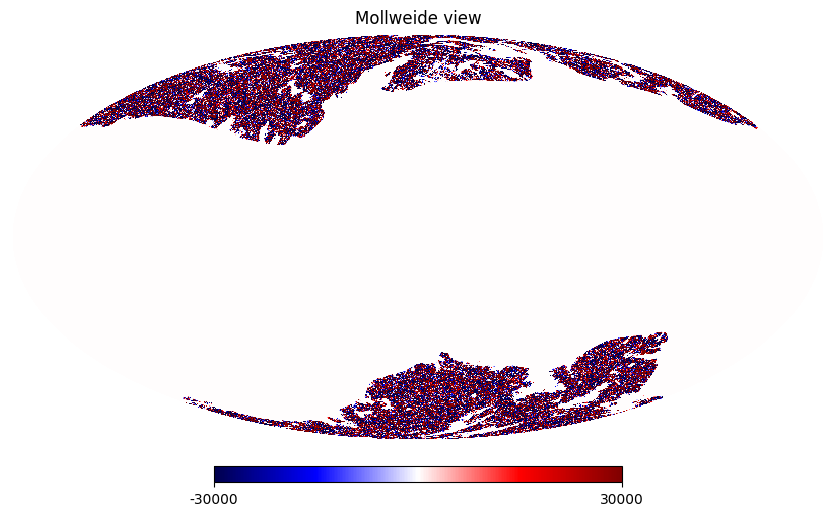

In [45]:
hp.mollview(tmp_cib_fm_map_g_apod, min =-30000, max = +30000,
            cmap = 'seismic')

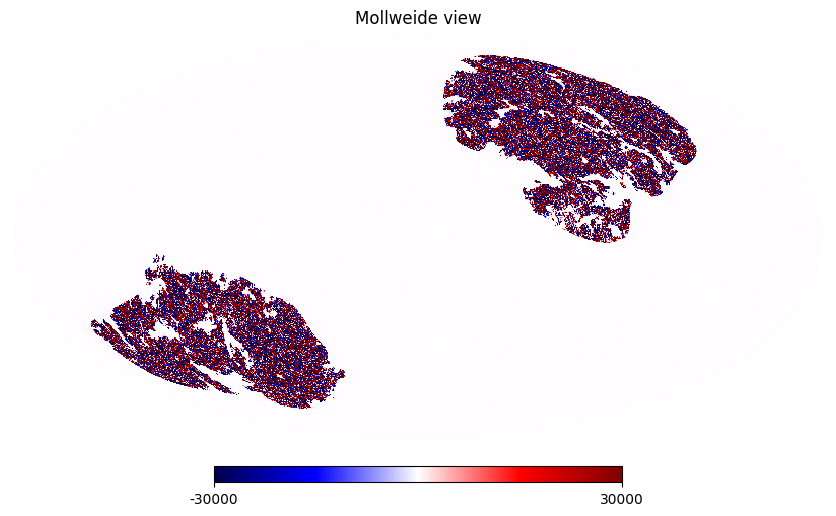

In [48]:
hp.mollview(tmp_map_e, min =-30000, max = +30000,
            cmap = 'seismic', rot = -85)

Ratio of eq/gal in 353 GHz = 1.0000185631095182 +/- 0.0006107599091849945
Ratio of eq/gal in 545 GHz = 1.000008940826452 +/- 0.0006066984193088431
Ratio of eq/gal in 857 GHz = 1.0001191880711062 +/- 0.0009418919595221757


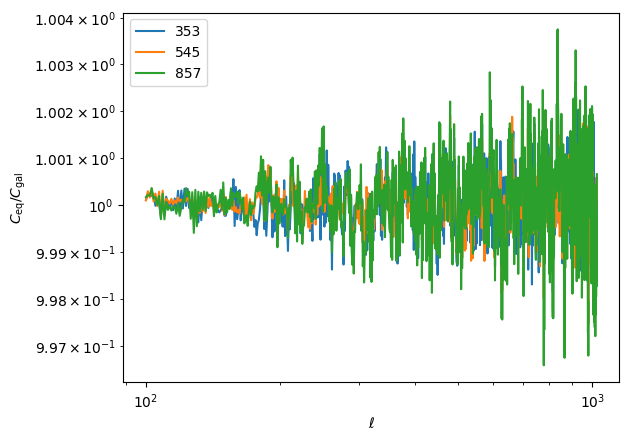

In [7]:
# compare galactic with eq for only fullmission
for nu in nulist: 
    ratio = cl_cibxcib_fm_e_apod[nu][LMIN:LMAX]/cl_cibxcib_fm_g_apod[nu][LMIN:LMAX]
    
    plt.loglog(ells, ratio, label=nu)
    print(f'Ratio of eq/gal in {nu} GHz = {np.mean(ratio)} +/- {np.std(ratio)}')

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_{\rm eq}/C_{\rm gal}$")
plt.legend(loc='best')

This shows that the galactic and the equatorial beam UNCORRECTED maps agree upto `LMAX`.

Now we compare the beam CORRECTED versions 

In [21]:
# read in beam-corrected file
cl_cibxcib_beam_corrected_final = np.load("data/cib/cl_cibxcib_beam_corrected.npy",
                                          allow_pickle=True)[()]

In [22]:
cl_cibxcib_beam_corrected_final

{'353x353': array([ 304.57932388, -462.86334296,  -54.97729673, ...,  166.60675302,
         147.37373061,  156.61778687]),
 '353x545': array([  16.54454281, 1025.3084411 ,  -31.01705401, ...,  399.29016733,
         384.00383012,  387.8798755 ]),
 '353x857': array([1753.85174361, 1602.27170555,  938.05701196, ...,  671.56507795,
         672.24645697,  648.90572247]),
 '545x545': array([-157.3525366 , 1969.69850129,  743.24731595, ..., 1079.96618664,
        1074.60656179, 1066.65280492]),
 '545x857': array([ 709.89208236, 3117.98500834, 1340.25234034, ..., 1863.82011274,
        1847.12340524, 1813.70819015]),
 '857x857': array([79016.92109455,  4280.31712432, 30972.69161652, ...,
         3725.29593534,  3807.49267403,  3640.20251664])}

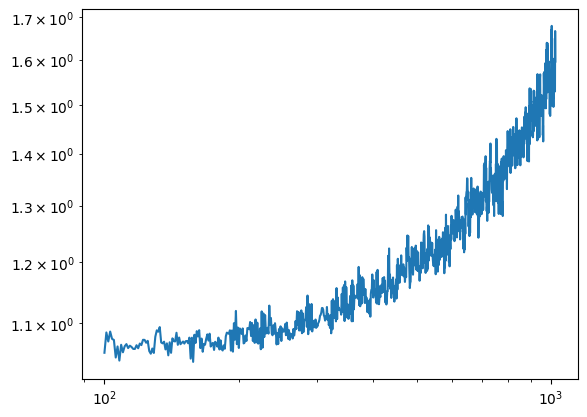

In [26]:
# first compare beam correction of the galactic C_ell just to be sure 

nu = '353'
beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu}/windowfunctions.csv', comment='#')['Wl_eff'].values

plt.loglog(ells, 
           (cl_cibxcib_fm_g_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX]))/cl_cibxcib_beam_corrected_final[f'{nu}x{nu}'][LMIN:LMAX])


353
545
857


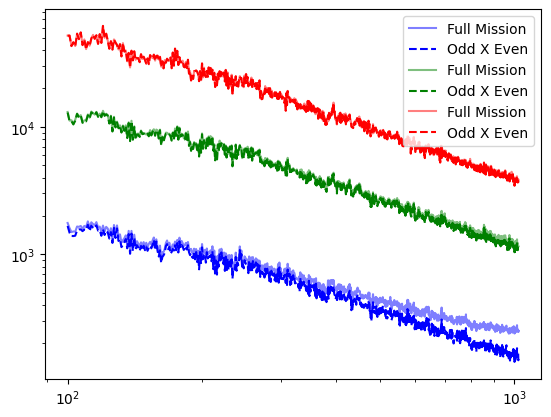

In [37]:
for nu in nulist:
    print(nu)
    beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu}/windowfunctions.csv', 
                       comment='#')['Wl_eff'].values
    plt.loglog(ells, 
            cl_cibxcib_fm_g_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX]),
            label = 'Full Mission', c = colors[nu], alpha = 0.5)
    plt.loglog(ells,
            cl_cibxcib_beam_corrected_final[f'{nu}x{nu}'][LMIN:LMAX],
            label = 'Odd X Even', c = colors[nu], ls = '--')
plt.legend(loc='best')


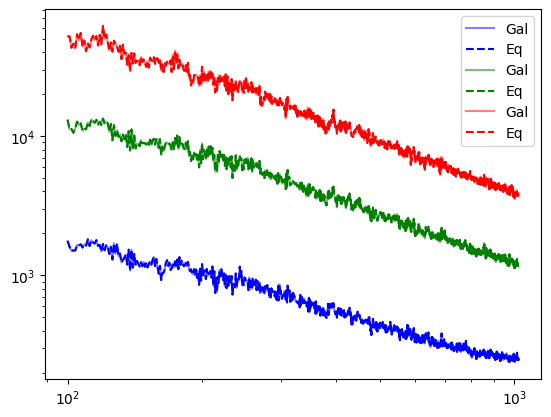

In [40]:
# now compare the equatorial case with beam correction 

for nu in nulist:
    beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu}/windowfunctions.csv', 
                       comment='#')['Wl_eff'].values
    g_beam_corrected = cl_cibxcib_fm_g_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX])
    e_beam_corrected = cl_cibxcib_fm_e_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX])
    plt.loglog(ells, g_beam_corrected,
            label = 'Gal', c = colors[nu], alpha = 0.5)
    plt.loglog(ells, e_beam_corrected,
            label = 'Eq', c = colors[nu], ls = '--')
plt.legend(loc='best')


Ratio of E/G beam corrected is = 1.0000185631095182 +/- 0.000610759909184997
Ratio of E/G beam corrected is = 1.000008940826452 +/- 0.0006066984193088432
Ratio of E/G beam corrected is = 1.0001191880711062 +/- 0.0009418919595221802


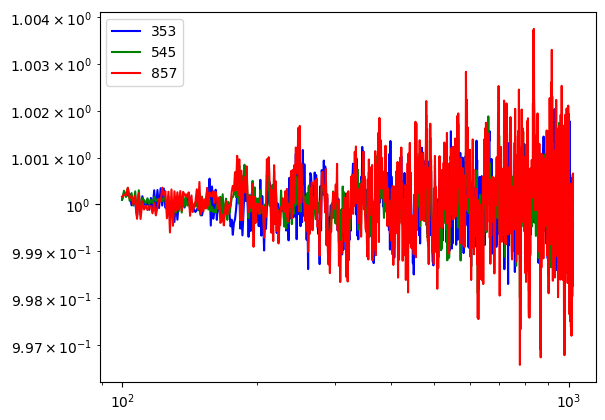

In [42]:
# now compare the equatorial case with beam correction 

for nu in nulist:
    beam = pd.read_csv(f'/Users/tkarim/research/galCIB/data/cib/{nu}/windowfunctions.csv', 
                       comment='#')['Wl_eff'].values
    g_beam_corrected = cl_cibxcib_fm_g_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX])
    e_beam_corrected = cl_cibxcib_fm_e_apod[nu][LMIN:LMAX]/(beam[LMIN:LMAX]*beam[LMIN:LMAX])
    
    ratio = e_beam_corrected/g_beam_corrected
    
    plt.loglog(ells, ratio,
            label = nu, c = colors[nu])
    print(f'Ratio of E/G beam corrected is = {np.mean(ratio)} +/- {np.std(ratio)}')
plt.legend(loc='best')


In [43]:
# save rotated maps 

np.save("data/cib/rotated_apodized_eq_maps.npy", cib_fm_map_e_apod)

In [59]:
# save effective beams of 2e20

np.save("data/cib/beam_effective_2e20.npy", beam_effs)

# Test codes

In [3]:
import powerspectra as ps
import consts
import precalc as pc
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

(210,)
Note: redshifts have been re-sorted (earliest first)


In [ ]:
theta_Y23 = np.array([1., # relaxtion parameter hmalpha
                  1e-2, # shotnoise
                  5.47, 11.64, 0.30, 0.1, # Ncen (R23): gamma, log10Mc, sigmaM, Ac
                  0.41, 10**(11.20), 10**(13.78), 0.81, # Nsat (R23): As, M0, M1, alpha
                  0.58, 6.14, 0.67, # radial profile (R23): fexp, tau, lambda_NFW
                  2.7, 0.49, 11.51, 0.55, 2.74, 0.5, 2.15, # SFR (Y23): L0, mu_peak0, mu_peakp, sigma_M0, tau, zc
                  21.14, 0.21, 1.98 # SED (Y23): beta, T0, alpha
                  ]) 
            

In [ ]:
theta_M23 = np.array([1., # relaxtion parameter hmalpha
                  1e-10, # shotnoise
                  5.47, 11.64, 0.30, 0.1, # Ncen (Y23): gamma, log10Mc, sigmaM, Ac
                  0.41, 10**(11.20), 10**(13.78), 0.81, # Nsat (R23): As, M0, M1, alpha
                  0.58, 6.14, 0.67, # radial profile (R23): fexp, tau, lambda_NFW
                  0.49, 11.52, -0.02, 2.74, 0.5, 2.15, 12.74, 0.4   # SFR (M23): etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM
                  ]) 
            

In [ ]:
cibterm = ps.cibgalcross_cell_tot(theta_M23, cib_model='M21')

o


/Users/tkarim/Documents/research/cib.nosync/halo.py:232: RuntimeWarning: invalid value encountered in sin
  greater_term = (3*(np.sin(rk) - rk * np.cos(rk)) / rk**3)
/Users/tkarim/Documents/research/cib.nosync/halo.py:232: RuntimeWarning: invalid value encountered in cos
  greater_term = (3*(np.sin(rk) - rk * np.cos(rk)) / rk**3)
/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/numpy/lib/function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Mmin_IR = 12.74
IR_sigma_lnM = 0.4
(12.74, 0.4)


In [ ]:
plt.loglog()

In [ ]:
consts.nu_list[-2]

545000000000.0

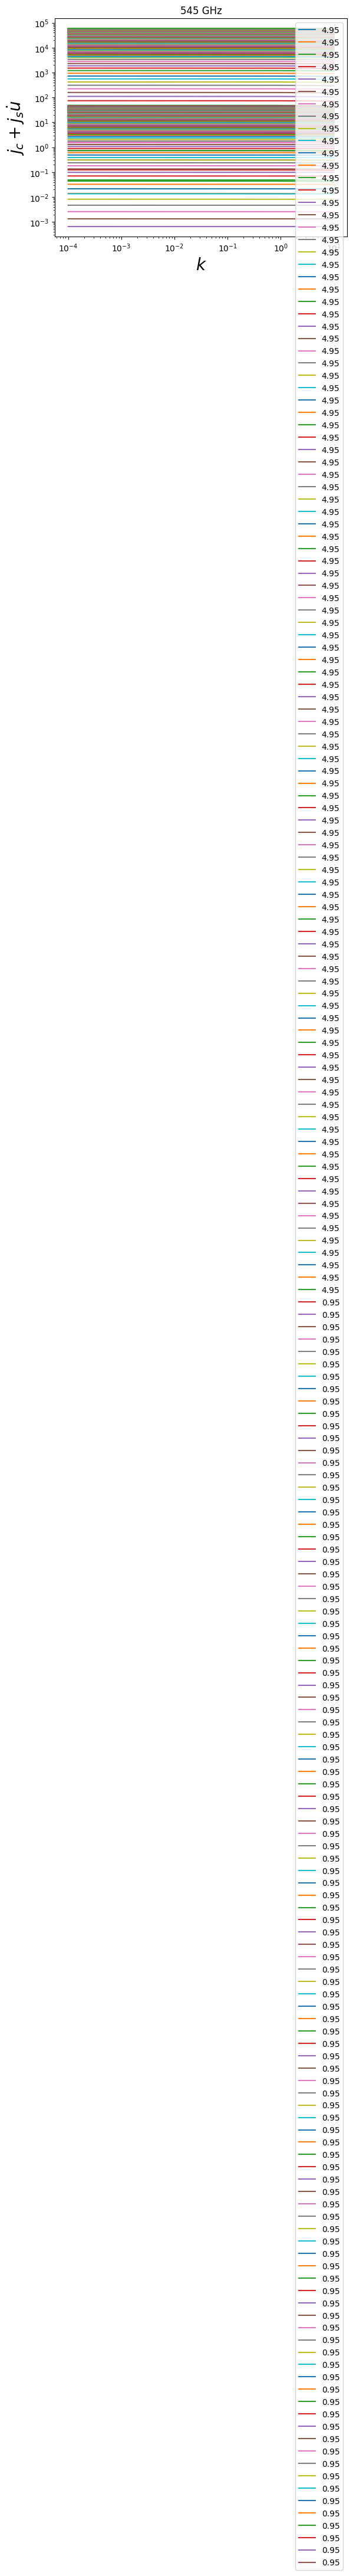

In [ ]:
plt.loglog(consts.Plin['k'], cibterm[-2,:,50], label = np.round(consts.Plin['z'][50],2))
plt.loglog(consts.Plin['k'], cibterm[-2,:,10], label = np.round(consts.Plin['z'][10],2))
plt.ylabel(r"$j_c + j_s \dot u$", fontsize = 20)
plt.xlabel(r"$k$", fontsize = 20)
plt.title("545 GHz")
plt.legend(loc = 'best')

In [ ]:
c_ell[2]

array([1.02045339e-10, 1.02088163e-10, 1.02131951e-10, 1.02176721e-10,
       1.02222498e-10, 1.02269303e-10, 1.02317158e-10, 1.02366089e-10,
       1.02416117e-10, 1.02467269e-10, 1.02519568e-10, 1.02573040e-10,
       1.02627712e-10, 1.02683610e-10, 1.02740761e-10, 1.02799194e-10,
       1.02858935e-10, 1.02920015e-10, 1.02982463e-10, 1.03046309e-10,
       1.03111584e-10, 1.03178319e-10, 1.03246547e-10, 1.03316301e-10,
       1.03387614e-10, 1.03460521e-10, 1.03535055e-10, 1.03611254e-10,
       1.03689153e-10, 1.03768790e-10, 1.03850202e-10, 1.03933428e-10,
       1.04018508e-10, 1.04105482e-10, 1.04194390e-10, 1.04285276e-10,
       1.04378181e-10, 1.04473149e-10, 1.04570225e-10, 1.04669453e-10,
       1.04770880e-10, 1.04874554e-10, 1.04980522e-10, 1.05088832e-10,
       1.05199535e-10, 1.05312681e-10, 1.05428321e-10, 1.05546509e-10,
       1.05667298e-10, 1.05790743e-10, 1.05916898e-10, 1.06045820e-10,
       1.06177567e-10, 1.06312198e-10, 1.06449770e-10, 1.06590346e-10,
      

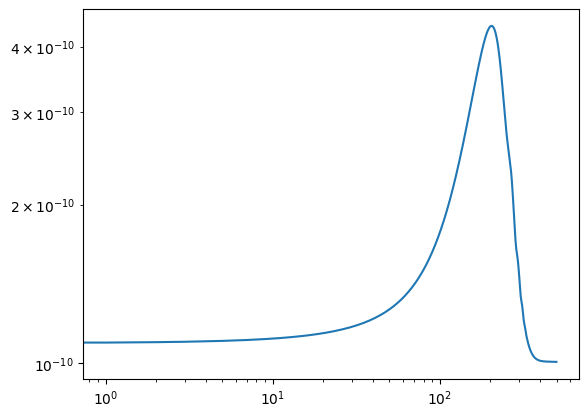

In [ ]:
plt.loglog(c_ell[3])

In [ ]:
from astropy.cosmology import Planck18 as planck

In [ ]:
Plin['k'] * planck.comoving_distance(Plin['z']).value

ValueError: operands could not be broadcast together with shapes (500,) (103,) 

In [ ]:
Plin = consts.Plin

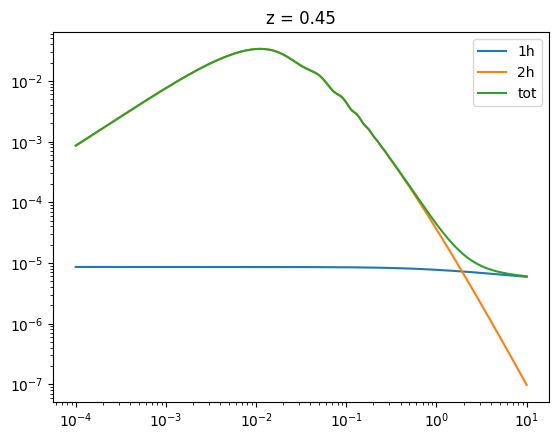

In [ ]:
idx = 5
plt.loglog(Plin['k'], oneh[0,:,idx], label = '1h')
plt.loglog(Plin['k'], twoh[0,:,idx], label = '2h')
plt.loglog(Plin['k'], pk1_2[0,:,idx], label = 'tot')
plt.title(f"z = {np.round(Plin['z'][idx],2)}")
plt.legend(loc = 'best')

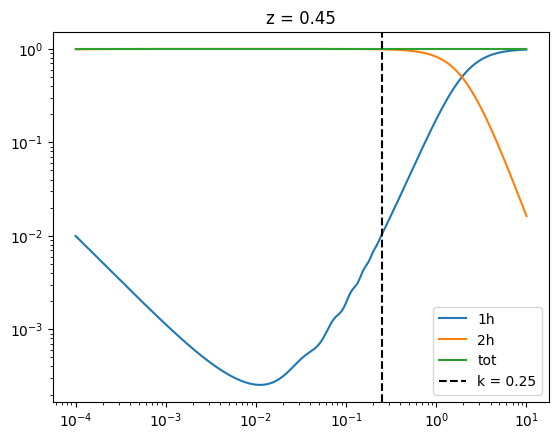

In [ ]:
idx = 5
plt.loglog(Plin['k'], oneh[0,:,idx]/pk1_2[0,:,idx], label = '1h')
plt.loglog(Plin['k'], twoh[0,:,idx]/pk1_2[0,:,idx], label = '2h')
plt.loglog(Plin['k'], pk1_2[0,:,idx]/pk1_2[0,:,idx], label = 'tot')
plt.title(f"z = {np.round(Plin['z'][idx],2)}")
plt.axvline(0.25, c = 'k', ls = '--', label = 'k = 0.25')
plt.legend(loc = 'best')

In [ ]:
Plin['k'][(1 - twoh[0,:,idx]/pk1_2[0,:,idx]) > 0.01]

array([ 0.24934094,  0.25516061,  0.26111611,  0.26721062,  0.27344737,
        0.27982969,  0.28636097,  0.2930447 ,  0.29988442,  0.30688379,
        0.31404652,  0.32137643,  0.32887743,  0.3365535 ,  0.34440873,
        0.3524473 ,  0.3606735 ,  0.36909169,  0.37770637,  0.38652212,
        0.39554362,  0.4047757 ,  0.41422325,  0.42389131,  0.43378502,
        0.44390965,  0.4542706 ,  0.46487337,  0.47572361,  0.4868271 ,
        0.49818975,  0.50981761,  0.52171686,  0.53389384,  0.54635504,
        0.55910708,  0.57215676,  0.58551102,  0.59917697,  0.61316188,
        0.62747321,  0.64211857,  0.65710575,  0.67244274,  0.6881377 ,
        0.70419898,  0.72063513,  0.73745491,  0.75466726,  0.77228136,
        0.79030657,  0.80875249,  0.82762895,  0.84694598,  0.86671388,
        0.88694317,  0.90764461,  0.92882923,  0.9505083 ,  0.97269336,
        0.99539623,  1.01862899,  1.04240401,  1.06673394,  1.09163173,
        1.11711065,  1.14318425,  1.16986641,  1.19717134,  1.22

In [ ]:
import matplotlib.pyplot as plt

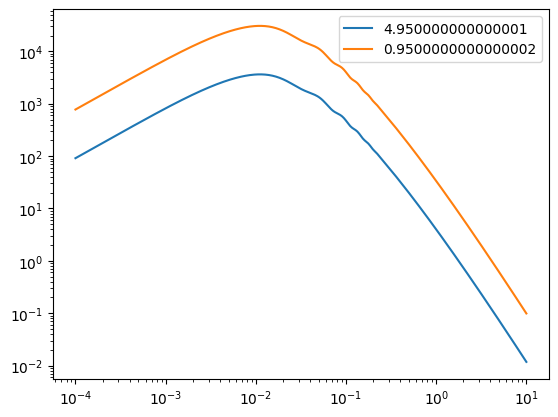

In [ ]:
plt.loglog(consts.Plin['k'], consts.Plin['pk'][50], label = consts.Plin['z'][50])
plt.loglog(consts.Plin['k'], consts.Plin['pk'][10], label = consts.Plin['z'][10])
plt.legend(loc = 'best')

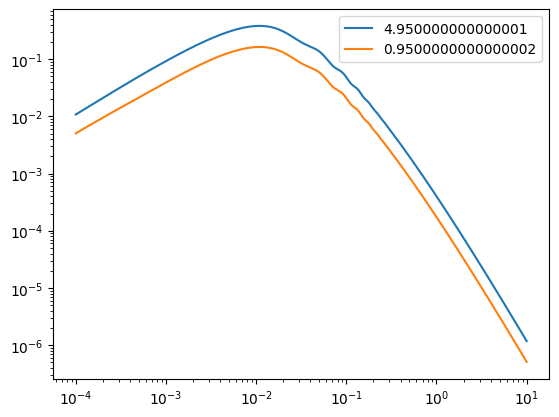

In [ ]:
plt.loglog(consts.Plin['k'], tst[0,:,50], label = consts.Plin['z'][50])
plt.loglog(consts.Plin['k'], tst[0,:,10], label = consts.Plin['z'][10])
plt.legend(loc = 'best')

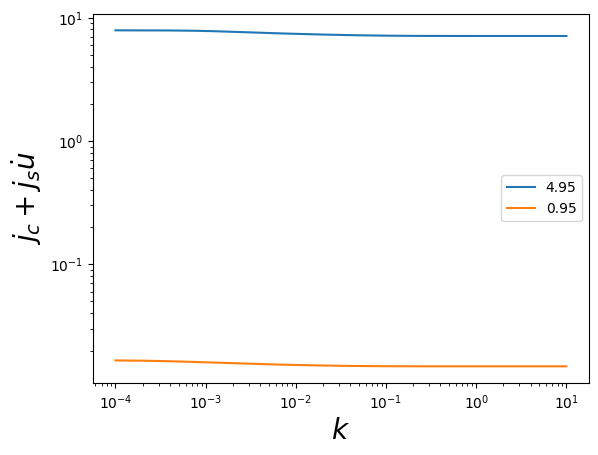

In [ ]:
plt.loglog(consts.Plin['k'], tstcib[0,:,50], label = np.round(consts.Plin['z'][50],2))
plt.loglog(consts.Plin['k'], tstcib[0,:,10], label = np.round(consts.Plin['z'][10],2))
plt.ylabel(r"$j_c + j_s \dot u$", fontsize = 20)
plt.xlabel(r"$k$", fontsize = 20)
plt.legend(loc = 'best')

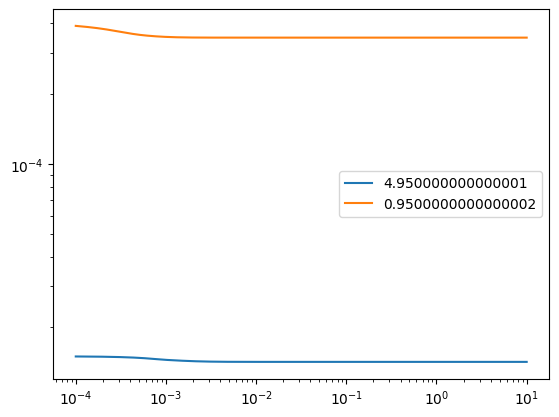

In [ ]:
plt.loglog(consts.Plin['k'], tstg[:,50], label = consts.Plin['z'][50])
plt.loglog(consts.Plin['k'], tstg[:,10], label = consts.Plin['z'][10])
plt.legend(loc = 'best')

In [ ]:
tstg.shape

(500, 103)

In [ ]:
tstcib.shape

(6, 500, 103)

In [ ]:
consts.Plin['k'].max()

10000000000.0

In [ ]:
tst

0

In [ ]:
import precalc as pc

In [ ]:
consts.Hz_over_c_times_chi2

<Quantity [0.00000000e+00, 4.82262251e-09, 5.92497648e-10, 2.37200943e-10,
           1.35156089e-10, 9.15772236e-11, 6.87833433e-11, 5.52972832e-11,
           4.66342731e-11, 4.07366119e-11, 3.65472020e-11, 3.34752634e-11,
           3.11683381e-11, 2.94048794e-11, 2.80395486e-11, 2.69735432e-11,
           2.61376380e-11, 2.54820586e-11, 2.49702033e-11, 2.45746214e-11,
           2.42743645e-11, 2.40531969e-11, 2.38983599e-11, 2.37997012e-11,
           2.37490503e-11, 2.37397639e-11, 2.37663893e-11, 2.38244123e-11,
           2.39100657e-11, 2.40201828e-11, 2.41520832e-11, 2.43034838e-11,
           2.44724285e-11, 2.46572322e-11, 2.48564354e-11, 2.50687683e-11,
           2.52931207e-11, 2.55285181e-11, 2.57741013e-11, 2.60291102e-11,
           2.62928698e-11, 2.65647782e-11, 2.68442978e-11, 2.71309460e-11,
           2.74242890e-11, 2.77239352e-11, 2.80295305e-11, 2.83407539e-11,
           2.86573134e-11, 2.89789429e-11, 2.93053994e-11, 2.96364605e-11,
           2.99719221e-11

In [ ]:
consts.Plin['z'].shape

(103,)

In [ ]:
import precalc as pc

In [ ]:
pc.halo_biases.shape

(100, 103)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from astropy.cosmology import Planck18 as planck
import astropy.cosmology.units as cu
import astropy.units as u

In [ ]:
import numpy as np

In [ ]:
strfig = "allcomponents_lognormal_sigevol_1p5zcutoff_nolens_onlyautoshotpar_no3000_gaussian600n857n1200_planck_spire_hmflog10.txt"
cibres = "data/one_halo_bestfit_"+strfig

In [ ]:
sar = np.loadtxt(cibres)[4:8, 0]  # 217, 353, 545, 857

In [ ]:
freq = np.array([100., 143., 217., 353., 545., 857.])

In [ ]:
nfreq = len(freq)

In [ ]:
ell = np.arange(100, 2000)
nl = len(ell)
nl

1900

In [ ]:
shotcib = np.zeros((nfreq, nl))
shotcib.shape

(6, 1900)

In [ ]:
sa = np.array([1.3*0.116689509208305475, 1.3*0.8714424869942087, 14., 357., 2349., 7407.])
sa[2:] = sar

In [ ]:
for i in range(nfreq):
    shotcib[i,:] = sa[i]

In [ ]:
r_l = 1.0 # FIXME: line 333 of run_driver ?
shotgal = 4.618165243131944e-08*np.ones_like(ell)
crossshot = r_l*np.sqrt(shotcib*shotgal)

In [ ]:
import matplotlib.pyplot as plt

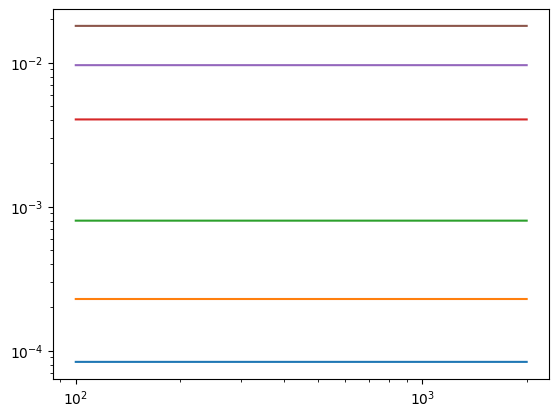

In [ ]:
for i in range(6):
    plt.loglog(ell, crossshot[i])

In [ ]:
tmpM = 100 * u.Msun * cu.littleh**-1
tmpM

<Quantity 100. solMass / littleh>

In [ ]:
tmpM.to(u.Msun, cu.with_H0(planck.H0))

<Quantity 147.79781259 solMass>

In [ ]:
tmpM2 = 100 * u.Msun
tmpM2

<Quantity 100. solMass>

In [ ]:
tmpM2.to(u.Msun * cu.littleh**-1, cu.with_H0(planck.H0))

<Quantity 67.66 solMass / littleh>

In [ ]:
mean_density0 = (planck.Om0*planck.critical_density0).to(u.Msun/u.Mpc**3)
mean_density0

<Quantity 3.93431748e+10 solMass / Mpc3>

In [ ]:
mean_density0.to((u.Msun * cu.littleh**-1)/(u.Mpc * cu.littleh)**3,
                 cu.with_H0(planck.H0))

<Quantity 8.24512751e+09 solMass / (littleh4 Mpc3)>

In [ ]:
tmpvol = 1 * (u.Mpc * cu.littleh**-1)**3
tmpvol

<Quantity 1. Mpc3 / littleh3>

In [ ]:
density = 1/tmpvol

In [ ]:
density.to(u.Mpc**(-3), cu.with_H0(planck.H0))

<Quantity 0.30973906 1 / Mpc3>

In [ ]:
density

<Quantity 1. littleh3 / Mpc3>

In [ ]:
1 * planck.h**3

0.30973906309599997

In [ ]:
100/planck.h

147.79781259237365

In [ ]:
0.49 * planck.h

0.331534

In [ ]:
cu.littleh

Unit("littleh")

In [ ]:
planck.H0

<Quantity 67.66 km / (Mpc s)>

In [ ]:
planck.h

0.6766

In [ ]:
import pickle

In [ ]:
with open('data/gal/dndz_extended.p', 'rb') as handle:
    dndz = pickle.load(handle)

In [ ]:
with open('data/plin_unit_h.p', 'rb') as handle:
    Plin = pickle.load(handle)

In [ ]:
Plin.keys()

dict_keys(['z', 'kh', 'pkh'])

In [ ]:
dndz['dndz'].mean(axis = 0)

array([0.0301039 , 0.1185164 , 0.09135664, 0.05454295, 0.04795344,
       0.0347682 , 0.13196637, 0.65681441, 1.32650456, 1.55739618,
       1.23017891, 1.0662644 , 0.95300988, 0.82665647, 0.65179378,
       0.42128632, 0.20873498, 0.1293551 , 0.08514541, 0.05797201,
       0.0403514 , 0.0285305 , 0.02041203, 0.01473959, 0.01072362,
       0.00785054, 0.00577756, 0.00427125, 0.00317014, 0.0023611 ])

In [ ]:
dndz['zrange']

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [ ]:
Plin['z']

array([ 0.  ,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95,  1.05,  1.15,  1.25,  1.35,  1.45,  1.55,  1.65,
        1.75,  1.85,  1.95,  2.05,  2.15,  2.25,  2.35,  2.45,  2.55,
        2.65,  2.75,  2.85,  2.95,  3.05,  3.15,  3.25,  3.35,  3.45,
        3.55,  3.65,  3.75,  3.85,  3.95,  4.05,  4.15,  4.25,  4.35,
        4.45,  4.55,  4.65,  4.75,  4.85,  4.95,  5.05,  5.15,  5.25,
        5.35,  5.45,  5.55,  5.65,  5.75,  5.85,  5.95,  6.05,  6.15,
        6.25,  6.35,  6.45,  6.55,  6.65,  6.75,  6.85,  6.95,  7.05,
        7.15,  7.25,  7.35,  7.45,  7.55,  7.65,  7.75,  7.85,  7.95,
        8.05,  8.15,  8.25,  8.35,  8.45,  8.55,  8.65,  8.75,  8.85,
        8.95,  9.05,  9.15,  9.25,  9.35,  9.45,  9.55,  9.65,  9.75,
        9.85,  9.95, 10.05, 10.15])

In [ ]:
Plin['z'][1:31]

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [ ]:
dndz['zrange']

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [ ]:
# Create a new matrix initialized to zero
new_matrix = np.zeros_like(Plin['z'])  # Shape (N,)

# Populate the new matrix with values from the vector
for i, z in enumerate(Plin['z']):
    if np.round(z,2) in np.round(dndz['zrange'],2):
        index = np.where(np.round(dndz['zrange'],2) == np.round(z,2))[0][0]  # Find the index of the corresponding redshift
        new_matrix[i] = dndz['dndz'].mean(axis = 0)[index]  # Assign the corresponding value from the vector

# new_matrix now contains values from values_vector where available, and 0s elsewhere
print(new_matrix)

[0.         0.0301039  0.1185164  0.09135664 0.05454295 0.04795344
 0.0347682  0.13196637 0.65681441 1.32650456 1.55739618 1.23017891
 1.0662644  0.95300988 0.82665647 0.65179378 0.42128632 0.20873498
 0.1293551  0.08514541 0.05797201 0.0403514  0.0285305  0.02041203
 0.01473959 0.01072362 0.00785054 0.00577756 0.00427125 0.00317014
 0.0023611  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.  

In [ ]:
new_matrix[1:31]

array([0.0301039 , 0.1185164 , 0.09135664, 0.05454295, 0.04795344,
       0.0347682 , 0.13196637, 0.65681441, 1.32650456, 1.55739618,
       1.23017891, 1.0662644 , 0.95300988, 0.82665647, 0.65179378,
       0.42128632, 0.20873498, 0.1293551 , 0.08514541, 0.05797201,
       0.0403514 , 0.0285305 , 0.02041203, 0.01473959, 0.01072362,
       0.00785054, 0.00577756, 0.00427125, 0.00317014, 0.0023611 ])

In [ ]:
dndz['dndz'].mean(axis = 0)

array([0.0301039 , 0.1185164 , 0.09135664, 0.05454295, 0.04795344,
       0.0347682 , 0.13196637, 0.65681441, 1.32650456, 1.55739618,
       1.23017891, 1.0662644 , 0.95300988, 0.82665647, 0.65179378,
       0.42128632, 0.20873498, 0.1293551 , 0.08514541, 0.05797201,
       0.0403514 , 0.0285305 , 0.02041203, 0.01473959, 0.01072362,
       0.00785054, 0.00577756, 0.00427125, 0.00317014, 0.0023611 ])

In [ ]:
np.interp(Plin['z'], dndz['zrange'], dndz['dndz'].mean(axis=0),
          left=0, right=0)

array([0.        , 0.0301039 , 0.1185164 , 0.09135664, 0.05454295,
       0.04795344, 0.0347682 , 0.13196637, 0.65681441, 1.32650456,
       1.55739618, 1.23017891, 1.0662644 , 0.95300988, 0.82665647,
       0.65179378, 0.42128632, 0.20873498, 0.1293551 , 0.08514541,
       0.05797201, 0.0403514 , 0.0285305 , 0.02041203, 0.01473959,
       0.01072362, 0.00785054, 0.00577756, 0.00427125, 0.00317014,
       0.0023611 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
import matplotlib.pyplot as plt

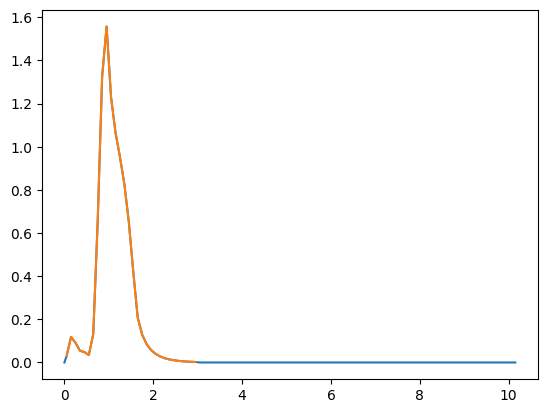

In [ ]:
plt.plot(Plin['z'], new_matrix)
plt.plot(dndz['zrange'], dndz['dndz'].mean(axis=0))

In [ ]:
np.diff(Plin['z'])

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.

In [ ]:
tst = np.interp(Plin['z'], dndz['zrange'], dndz['dndz'].mean(axis=0),
          left = 0, right = 0)

(0.0, 1.6)

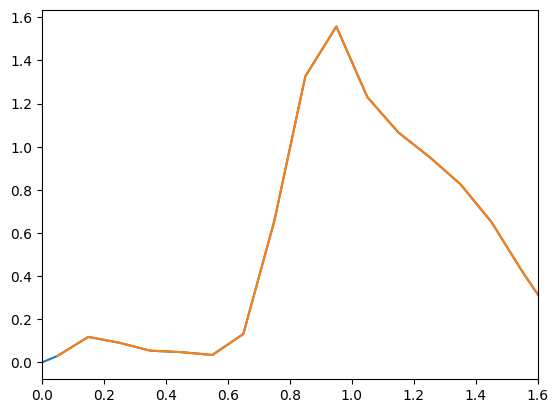

In [ ]:
plt.plot(Plin['z'], tst)
plt.plot(dndz['zrange'], dndz['dndz'].mean(axis=0))
plt.xlim([0,1.6])

In [ ]:
plt.plot()

array([0.  , 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95,
       1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05,
       2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [ ]:
dndz['zrange']

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
       2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [ ]:
Plin['z']

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

In [ ]:
Plin['z'].shape

(205,)

In [ ]:
new_matrix[new_matrix > 0

15

In [ ]:
dndz['zrange'].shape

(30,)

In [ ]:
dndz['dndz'].mean(axis = 0)

array([0.0301039 , 0.1185164 , 0.09135664, 0.05454295, 0.04795344,
       0.0347682 , 0.13196637, 0.65681441, 1.32650456, 1.55739618,
       1.23017891, 1.0662644 , 0.95300988, 0.82665647, 0.65179378,
       0.42128632, 0.20873498, 0.1293551 , 0.08514541, 0.05797201,
       0.0403514 , 0.0285305 , 0.02041203, 0.01473959, 0.01072362,
       0.00785054, 0.00577756, 0.00427125, 0.00317014, 0.0023611 ])

In [ ]:
import cib
import consts
#import precalculation as pc
import matplotlib.pyplot as plt
import numpy as np

/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
import halo as h
import precalc as pc
import powerspectra as ps

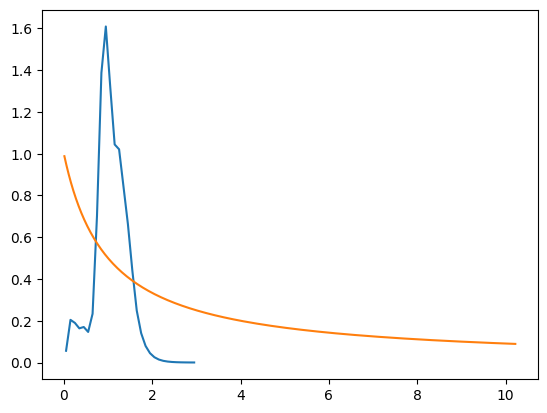

In [ ]:
plt.plot(consts.dict_gal['ELG']['z'], ps.get_W_gal(1))
plt.plot(consts.redshifts_M23, pc.W_cib)

In [ ]:
pc.halo_biases

array([[0.68821276, 0.70285002, 0.71933944, ..., 1.80957559, 1.88230014,
        1.95741236],
       [0.68821314, 0.70285042, 0.71933987, ..., 1.80957621, 1.88230077,
        1.95741299],
       [0.68821364, 0.70285094, 0.71934041, ..., 1.80957702, 1.88230158,
        1.95741381],
       ...,
       [0.86418302, 0.88962707, 0.9164973 , ..., 2.10819616, 2.18258097,
        2.25932211],
       [0.9041224 , 0.93275604, 0.96293466, ..., 2.1958882 , 2.27074151,
        2.34793373],
       [0.95062763, 0.98280736, 1.01671583, ..., 2.30930771, 2.38484348,
        2.46268205]])

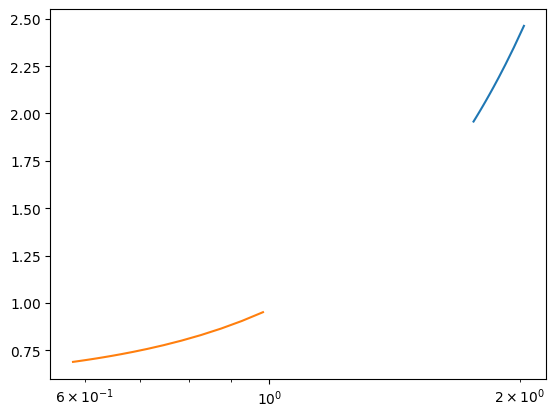

In [ ]:
plt.semilogx(pc.nu200[:,-1], pc.halo_biases[:,-1])
plt.semilogx(pc.nu200[:,0], pc.halo_biases[:,0])

In [ ]:
pc.dlnpk_dlnk.shape

(50, 30)

In [ ]:
prof_params = np.array([0.58, 6.14, 0.67]) #fexp, tau, lambda_NFW

In [ ]:
tst = h.uprof_mixed(prof_params = prof_params,
              rho_crit= consts.rho_crit_ELG,
              rad = pc.rad200,
              dlnpk_dlnk=pc.dlnpk_dlnk)

In [ ]:
tst.shape

(400, 50, 30)

In [ ]:
power.shape

(30, 400)

In [ ]:
np.diff(power, axis = 1).shape

(30, 399)

In [ ]:
denom = (np.log(kk[-1]) - np.log(kk[-2]))

In [ ]:
num = (np.log(power[:,-1]) - np.log(power[:,-2]))

In [ ]:
num/denom

array([-2.48538278, -2.48538147, -2.48538229, -2.48538201, -2.48538099,
       -2.48538069, -2.48538107, -2.48538114, -2.48538171, -2.48538153,
       -2.4853801 , -2.48537963, -2.48538117, -2.48538031, -2.48537986,
       -2.48538042, -2.4853792 , -2.48537991, -2.48537995, -2.48537986,
       -2.48538036, -2.4853796 , -2.48538011, -2.48538022, -2.48538113,
       -2.48537932, -2.48537977, -2.48538012, -2.48538083, -2.48538116])

In [ ]:
from astropy.cosmology import Planck18 as planck
import astropy.units as u

In [ ]:
z = consts.dict_gal['ELG']['z']
Mh = consts.Mh

In [ ]:
rho_crit = (planck.critical_density(z)).to(u.Msun/u.Mpc**3)
rho_crit

<Quantity [1.33284779e+11, 1.47646838e+11, 1.64737575e+11, 1.84794418e+11,
           2.08054820e+11, 2.34756255e+11, 2.65136226e+11, 2.99432255e+11,
           3.37881893e+11, 3.80722712e+11, 4.28192310e+11, 4.80528310e+11,
           5.37968356e+11, 6.00750121e+11, 6.69111300e+11, 7.43289611e+11,
           8.23522798e+11, 9.10048631e+11, 1.00310490e+12, 1.10292943e+12,
           1.20976005e+12, 1.32383464e+12, 1.44539107e+12, 1.57466728e+12,
           1.71190120e+12, 1.85733079e+12, 2.01119404e+12, 2.17372896e+12,
           2.34517360e+12, 2.52576601e+12] solMass / Mpc3>

In [ ]:
tst = 3 * (Mh[:, np.newaxis] * u.Msun)/(4 * np.pi * rho_crit[np.newaxis, :])
tst.shape

(50, 30)

In [ ]:
(planck.Om0*planck.critical_density0).to(u.Msun/u.Mpc**3)

<Quantity 3.93431748e+10 solMass / Mpc3>

Develop $S_{\rm eff}$ for model `M23`

In [ ]:
from astropy.io import fits
from scipy.interpolate import interp1d
import numpy as np
import consts

In [ ]:
# import Abhi's prepared Planck file
snuaddr = 'data/filtered_snu_planck.fits'
hdulist = fits.open(snuaddr)

In [ ]:
wavelengths = np.loadtxt('data/TXT_TABLES_2015/EffectiveSED_B15_z0.012.txt')[:, [0]]
redshifts = hdulist[1].data
snu_eff = hdulist[0].data[:-1, :]  # in Jy/Lsun  # -1 because we are
# not considering the 3000 GHz channel which comes from IRAS
hdulist.close()

In [ ]:
snu_eff.shape

(6, 210)

In [ ]:
redshifts.shape

(210,)

In [ ]:
seff_interp_func = interp1d(redshifts, snu_eff, kind='linear',
                            bounds_error=False, fill_value=0.)

In [ ]:
z = consts.dict_gal['ELG']['z']

In [ ]:
seff_interp_func(z).shape

(6, 30)

In [ ]:
tst3_int, tst3 = cib.Seff(params = (1.7, 24.4, 0.36), model = 'Y23')

1.2888578409581448
(6, 210)
(210,)
1.636061476332589e+24


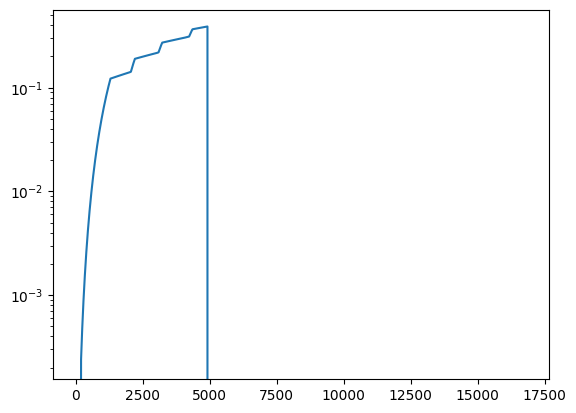

In [ ]:
plt.semilogy(tst3_int[0])

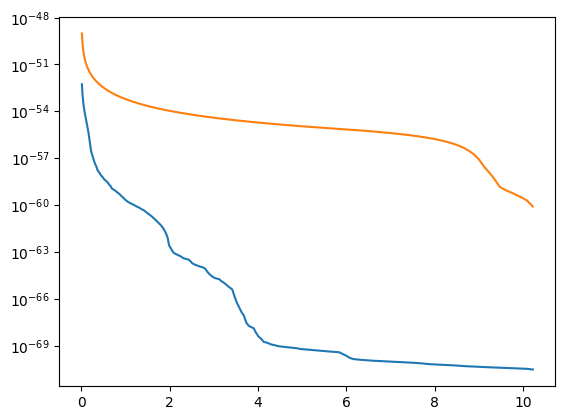

In [ ]:
plt.semilogy(consts.redshifts_M23, tst3[0])
plt.semilogy(consts.redshifts_M23, tst3[-1])

In [ ]:
consts.snu_eff_M23_ELG_z_bins/1e26

array([[7.65523362e-41, 8.79027211e-42, 3.39645567e-42, 1.86592719e-42,
        1.23863535e-42, 9.08139604e-43, 7.13800869e-43, 5.84251013e-43,
        5.01038771e-43, 4.40924413e-43, 3.94020568e-43, 3.58072222e-43,
        3.32708303e-43, 3.11592421e-43, 2.91031083e-43, 2.74531010e-43,
        2.63359713e-43, 2.53921358e-43, 2.43772204e-43, 2.33709160e-43,
        2.27356797e-43, 2.22482435e-43, 2.16057429e-43, 2.10140617e-43,
        2.07406362e-43, 2.03340786e-43, 1.99612875e-43, 1.97411053e-43,
        1.94125302e-43, 1.92814761e-43],
       [1.41284894e-40, 1.75324835e-41, 7.21855807e-42, 4.18345173e-42,
        2.90500473e-42, 2.20966151e-42, 1.78793700e-42, 1.50036871e-42,
        1.31499375e-42, 1.17775222e-42, 1.06713026e-42, 9.81537736e-43,
        9.21733324e-43, 8.70757982e-43, 8.18745883e-43, 7.76796295e-43,
        7.49176831e-43, 7.25616360e-43, 6.99143181e-43, 6.72796796e-43,
        6.56730987e-43, 6.44809416e-43, 6.28305147e-43, 6.13216634e-43,
        6.07107710e-43,

Convolve $S_{\rm eff}$ with Planck filters

In [ ]:
from astropy.cosmology import Planck18 as planck
import astropy.units as u
from scipy import constants as spconst

In [ ]:
from scipy.integrate import simpson
import matplotlib.pyplot as plt

In [ ]:
planck_nu_list = consts.nu_list
ghz = consts.ghz
z_cib_planck = consts.redshifts_M23

In [ ]:
# convolution function part 
seff_convolved = np.empty((len(planck_nu_list), len(z_cib_planck))) 

In [ ]:
planck_nu_list = (planck_nu_list/ghz).astype(int)

In [ ]:
filtfreq = {}
filter_response = {}

for i in range(len(planck_nu_list)):
    # read in filter curves
    filter_str_name = str(planck_nu_list[i])
    fname = f'data/filters/HFI__avg_{filter_str_name}_CMB_noise_avg_Apod5_Sfull_v302_HNETnorm.dat'
    filtarray = np.loadtxt(fname, usecols=(1,2))
    
    filter_response_curve = filtarray[:,1] # response curve 
    filtfreq[i] = filtarray[:,0] * ghz # convert to Hz 
    
    area = simpson(y=filter_response_curve, x=filtfreq[i]) # area under filter
    filter_response[i] = filter_response_curve/area # normalize by area

In [ ]:
filter_response_curve

array([3.81460344e-07, 3.81468726e-07, 3.81493873e-07, ...,
       3.04315334e-17, 4.15348135e-17, 4.50687905e-17])

In [ ]:
filter_response[i]

array([1.73139836e-18, 1.73143640e-18, 1.73155054e-18, ...,
       1.38124730e-28, 1.88521059e-28, 2.04561316e-28])

(50000000000.0, 2000000000000.0)

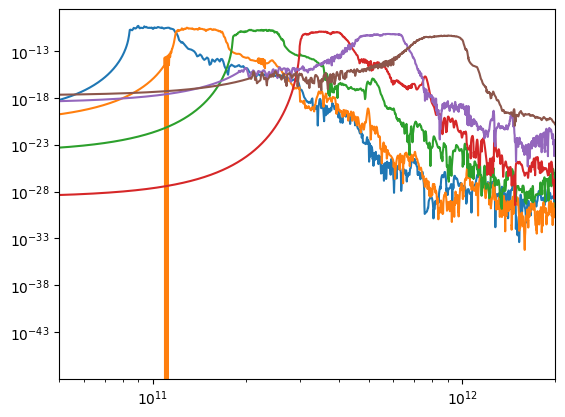

In [ ]:
# this is from Planck

for k in filtfreq:
    plt.loglog(filtfreq[k], filter_response[k])
plt.xlim([5e10,2e12])

In [ ]:
import cib

In [ ]:
tst = cib.Seff(params = (1.7, 20000, 0.36), model = 'Y23')
tst.shape

(10000, 210)

In [ ]:
tst_func = lambda z_idx: interp_slice(consts.nu_primes[:,z_idx[0]], 
                                               tst[:, z_idx[0]])

In [ ]:
np.arange(consts.nu_primes.shape[1]).reshape(-1,1).shape

(210, 1)

In [ ]:
tst_func(np.array([5]))

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
tst_interp = np.apply_along_axis(tst_func, axis = 1,
                    arr=
                    )

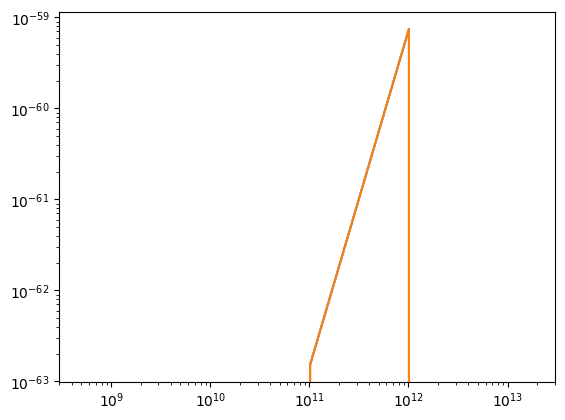

In [ ]:
plt.loglog(filtfreq[0], 
           interp_slice(consts.nu_primes[:,0], tst[:,0]))
plt.loglog(filtfreq[0], tst_interp[0])

In [ ]:
tst_interp.shape

(210, 12297)

In [ ]:
filtfreq[0].shape

(12297,)

In [ ]:
consts.nu_primes.shape

(10000, 210)

In [ ]:
tst.shape

(10000, 210)

In [ ]:
intsnu=np.interp(filtfreq[0], 
                 consts.nu_primes[:,0],
                 tst[:,0])

In [ ]:
tnu_snu = filter_response[0] * intsnu # weight by filter response 
snu_eff15_filt = np.trapz(tnu_snu, filtfreq[0])

In [ ]:
simpson(y= tst_interp, x=filtfreq[0],axis=1)

array([1.61710378e-48, 4.51844059e-49, 2.01726379e-49, 1.15621005e-49,
       7.58130795e-50, 5.29609185e-50, 4.01808720e-50, 3.17601652e-50,
       2.53871505e-50, 2.09664776e-50, 1.77840615e-50, 1.52376160e-50,
       1.33110144e-50, 1.16732468e-50, 1.04072219e-50, 9.37372922e-51,
       8.51960360e-51, 7.74654452e-51, 7.08074393e-51, 6.55363065e-51,
       6.06977173e-51, 5.70043667e-51, 5.33501976e-51, 5.01616721e-51,
       4.70208815e-51, 4.45767111e-51, 4.22686264e-51, 4.03435307e-51,
       3.86373466e-51, 3.67680489e-51, 3.54179330e-51, 3.40895708e-51,
       3.28157134e-51, 3.15652633e-51, 3.06239049e-51, 2.96245268e-51,
       2.87670514e-51, 2.79399393e-51, 2.71866292e-51, 2.64989551e-51,
       2.58699255e-51, 2.52628306e-51, 2.46375368e-51, 2.42004960e-51,
       2.37352011e-51, 2.32438550e-51, 2.28962518e-51, 2.25191061e-51,
       2.21144171e-51, 2.18568468e-51, 2.15525292e-51, 2.12746485e-51,
       2.10209372e-51, 2.07893447e-51, 2.05173269e-51, 2.03267249e-51,
      

In [ ]:
tnu_snu.shape

(12297,)

In [ ]:
consts.nu_primes[:,-1]/consts.ghz

array([ 1122.        ,  1123.00990099,  1124.01980198, ...,
       11217.98019802, 11218.99009901, 11220.        ])

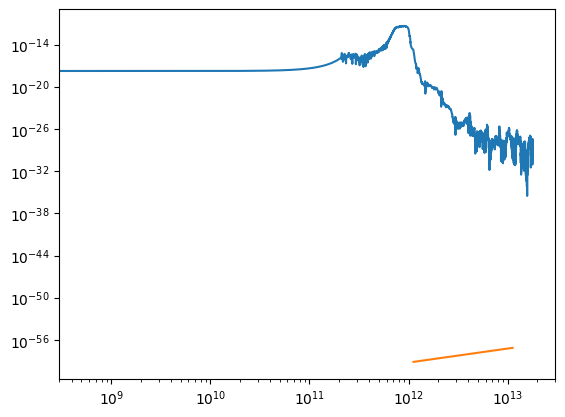

In [ ]:
# plt.loglog(filtfreq[0], intsnu)
plt.loglog(filtfreq[5], filter_response[5])
plt.loglog(consts.nu_primes[:,-1],
                 tst[:,-1])

In [ ]:
seff_m23 = consts.snu_eff_M23_ELG_z_bins

In [ ]:
seff_m23[-1]

array([2.80495789e-12, 3.56598211e-13, 1.47542176e-13, 8.44541050e-14,
       5.70172355e-14, 4.17551155e-14, 3.23998576e-14, 2.59808442e-14,
       2.16517728e-14, 1.84690055e-14, 1.60316319e-14, 1.41274555e-14,
       1.26089967e-14, 1.12848013e-14, 1.00863120e-14, 9.06098958e-15,
       8.20635742e-15, 7.47314889e-15, 6.82241132e-15, 6.21874517e-15,
       5.71498132e-15, 5.29765804e-15, 4.90542079e-15, 4.54864697e-15,
       4.26197457e-15, 3.97500679e-15, 3.72571893e-15, 3.51076771e-15,
       3.28642177e-15, 3.11072880e-15])

Test `Theta`

In [ ]:
nu_primes = consts.nu_primes
z = consts.dict_gal['ELG']['z']
beta = 1.7
T0 = 24.4
alpha = 0.36
dgamma = 1.7

In [ ]:
theta = np.zeros_like(nu_primes) # shape (nu, z)
theta.shape

(6, 30)

Text(0, 0.5, 'Dust Temp')

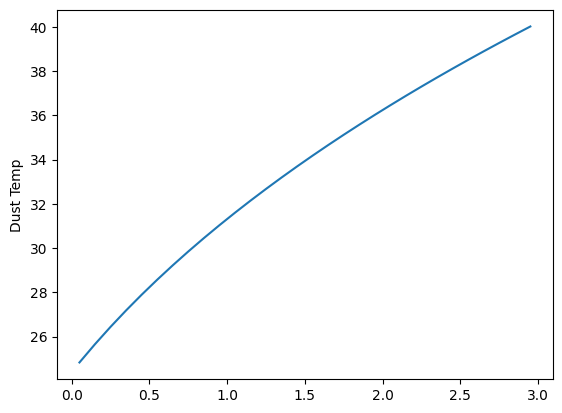

In [ ]:
Td = cib.Tdust(T0, alpha)
plt.plot(z, Td)
plt.ylabel("Dust Temp")

Text(0, 0.5, 'Pivot frequency')

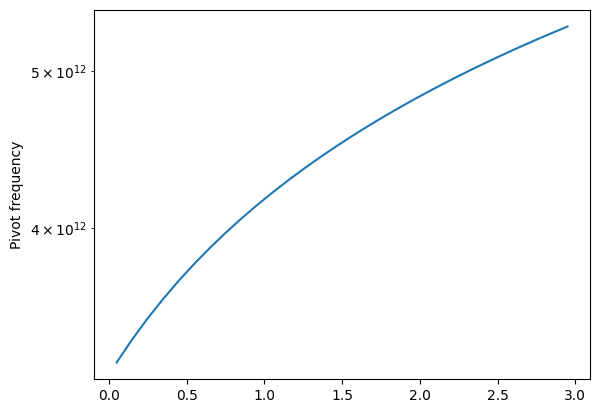

In [ ]:
nu0z = cib.nu0_z(beta, Td)
plt.semilogy(z, nu0z)
plt.ylabel("Pivot frequency")

In [ ]:
def prenu0(beta, Td, nu):
    """
    Returns the gray-body part of the SED.
    """
    
    res = nu**beta * cib.B_nu(nu, Td)
    
    return res 
    
def postnu0(gamma, nu):
    """
    Returns the exponential decay part of the SED.
    """
    
    res = nu**(-gamma)
    
    return res

In [ ]:
flag = nu_primes < nu0z[np.newaxis, :]
flag.shape

(6, 30)

In [ ]:
theta = np.where(flag, 
                     prenu0(beta, Td, nu_primes), 
                     postnu0(dgamma, nu_primes))

In [ ]:
theta.shape

(6, 30)

In [ ]:
tst = theta/(nu0z[np.newaxis, :]**beta * cib.B_nu(nu0z[np.newaxis, :], Td))

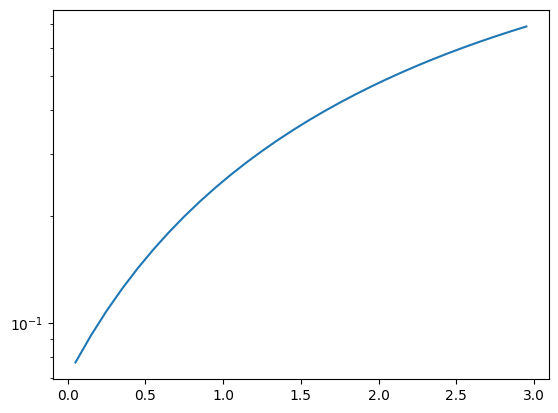

In [ ]:
plt.semilogy(z, tst[4])

In [ ]:
theta/(nu0z[np.newaxis, :]**beta * cib.B_nu(nu0z[np.newaxis, :], Td))

In [ ]:
tst = np.where(flag, 
         theta/prenu0(beta, Td, nu0z[np.newaxis, :]),
         theta/postnu0(dgamma, nu0z[np.newaxis, :]))

In [ ]:
tst.shape

(6, 30)

In [ ]:
tst.shape

(6, 30)

In [ ]:
def Theta(params):
    """
    Returns the modified SED for gray-body function 
    normalized to 1 at pivot freq.
    
    From 2.27 of 2310.10848.
    
    theta(nu') = nu'^beta * B_nu' (T) for n < nu0
               = nu'^(-gamma) for n >= nu0
    
    Args:
        params: (beta, T0, alpha)
            beta: controls "grayness" of blackbody function
            T0, alpha: dust parameters

    """
    
    beta, T0, alpha = params
    theta = np.zeros_like(nu_primes) # shape (nu, z)
    Td = Tdust(T0, alpha)
    nu0z = nu0_z(beta, Td)
    
    # decide which frequencies fall in the first category
    flag = nu_primes < nu0z[np.newaxis, :]
    
    # calculate SED
    theta[flag] = nu_primes[flag]**beta * B_nu(nu_primes[flag], Td)
    theta[~flag] = nu_primes[~flag]**(-dgamma)
    
    # normalize SED such that theta(nu0) = 1
    theta[flag] = theta[flag]/(nu0z[np.newaxis, :]**beta * B_nu(nu0z[np.newaxis, :], Td))
    theta[~flag] = theta[~flag]/nu0z[np.newaxis, :]**(-dgamma)
    
    return theta

In [ ]:
ms = consts.ms

In [ ]:
Mh = consts.Mh
Mhc = consts.Mhc

In [ ]:
bar_sub = consts.BAR(ms, consts.dict_gal['ELG']['z'])

In [ ]:
z = consts.dict_gal['ELG']['z']

In [ ]:
Mhc_re = np.expand_dims(Mhc, axis = 0)
Mhc_re.shape

(1, 50)

In [ ]:
tst = ms/Mhc_re

In [ ]:
tst.shape

(100, 50)

In [ ]:
etamax = 0.49
mu_peak0 = 11.51
mu_peakp = -0.02
sigma_M0 = 2.74
tau = 0.5
zc = 2.15

In [ ]:
option1 = cib.SFR(etamax, mu_peak0, mu_peakp, 
                      sigma_M0, tau, zc,
                      is_sub = True)
option1.shape

(100, 50, 30)

In [ ]:
tstsfr = cib.SFR(etamax, mu_peak0, mu_peakp, 
                                  sigma_M0, tau, zc,
                                  is_sub = True)
tstsfr.shape

(100, 50, 30)

In [ ]:
tst_shmf = 0.3 * tst**(-0.7) * np.exp(-9.9 * tst**2.5)

In [ ]:
tst_shmf.shape

(100, 50)

In [ ]:
        for i in range(len(self.mh)):
            ms = self.msub(self.mh[i]*(1-fsub))
            dlnmsub = np.log10(ms[1] / ms[0])
            sfrI = self.sfr(ms)  # dim(len(ms), len(z))
            sfrII = self.sfr(self.mh[i]*(1-fsub))*ms[:, None]/(self.mh[i]*(1-fsub))
            # sfrII = sfrmh[i] * ms / mh[i]
            sfrsub = np.zeros((len(ms), len(self.z)))
            for j in range(len(ms)):
                sfrsub[j, :] = np.minimum(sfrI[j, :], sfrII[j, :])
            integral = self.subhmf(self.mh[i], ms)[:, None]*sfrsub / KC
            intgn = intg.simps(integral, dx=dlnmsub, axis=0)
            a[:, i, :] = snu*(1 + self.z)*intgn *\
                self.cosmo.comoving_distance(self.z).value**2
        return a


In [ ]:
idx = 13
l1 = tstsfr[:,idx,:]
l2 = np.log10(ms[:,idx][1]/ms[:,idx][0])
print(l1.shape)
print(l2)

(100, 30)
0.030908756278880567


In [ ]:
l10 = l1 * tst_shmf[:,idx][:,None]
l10.shape

(100, 30)

In [ ]:
l11 = simpson(l10, dx = l2, axis = 0)
l11.shape

(30,)

In [ ]:
integrand = tstsfr * np.expand_dims(tst_shmf, 
                                    axis = -1)
integrand.shape

(100, 50, 30)

In [ ]:
from scipy.integrate import simpson

In [ ]:
res = simpson(y=integrand, 
              x=np.expand_dims(np.log10(ms), axis = -1),
              axis = 0)

In [ ]:
Mh.shape

(50,)

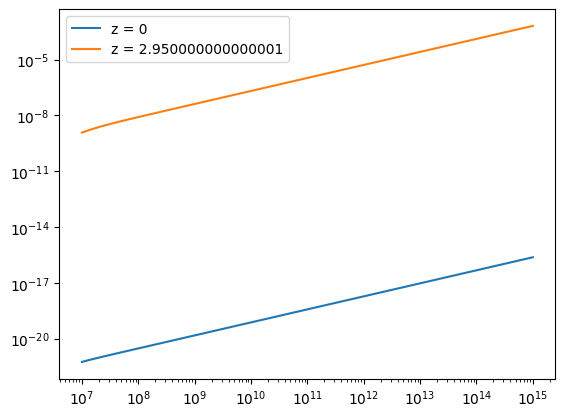

In [ ]:
plt.loglog(Mh, res[:,0], label = 'z = 0')
plt.loglog(Mh, res[:,-1], label = f'z = {z[-1]}')
plt.legend(loc = 'best')

In [ ]:
integrand.shape

(100, 50, 30)

In [ ]:
np.log10(ms).shape

(100, 50)

In [ ]:
np.log10(ms[:,10][11]/ms[:,10][10])

0.025961322760018352

Test `eta`

In [ ]:
# eta
tst = cib.eta(0.49, 11.51, -0.02, 2.74, 0.5, 2.15)

In [ ]:
tst.shape

(50, 30)

In [ ]:
Mh = consts.Mh
etamax = 0.49
mu_peak0 = 11.51
mu_peakp = -0.02
sigma_M0 = 2.74
tau = 0.5
zc = 2.15

Text(0, 0.5, 'Mpeak')

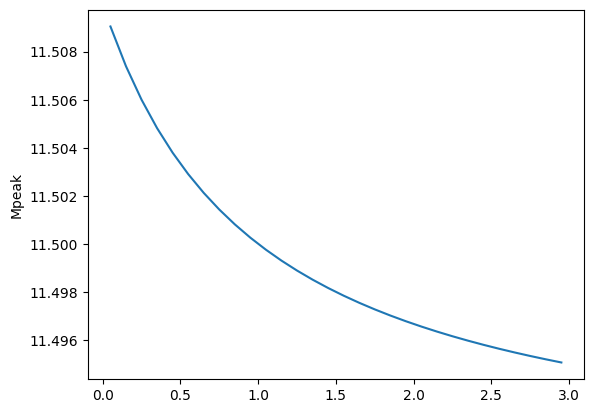

In [ ]:
Mpeak = mu_peak0 + mu_peakp * z/(1+z) # M_peak may change with z 
plt.plot(z, Mpeak)
plt.ylabel("Mpeak")

Text(0, 0.5, 'sigmaM')

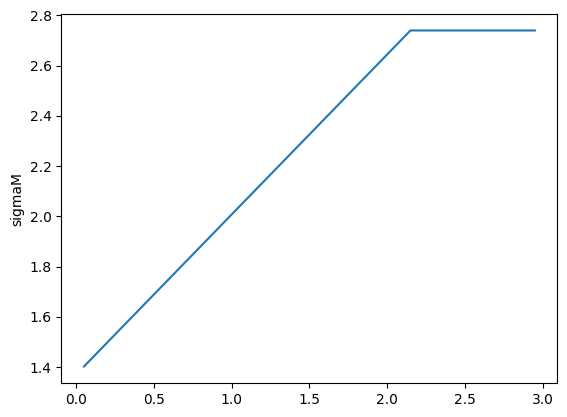

In [ ]:
sigmaM = np.where(Mh[11] < Mpeak, sigma_M0, 
                  sigma_M0 * (1 - tau/zc * np.maximum(0, zc - z)))
plt.plot(z, sigmaM)
plt.ylabel("sigmaM")

Text(0, 0.5, 'eta')

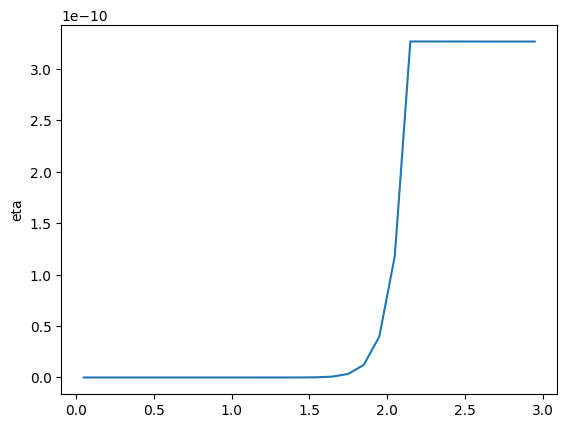

In [ ]:
eta_val = etamax * np.exp(-0.5 * ((np.log(Mh[11]) - np.log(Mpeak))/sigmaM)**2)
plt.plot(z, eta_val)
plt.ylabel("eta")

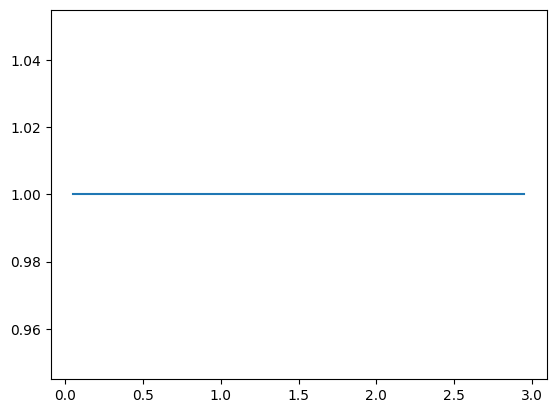

In [ ]:
plt.plot(z, eta_val/tst[11])

In [ ]:
eta_val/tst[11]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Test `SFR`

In [ ]:
tst = cib.SFR(0.49, 11.51, -0.02, 2.74, 0.5, 2.15)

In [ ]:
tst.shape

(50, 30)

In [ ]:
bar = consts.bar
bar.shape

(50, 30)

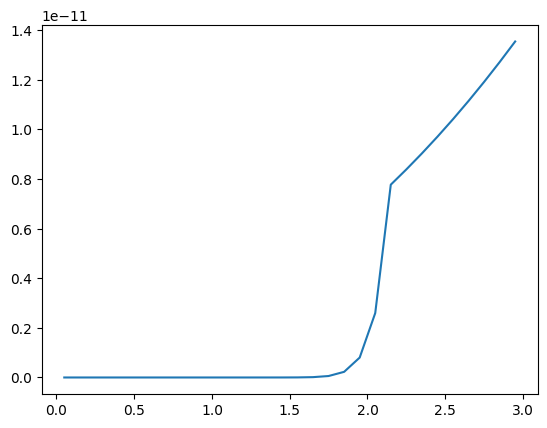

In [ ]:
tst_manual = bar[11] * eta_val
plt.plot(z, tst_manual)

In [ ]:
tst_manual/tst[11]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Test `SFR`

In [ ]:
tst = cib.SFR(etamax, mu_peak0, mu_peakp,
          sigma_M0, tau, zc, is_sub=False)

In [ ]:
tst.shape

(50, 30)

In [ ]:
bar = pc.bar

In [ ]:
bar.shape

(50, 30)

In [ ]:
np.maximum(5, 2)

5

In [ ]:
# Sigma
tst = cib.Sigma(1.81, 12.25, 0.55)

In [ ]:
sigma_M0 = 1.81
mu_peak0 = 12.25
mu_peakp = 0.55

M_peak = mu_peak0 + mu_peakp * z/(1+z) # M_peak may change with z 

In [ ]:
prefact = consts.Mh[13]/np.sqrt(2 * np.pi * sigma_M0**2)

In [ ]:
prefact * np.exp(expterm) - tst[13]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Test passed. 

In [ ]:
# Sigma satellite
tst = cib.Sigmas(1.81, 12.25, 0.55)

Text(0.5, 0, 'z')

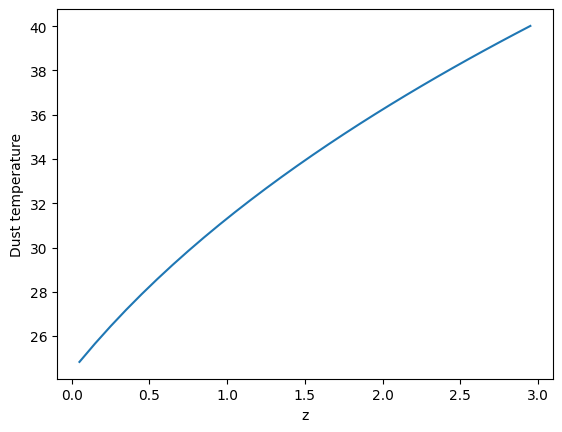

In [ ]:
# dust temperature 
Td = cib.Tdust(z)
plt.plot(z, Td)
plt.ylabel("Dust temperature")
plt.xlabel("z")

In [ ]:
#nu_list = np.array([100, 143, 217, 353, 545, 857, 3000]) * 1e9  
nu_list = np.logspace(7,15,1000)

In [ ]:
# planck function (nu, z)
Bnu_all = cib.B_nu(nu_list, Td)

/Users/tkarim/Documents/research/cib.nosync/cib.py:63: RuntimeWarning: overflow encountered in exp
  res = prefact[:,np.newaxis]/(np.exp(x) - 1)


(1e-24, 1e-11)

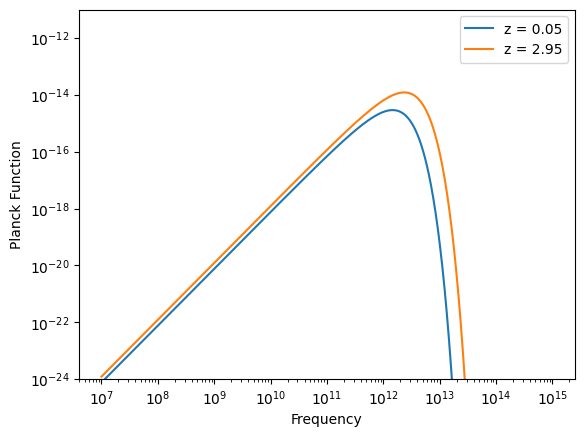

In [ ]:
plt.loglog(nu_list, Bnu_all.T[0], label = f'z = {z[0]}')
plt.loglog(nu_list, Bnu_all.T[-1], label = f'z = {np.round(z[-1],2)}')
plt.legend(loc = 'best')
plt.xlabel("Frequency")
plt.ylabel("Planck Function")
plt.ylim([10e-25, 10e-12])

In [ ]:
# modified planck function 
mod_Bnu_all = cib.mod_blackbody(Bnu_all, nu_list)

(1e-24, 1000000000000000.0)

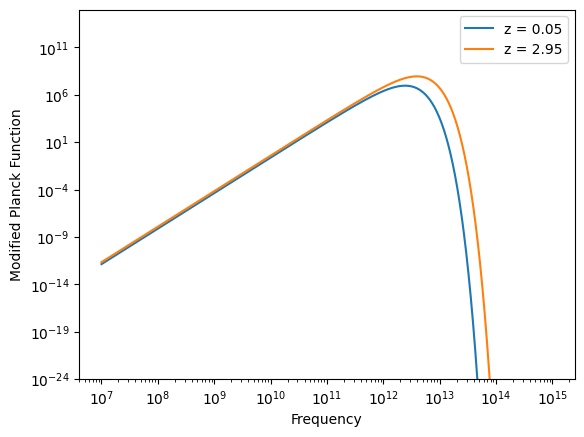

In [ ]:
plt.loglog(nu_list, mod_Bnu_all.T[0], label = f'z = {z[0]}')
plt.loglog(nu_list, mod_Bnu_all.T[-1], label = f'z = {np.round(z[-1],2)}')
plt.legend(loc = 'best')
plt.xlabel("Frequency")
plt.ylabel("Modified Planck Function")
plt.ylim([10e-25, 10e14])

In [ ]:
# pivot frequencies
tmpnu0 = cib.nu0_z(Td)

(1e-24, 10000000000000.0)

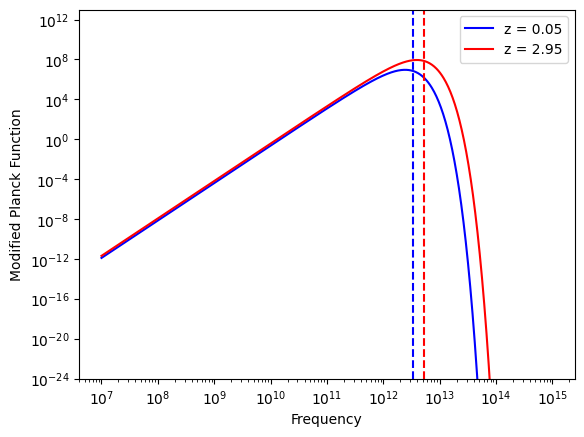

In [ ]:
plt.loglog(nu_list, mod_Bnu_all.T[0], label = f'z = {z[0]}', c = 'b')
plt.axvline(tmpnu0[0], ls = '--', c = 'b')
plt.loglog(nu_list, mod_Bnu_all.T[-1], label = f'z = {np.round(z[-1],2)}', c = 'r')
plt.axvline(tmpnu0[-1], ls = '--', c = 'r')
plt.legend(loc = 'best')
plt.xlabel("Frequency")
plt.ylabel("Modified Planck Function")
plt.ylim([10e-25, 10e12])

In [ ]:
tmpbnu = np.diag(cib.B_nu(tmpnu0, Td))

In [ ]:
tmpbnu

array([8.72459118e-16, 9.62530079e-16, 1.05323057e-15, 1.14451401e-15,
       1.23634047e-15, 1.32867535e-15, 1.42148834e-15, 1.51475270e-15,
       1.60844461e-15, 1.70254274e-15, 1.79702787e-15, 1.89188258e-15,
       1.98709103e-15, 2.08263870e-15, 2.17851229e-15, 2.27469953e-15,
       2.37118908e-15, 2.46797043e-15, 2.56503380e-15, 2.66237005e-15,
       2.75997068e-15, 2.85782770e-15, 2.95593359e-15, 3.05428131e-15,
       3.15286420e-15, 3.25167599e-15, 3.35071073e-15, 3.44996280e-15,
       3.54942685e-15, 3.64909782e-15])

In [ ]:
tmp_modbnu = np.diag(cib.mod_blackbody(tmpbnu, tmpnu0))

In [ ]:
# theta
tmp_theta = cib.Theta(mod_Bnu_all, tmp_modbnu)

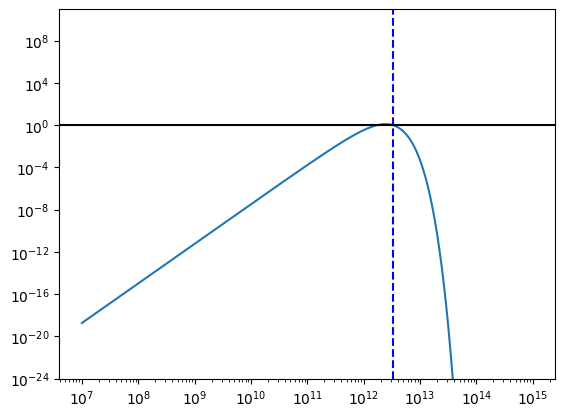

In [ ]:
plt.loglog(nu_list, tmp_theta.T[0])
plt.ylim([10e-25, 10e10])
plt.axvline(tmpnu0[0], ls = '--', c = 'b')
plt.axhline(1, c = 'k')

In [ ]:
tstt = mod_Bnu_all/tmp_modbnu
tstt.shape

(1000, 30)

In [ ]:
tmpnu0

array([3.33204508e+12, 3.44297559e+12, 3.54789147e+12, 3.64756364e+12,
       3.74261542e+12, 3.83355883e+12, 3.92082033e+12, 4.00475930e+12,
       4.08568183e+12, 4.16385101e+12, 4.23949484e+12, 4.31281239e+12,
       4.38397862e+12, 4.45314823e+12, 4.52045876e+12, 4.58603311e+12,
       4.64998162e+12, 4.71240373e+12, 4.77338947e+12, 4.83302061e+12,
       4.89137167e+12, 4.94851078e+12, 5.00450043e+12, 5.05939808e+12,
       5.11325669e+12, 5.16612522e+12, 5.21804899e+12, 5.26907011e+12,
       5.31922773e+12, 5.36855833e+12])

In [ ]:
mod_Bnu_all.T.shape

(30, 1000)

In [ ]:
from copy import deepcopy
tst2 = deepcopy(mod_Bnu_all.T[0])
tst2.shape

(1000,)

In [ ]:
tst2[nu_list >= tmpnu0[0]] = nu_list[nu_list >= tmpnu0[0]]**(-1 * 1.7)

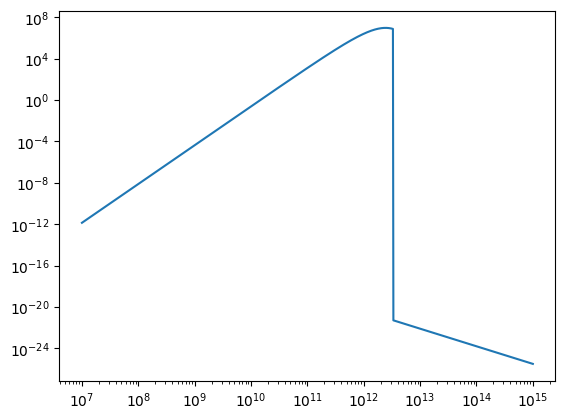

In [ ]:
plt.loglog(nu_list, tst2)

In [ ]:
nu_list[nu_list >= tmpnu0[0]]**(-1.7)

array([5.08869717e-22, 4.93165847e-22, 4.77946603e-22, 4.63197030e-22,
       4.48902632e-22, 4.35049364e-22, 4.21623612e-22, 4.08612183e-22,
       3.96002290e-22, 3.83781543e-22, 3.71937931e-22, 3.60459816e-22,
       3.49335920e-22, 3.38555310e-22, 3.28107393e-22, 3.17981902e-22,
       3.08168886e-22, 2.98658703e-22, 2.89442007e-22, 2.80509741e-22,
       2.71853128e-22, 2.63463660e-22, 2.55333094e-22, 2.47453439e-22,
       2.39816953e-22, 2.32416130e-22, 2.25243700e-22, 2.18292613e-22,
       2.11556038e-22, 2.05027356e-22, 1.98700151e-22, 1.92568206e-22,
       1.86625494e-22, 1.80866176e-22, 1.75284593e-22, 1.69875258e-22,
       1.64632858e-22, 1.59552239e-22, 1.54628410e-22, 1.49856531e-22,
       1.45231914e-22, 1.40750015e-22, 1.36406427e-22, 1.32196885e-22,
       1.28117250e-22, 1.24163514e-22, 1.20331791e-22, 1.16618316e-22,
       1.13019441e-22, 1.09531627e-22, 1.06151449e-22, 1.02875584e-22,
       9.97008128e-23, 9.66240162e-23, 9.36421705e-23, 9.07523454e-23,
      

In [ ]:
tstt.shape

(1000, 30)

In [ ]:
from astropy.io import fits

In [ ]:
hdu = fits.open("data/filtered_snu_planck.fits")
wavelengths = np.loadtxt('data/TXT_TABLES_2015/EffectiveSED_B15_z0.012.txt')[:, [0]]

In [ ]:
hdu[0].data

array([[1.26552135e-13, 3.47169099e-14, 1.51488574e-14, ...,
        5.57081231e-17, 5.65057599e-17, 5.75917015e-17],
       [2.26060663e-13, 6.26579312e-14, 2.76262871e-14, ...,
        1.41497839e-16, 1.42573896e-16, 1.44361516e-16],
       [7.30234004e-13, 2.03957385e-13, 9.05777273e-14, ...,
        3.34219674e-16, 3.32484995e-16, 3.31770905e-16],
       ...,
       [1.24239228e-11, 3.47058399e-12, 1.54154448e-12, ...,
        3.45019143e-16, 3.32928027e-16, 3.22691994e-16],
       [4.41938982e-11, 1.23156925e-11, 5.45570863e-12, ...,
        1.24409126e-16, 1.16572211e-16, 1.09734988e-16],
       [2.14144690e-10, 5.75534734e-11, 2.45899325e-11, ...,
        9.38288598e-18, 9.46975216e-18, 9.09417234e-18]])

In [ ]:
redshifts = hdu[1].data
snu_eff = hdu[0].data  # in Jy/Lsun

In [ ]:
redshifts.shape

(210,)

In [ ]:
snu_eff.shape

(7, 210)

In [ ]:
snu_eff.T[0]

array([1.26552135e-13, 2.26060663e-13, 7.30234004e-13, 3.27709454e-12,
       1.24239228e-11, 4.41938982e-11, 2.14144690e-10])

In [ ]:
hdu[2].data

array([3.13921105e+10, 3.28716196e+10, 3.44208030e+10, 3.60430144e+10,
       3.77416455e+10, 3.95203728e+10, 4.13828769e+10, 4.33331924e+10,
       4.53754555e+10, 4.75139285e+10, 4.97531296e+10, 5.20979525e+10,
       5.45532468e+10, 5.71243253e+10, 5.98164873e+10, 6.26355343e+10,
       6.55874707e+10, 6.86784581e+10, 7.19152679e+10, 7.53044930e+10,
       7.88535328e+10, 8.25697117e+10, 8.64610520e+10, 9.05359081e+10,
       9.48026291e+10, 9.92706694e+10, 1.03949147e+11, 1.08848011e+11,
       1.13977827e+11, 1.19349358e+11, 1.24974449e+11, 1.30864020e+11,
       1.37031694e+11, 1.43489426e+11, 1.50252327e+11, 1.57333378e+11,
       1.64748287e+11, 1.72512636e+11, 1.80642483e+11, 1.89156634e+11,
       1.98071076e+11, 2.07405674e+11, 2.17181108e+11, 2.27415273e+11,
       2.38132746e+11, 2.49357425e+11, 2.61109139e+11, 2.73413521e+11,
       2.86299178e+11, 2.99792458e+11, 3.13921105e+11, 3.28715836e+11,
       3.44208030e+11, 3.60430144e+11, 3.77416455e+11, 3.95203728e+11,
      

In [ ]:
nu0min = 50.  # nucen-deltanu/2.
nu0max = 3000.  # nucen+deltanu/2.
steps = 20  # 2000 nu0max-nu0min+1  # nu0max-nu0min+1  # 200
nu0 = np.linspace(nu0min, nu0max, int(steps))

In [ ]:
import glob

In [ ]:
list_of_files = sorted(glob.glob('./data/TXT_TABLES_2015/./*.txt'))

In [ ]:
for i in range(len(list_of_files)):
    print(list_of_files[i][-9:-4])

0.012
0.023
0.035
0.047
0.059
0.072
0.084
0.096
0.109
0.122
0.135
0.148
0.161
0.175
0.189
0.202
0.216
0.230
0.245
0.259
0.274
0.288
0.303
0.318
0.334
0.349
0.365
0.380
0.396
0.413
0.429
0.445
0.462
0.479
0.496
0.514
0.531
0.549
0.567
0.585
0.603
0.622
0.641
0.660
0.679
0.698
0.718
0.738
0.758
0.778
0.799
0.820
0.841
0.862
0.884
0.905
0.928
0.950
0.972
0.995
1.018
1.042
1.065
1.089
1.113
1.138
1.163
1.188
1.213
1.239
1.265
1.291
1.317
1.344
1.371
1.399
1.427
1.455
1.483
1.512
1.541
1.570
1.600
1.630
1.661
1.692
1.723
1.754
1.786
1.818
1.851
1.884
1.917
1.951
1.985
0.092
0.220
2.020
2.055
2.090
2.126
2.162
2.199
2.236
2.273
2.311
2.350
2.388
2.428
2.467
2.508
2.548
2.589
2.631
2.673
2.715
2.758
2.802
2.846
2.890
2.936
2.981
3.027
3.074
3.121
3.169
3.217
3.266
3.315
3.365
3.416
3.467
3.519
3.571
3.624
3.677
3.732
3.786
3.842
3.898
3.955
4.012
4.070
4.129
4.188
4.248
4.309
4.370
4.433
4.495
4.559
4.623
4.689
4.754
4.821
4.888
4.957
5.026
5.095
5.166
5.237
5.310
5.383
5.457
5.531
5.607
5.68

In [ ]:
a = list_of_files[95] #FIXME: why 95 and 96
b = list_of_files[96]

for i in range(95, 208): #FIXME: why this range 
    list_of_files[i] = list_of_files[i+2]
list_of_files[208] = a
list_of_files[209] = b

In [ ]:
wavelengths = np.loadtxt('./data/TXT_TABLES_2015/EffectiveSED_B15_z0.012.txt')[:, [0]]

In [ ]:
freq = 300000/wavelengths # in km/s

In [ ]:
numerical_fac = 1.
freqhz = freq*1e3*1e6
freq *= numerical_fac

In [ ]:
np.size(wavelengths)

200

In [ ]:
len(wavelengths)

200

In [ ]:
dndz = pd.read_csv("data/gal/elg_fuji_pz_single_tomo.csv")
z = dndz['Redshift_mid'].values

freq_rest = freqhz*(1 + z)

In [ ]:
n = len(wavelengths) # number of wavelength bins 
n

200

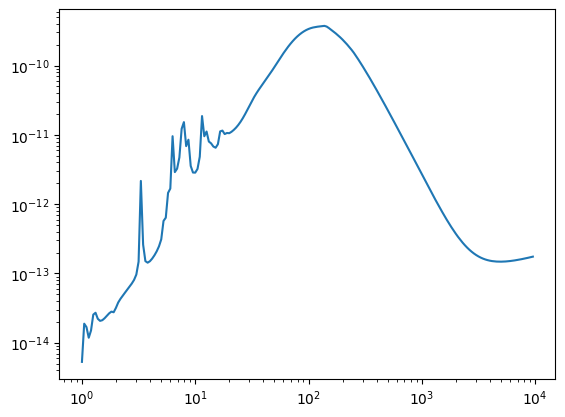

In [ ]:
tmp = np.loadtxt(list_of_files[0])
plt.loglog(tmp[:,0], tmp[:,1])

In [ ]:
snu_unfiltered = np.zeros([n, len(z)])

for i in range(len(list_of_files)):
    snu_unfiltered[:, i] = np.loadtxt(list_of_files[i])[:, 1]

IndexError: index 30 is out of bounds for axis 1 with size 30

In [ ]:
len(list_of_files)

210

In [ ]:
import consts

In [ ]:
import numpy as np
import gal_prop as gp
import precalculation as pc
import consts
import matplotlib.pyplot as plt

/Users/tkarim/Documents/research/cib.nosync/gal_prop.py:84: RuntimeWarning: invalid value encountered in power
  return As * power_term**alpha


In [ ]:
z = consts.dict_gal['ELG']['z']

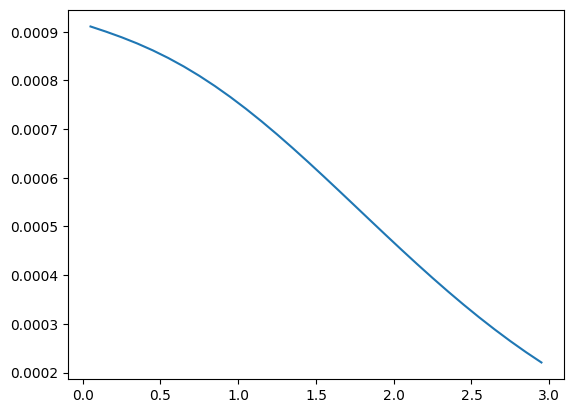

In [ ]:
plt.plot(z, pc.nbar_gal)

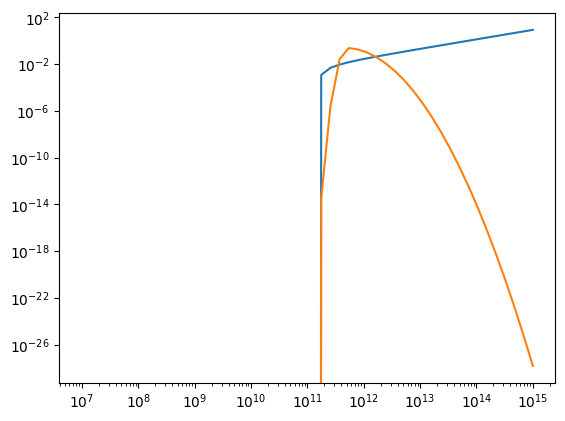

In [ ]:
plt.plot(pc.Mh, pc.Nsat)
plt.plot(pc.Mh, pc.Ncen)
plt.xscale("log")
plt.yscale("log")

/Users/tkarim/Documents/research/cib.nosync/gal_prop.py:83: RuntimeWarning: invalid value encountered in power
  return As * power_term**alpha


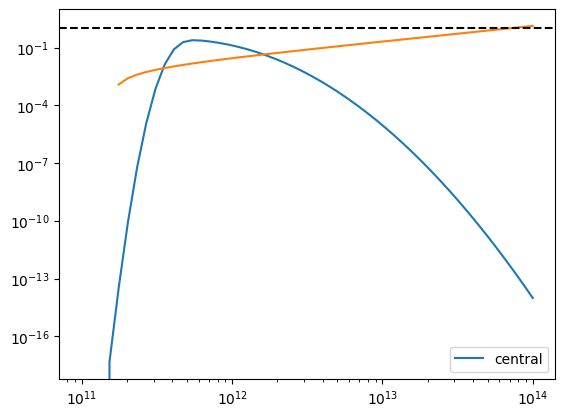

In [ ]:
plt.plot(Mh, gp.Ncen(Mh), label = 'central')
plt.plot(Mh, gp.Nsat(Mh))
plt.legend(loc = 'best')
plt.xscale("log")
plt.yscale("log")
plt.axhline(1, c = 'k', ls = '--')

In [ ]:
np.log10(Mh) - 11.83

array([-1.83      , -1.74836735, -1.66673469, -1.58510204, -1.50346939,
       -1.42183673, -1.34020408, -1.25857143, -1.17693878, -1.09530612,
       -1.01367347, -0.93204082, -0.85040816, -0.76877551, -0.68714286,
       -0.6055102 , -0.52387755, -0.4422449 , -0.36061224, -0.27897959,
       -0.19734694, -0.11571429, -0.03408163,  0.04755102,  0.12918367,
        0.21081633,  0.29244898,  0.37408163,  0.45571429,  0.53734694,
        0.61897959,  0.70061224,  0.7822449 ,  0.86387755,  0.9455102 ,
        1.02714286,  1.10877551,  1.19040816,  1.27204082,  1.35367347,
        1.43530612,  1.51693878,  1.59857143,  1.68020408,  1.76183673,
        1.84346939,  1.92510204,  2.00673469,  2.08836735,  2.17      ])

In [ ]:
import scipy.special as ss

In [ ]:
from colossus.lss import mass_function

In [ ]:
from colossus.cosmology import cosmology as cc

In [ ]:
cc.setCosmology('planck18')

In [ ]:
hmf = mass_function.massFunction(Mh,
                           ,
                           q_in='M',
                           q_out='dndlnM',
                           model='tinker08',
                           mdef='200m')

TypeError: unsupported operand type(s) for +: 'float' and 'list'

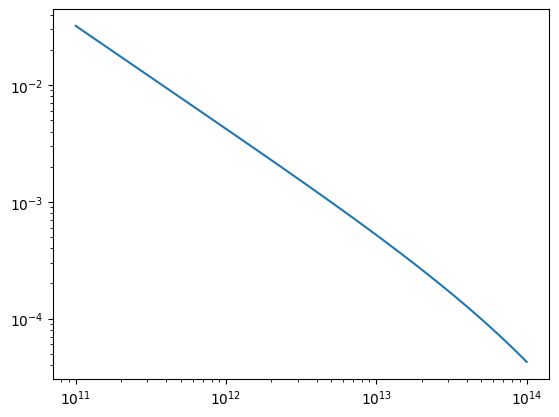

In [ ]:
plt.loglog(Mh, hmf)

# Test $C_{\nu \nu'}$

In [7]:
import consts
import powerspectra as ps
import halo
import gal 
import precalc as pc
import cib
import cosmology

## Compare with `DopplerCIB`

In [8]:
# Abhi's code 

import sys 
sys.path.append("/Users/tkarim/Documents/research/DopplerCIB")

In [9]:
import CIB_halo as mcib
import cosmo_related as mcosmo
import input_var_cibmean as minput
import Gal_halo as mgh
import CIBxGal_halo as mcg
import hmf_unfw_bias as mhmf_unfw

In [10]:
## initialize cosmo_var_iv and data_var_iv to pass to DopplerCIB

# setup relevant objects to pass to Abhi's code 

cosmo_var = mcosmo.cosmo_var_iv(mass=consts.Mh_Msol,
                                z=consts.Plin['z'],
                                do_powerspec=1)

# experimental specification 

cib_exp = 'Planck'
# color corrections for 100, 143, 217, 353, 545, 857 and 3000 GHz for Planck
cc_pl = np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995])  # , 0.960])
cc = cc_pl  

nu0 = np.array([100., 143., 217., 353., 545., 857.]) 
nus = ['100', '143', '217', '353', '545', '857']
# fwhm obtained from https://wiki.cosmos.esa.int/planckpla/index.php/Effective_Beams
fwhm = np.array([9.651, 7.248, 4.990, 4.818, 4.682, 4.325])  # in arcmin
fwhm_rad = fwhm*(np.pi/180.)/60.
# fwhm = 4.8  # 4.8 Planck arcmin # 0.5 CCAT-Prime
# 1303.5067 for sensitivity (Tab:4 muK deg & kJy/sr deg)
sensitivity_muKarcmin = np.array([108., 48., 60., 210., 1137., 29075.])
sensitivity_Jy2_sr = np.array([58., 26.929, 72., 305, 369., 369.])
sensitivity_Jy_sr = np.sqrt(sensitivity_Jy2_sr)
# sensitivity = 13.5  # 13.5 Planck Jy/sr  # 1.2 CCAT-Prime
ell = np.logspace(2, np.log10(2000), 99)
fc = np.ones(len(nu0))

strfig = "allcomponents_lognormal_sigevol_1p5zcutoff_nolens_onlyautoshotpar_no3000_gaussian600n857n1200_planck_spire_hmflog10.txt"
cibres = "/Users/tkarim/Documents/research/cib.nosync/data/one_halo_bestfit_"+strfig

exp = {'name': cib_exp,
          'do_cibmean': 0,
          'cc': cc,
          'fc': fc,
          'snuaddr': '/Users/tkarim/Documents/research/cib.nosync/data/filtered_snu_planck.fits',
          # 'nu0min': nu0min, 'nu0max': nu0max,
          # 'nucen': str(int(nucen)),
          'nu0': nu0,
          'ell': ell,
          'fwhm': fwhm,
          'sensitivity': sensitivity_Jy_sr,
          'cibpar_resfile': cibres,
          'nu_string': nus}

## initialize data_var_iv 
data_var_iv = minput.data_var_iv(exp = exp)

## initialize CIBXGal_halo.py
mcibgal_obj_pk = mcg.CIBxgal(data_var_iv=data_var_iv,
                          cosmo_var_iv=cosmo_var,
                          gal_exp='DESI_ELG',
                          r_l=1)
mgal_obj = mgh.ProfHODMore15(data_var_iv, cosmo_var, gal_exp='DESI_ELG')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tkarim/Documents/research/cib.nosync/data/plin_unit_Mpc_DopplerCIB.p'

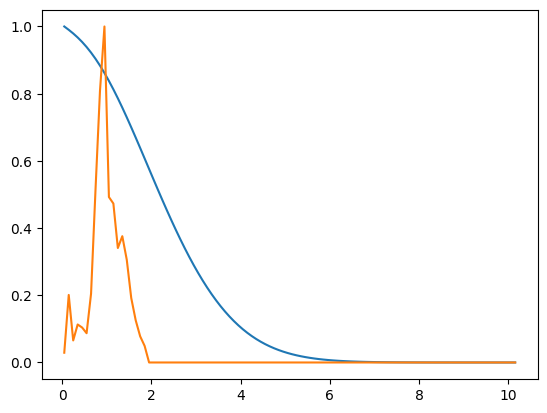

In [7]:
plt.plot(consts.Plin['z'], mgal_obj.nbargal()/mgal_obj.nbargal().max())
plt.plot(consts.Plin['z'], mgal_obj.dn_dz()(consts.Plin['z'])/mgal_obj.dn_dz()(consts.Plin['z']).max())

### Test $C_{gg}$

In [8]:
# Abhi's code
c2h_gal_m21, geo2h = mgal_obj.cl2h_gal()

In [205]:
# My code
uprof_k25 = halo.nfwfourier_u(lambda_NFW=1, 
                          rad200=pc.rad200, 
                          c=pc.concentration, 
                          c_term=pc.concentration_amp) 

params_gal = (mgal_obj.gamma,mgal_obj.log10mc, #Ncen
              mgal_obj.sLog10m,mgal_obj.Ac, #Ncen
              mgal_obj.As, mgal_obj.m0, #Nsat
              mgal_obj.m1, mgal_obj.alpha_) #Nsat 

galterm_k25, ncen_k25, nsat_k25 = gal.galterm(params=params_gal,
                          u=uprof_k25,
                          gal_type='ELG')

In [207]:
tst_nbar = gal.nbargal_halo(ncen_k25, nsat_k25, ps.hmfzT)

In [209]:
tst_gg = ps.galcrossgal_cell_tot(1., galterm_k25,
                        tst_nbar, 
                        ncen_k25)

In [10]:
cell_2h_k25 = ps.galcrossgal_cell_2h(ncen_k25,
                                     nsat_k25,
                                     galterm_k25)

In [11]:
# Abhi's code
c1h_gal_m21, oneh = mgal_obj.cl1h_gal()

# my code
cell_1h_k25, geo_25 = ps.galcrossgal_cell_1h(ncen_k25,
                                     nsat_k25,
                                     galterm_k25)

In [12]:
c1h_gal_m21, geo1h = mgal_obj.cl1h_gal()

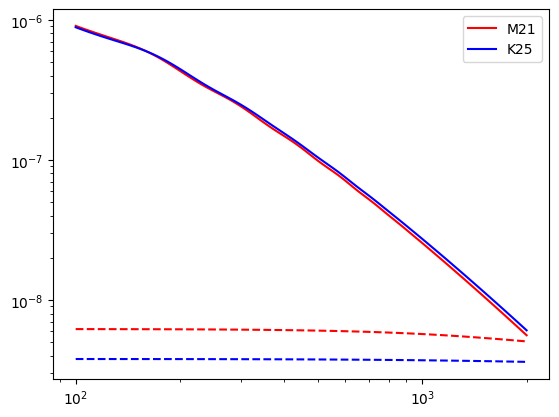

In [13]:
plt.loglog(consts.ell,c2h_gal_m21,label='M21',c='r')
plt.loglog(consts.ell,cell_2h_k25,label='K25',c='b')

plt.loglog(consts.ell,c1h_gal_m21,c='r',ls='--')
plt.loglog(consts.ell,cell_1h_k25,c='b',ls='--')

plt.legend(loc='best')

In [50]:
p2h_k25, int_k25 = ps.galcrossgal_pk_2h(ncen_k25, nsat_k25, 
                               galterm_k25)

p2h_m21, int_m21 = mgal_obj.p2h_gal(ucen=np.ones_like(mgal_obj.unfw),
                           unfw=mgal_obj.unfw,
                           power=consts.Pk_array_over_ell)


In [22]:
p1h_k25 = ps.galcrossgal_pk_1h(ncen_k25,
                               nsat_k25,
                               galterm_k25)

p1h_m21 = mgal_obj.p1h_gal(ucen=np.ones_like(mgal_obj.unfw),
                           unfw=mgal_obj.unfw)
                           

Text(0.5, 1.0, 'Gal-gal 1h')

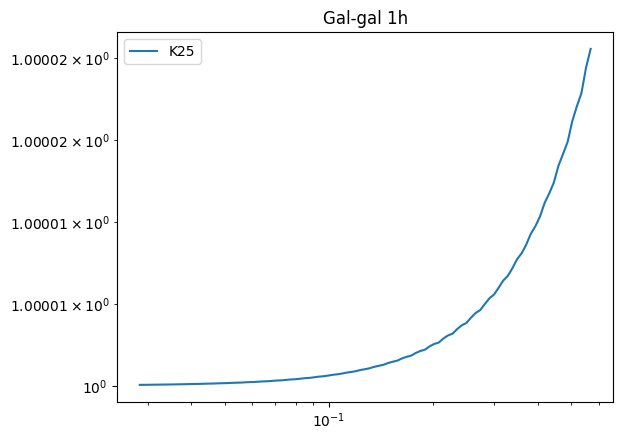

In [23]:
plt.loglog(consts.k_grid_over_ell[:,10], p1h_k25[:,10]/p1h_m21[:,10],
           label='K25')
# plt.loglog(consts.k_grid_over_ell[:,10], p1h_k25_r[:,10],
#            label='K25_r')
# plt.loglog(consts.k_grid_over_ell[:,10], p1h_m21[:,10],
#            label='M21')
plt.legend(loc='best')
plt.title("Gal-gal 1h")

### Test $C_{g-CIB}$

In [215]:
galterm_k25.shape

(99, 100, 102)

In [216]:
cibterm.shape

(6, 99, 100, 102)

In [227]:
hmalpha_gg_tst = np.ones(6)

(6, 1, 1)

In [235]:
tst_gcib = ps.cibcrossgal_cell_tot(hmalpha_gg_tst[:,np.newaxis,np.newaxis],
                                   galterm_k25,
                        cibterm, 
                        0.01*np.ones(6))

(6, 99, 102)
(6, 99, 102)


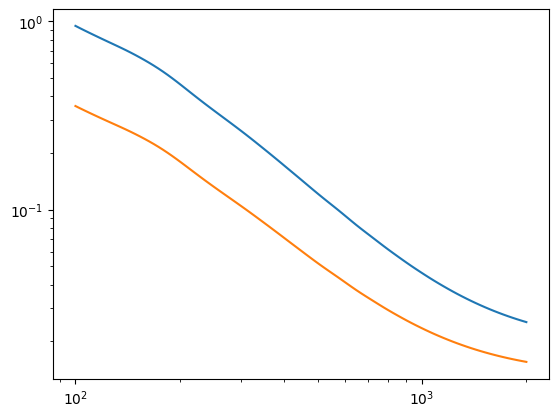

In [236]:
plt.loglog(consts.ell,tst_gcib[-1])
plt.loglog(consts.ell,tst_gcib[-2])

## test c_all

In [8]:
params_sfr = np.array([0.49, 11.52, -0.02, 2.74, 0.5, 2.15, 12.74, 0.4]) #etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM
params_gal = np.array([mgal_obj.gamma,mgal_obj.log10mc, #Ncen
              mgal_obj.sLog10m,mgal_obj.Ac, #Ncen
              mgal_obj.As, mgal_obj.m0, #Nsat
              mgal_obj.m1, mgal_obj.alpha_]) #Nsat 
params_u = np.array([0.5,1,1])

In [9]:
# 1: gg, 6: cross, 21: cibcib
params_hmalpha = np.ones(28)
params_shotnoise = np.ones(27)*.001

In [10]:
params_all = np.hstack((params_hmalpha,
                        params_shotnoise,
                        params_gal,
                        params_u,
                        params_sfr))
len(params_all)

74

In [11]:
#%%time 
tst_c_99 = ps.c_all(params_all,'M21',1024)

[1.44645709e-07 1.87936183e-03 2.63596510e-03 6.99976441e-03
 2.70922955e-02 9.47871153e-02 2.99497037e-01 5.65243981e-01
 1.18758344e+00 4.38812056e+00 1.90877550e+01 6.47012386e+01
 1.90817695e+02 2.60929238e+00 9.82126855e+00 4.25185488e+01
 1.40540480e+02 3.93353585e+02 3.72538353e+01 1.61105868e+02
 5.27326340e+02 1.44337717e+03 6.99613135e+02 2.30478246e+03
 6.34624880e+03 7.76020429e+03 2.21179331e+04 6.73243080e+04]


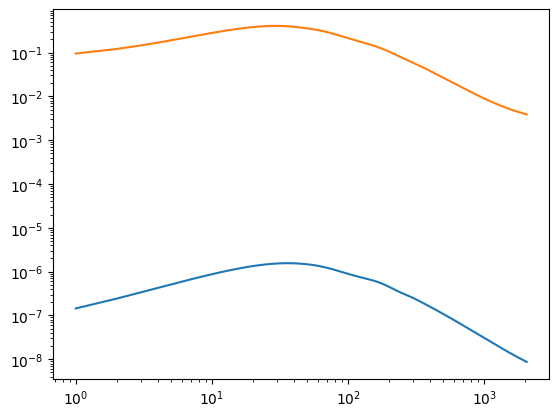

In [12]:
plt.loglog(ps.ell_range, tst_c_99[0])
plt.loglog(ps.ell_range, tst_c_99[5])

In [13]:
import pickle

freq = '545'
folder = '/Users/tkarim/Documents/research/cib.nosync/data/'
win_str = f'Win_lmax2048_wmax_4096_rongr_cib_{freq}GHz.pickle'
W = pickle.load(open(folder+'gal/' + win_str, "rb" ) )

In [15]:
M_gcib = W['cl'][('galaxy', 'kappa')][(0,0)]['M']

In [24]:
M_gcib = M_gcib[1:,1:] # trim ell = 0 since theory does not model it
M_gcib.shape

(2047, 2047)

In [25]:
tst_c_99.shape

(28, 2047)

In [26]:
pcl_g545_skylens = M_gcib @ tst_c_99[5]

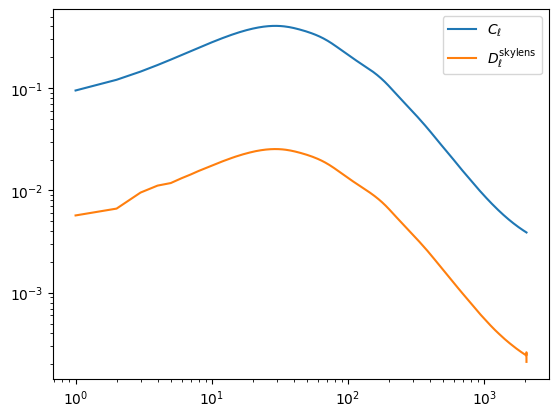

In [27]:
plt.loglog(ps.ell_range, tst_c_99[5], 
           label = r'$C_{\ell}$')
plt.loglog(ps.ell_range, pcl_g545_skylens, 
           label = r'$D_{\ell}^{\rm skylens}$')
plt.legend(loc='best')

In [14]:
# read masks 
#mask_elg = np.load("/Users/tkarim/Documents/research/cib.nosync/data/gal/mask_bool_dr9.npy")
mask_cib = pickle.load(open("/Users/tkarim/Documents/research/cib.nosync/data/cib/cibmasks_1024_eq_apodized.pkl", "rb"))[freq]

# read data
data_elg = np.load("/Users/tkarim/Documents/research/cib.nosync/data/gal/delta_elg_dr9_rongr.npy")
data_cib = pickle.load(open("data/cib/cibdata_1024_eq.pkl","rb"))[freq]

# elg mask #FIXME: temporary 
#mask_elg = hp.mask_good(data_elg)
mask_elg = np.load("/Users/tkarim/Documents/research/cib.nosync/data/gal/Wg_map_rongr.npy")

In [15]:
#mask_elg = np.where(mask_elg == hp.UNSEEN, 0, mask_elg)

In [32]:
import healpy as hp

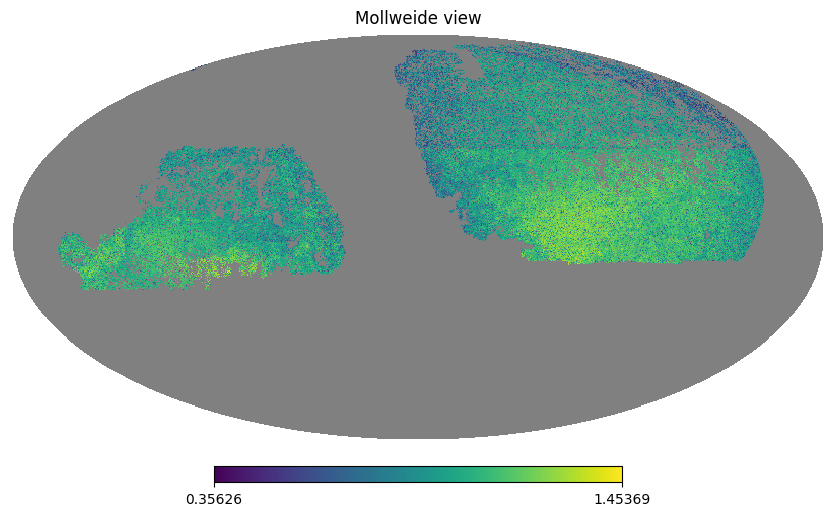

In [34]:
hp.mollview(mask_elg, rot = -85)

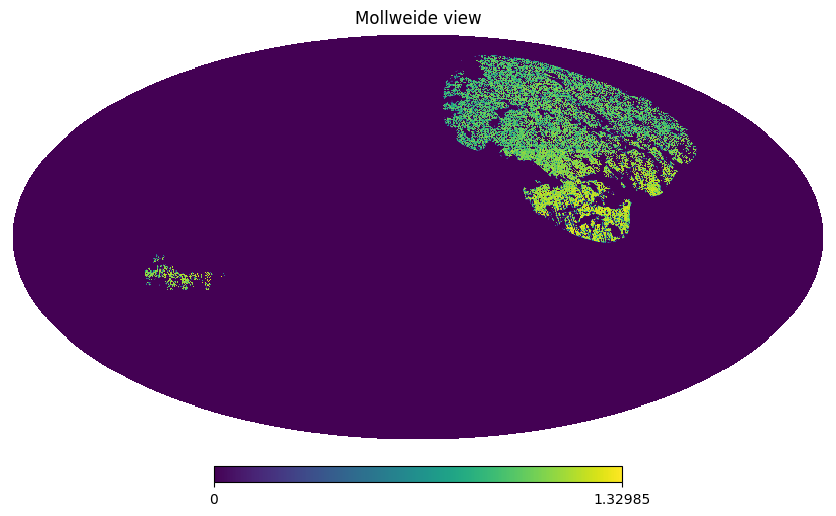

In [18]:
hp.mollview(mask_cib * mask_elg, rot = -85)

In [19]:
fsky = (mask_cib * mask_elg).sum()/len(mask_elg)

In [20]:
fsky

0.06279128719177171

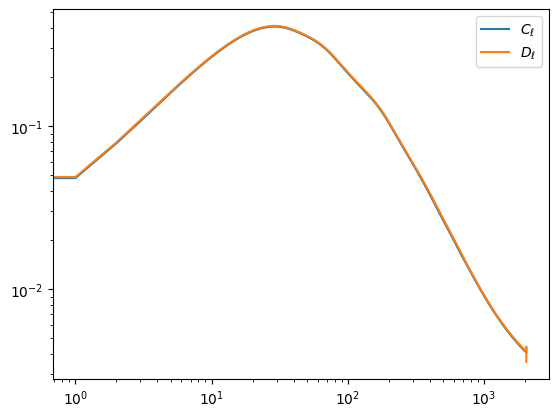

In [87]:
plt.loglog(ps.ell_range, tst_c_99[5], label = r'$C_{\ell}$')
plt.loglog(ps.ell_range, pcl_g545/fsky, label = r'$D_{\ell}$')
plt.legend(loc='best')

**Observation:** fsky calculation is off.

## Test with `NaMaster`

In [18]:
import pymaster as nmt
import pickle 
import healpy as hp

In [16]:
data_elg = np.load("/Users/tkarim/Documents/research/cib.nosync/data/gal/delta_elg_dr9_rongr.npy")
data_cib = pickle.load(open("data/cib/cibdata_1024_eq.pkl","rb"))[freq]

**Observation:** ELG mask has issues. This seems like the previous mask, not the final one we used. 

In [19]:
# convert elg data and maps so that UNSEEN is 0. 

data_elg[data_elg == hp.UNSEEN] = 0
mask_elg[mask_elg == hp.UNSEEN] = 0

In [20]:
# generat NaMaster fields 

felg = nmt.NmtField(mask_elg, [data_elg], n_iter=0)
f545 = nmt.NmtField(mask_cib, [data_cib], n_iter=0)

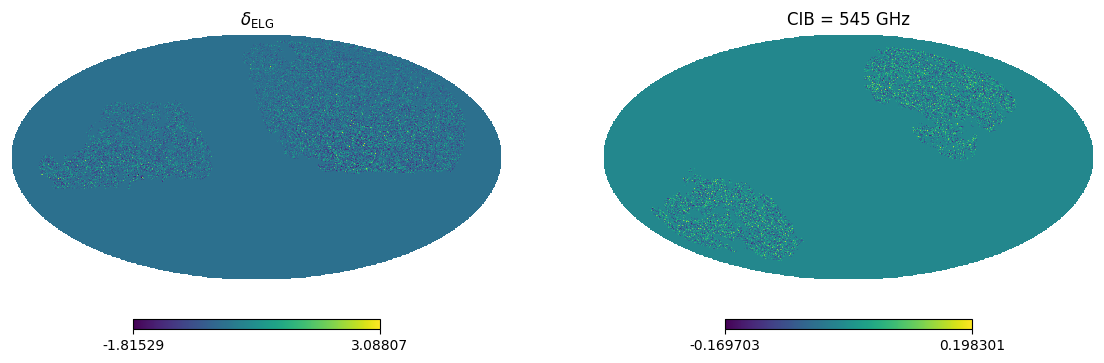

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

plt.axes(axes[0])
hp.mollview(felg.get_maps()[0], 
            title=r'$\delta_{\rm ELG}$', rot = -85,
            hold=True)

plt.axes(axes[1])
hp.mollview(f545.get_maps()[0], 
            title='CIB = 545 GHz', rot = -85,
            hold=True)

In [66]:
pcl_g545_nmt = nmt.compute_coupled_cell(felg, f545)[0][1:2048]
pcl_gg_nmt = nmt.compute_coupled_cell(felg, felg)[0]

In [149]:
delta_ell = 1
b = nmt.NmtBin.from_nside_linear(1024, nlb=delta_ell)

# Create a NaMaster workspaces for the different spin combinations
w00 = nmt.NmtWorkspace.from_fields(felg, f545, b)

# Extract the mode-coupling matrix
mcm00 = w00.get_coupling_matrix()

##### Compare $D_{\ell}$ of `Skylens` and `NaMaster`

In [167]:
M_gcib_nmt = mcm00[1:2048,1:2048]
M_gcib_nmt.shape

(2047, 2047)

In [168]:
pcl_g545_nmt = M_gcib_nmt @ tst_c_99[5]

In [169]:
ells = np.arange(1,2048)

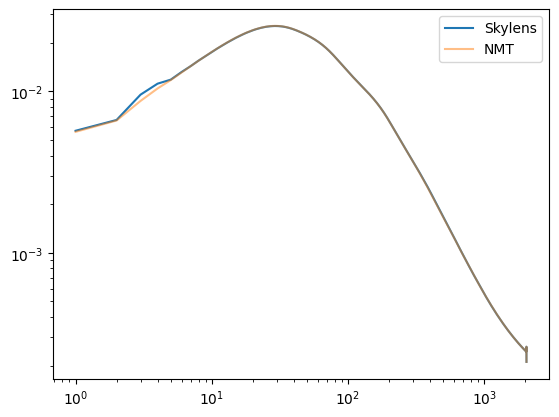

In [170]:
plt.loglog(ells,pcl_g545_skylens,label='Skylens')
plt.loglog(ells,pcl_g545_nmt,label='NMT',alpha=0.5)
plt.legend(loc='best')

/var/folders/s2/zrtt0b094p52rpt0m42r4xmr0000gn/T/ipykernel_37891/2017579510.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


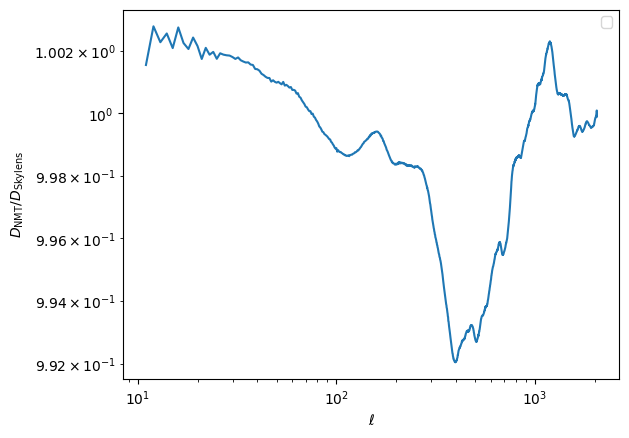

In [171]:
plt.loglog(ells[10:],
           (pcl_g545_nmt/pcl_g545_skylens)[10:])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$D_{\rm NMT}/D_{\rm Skylens}$")
plt.legend(loc='best')

**Observation:** Almost a 8\% hit, seems like off-diagonals are having an impact. 


- Make sure that the window $\ell$ is the same in Skylens as NaMaster; if not, change manually in NaMaster. 

- Note that NaMaster may assume $\ell$ = $\ell'$ = $\ell ''$, but this is only fine for simple CMB windows, not necessarily galaxies. 

##### Check diagonals of coupling matrices

In [50]:
plt.loglog(ells,
           np.diag(M_gcib)/np.diag(M_gcib_nmt) - 1)
plt.xlabel(r"$\ell$")
plt.title("Comparison of diagonal terms of M")
plt.legend(loc='best')

NameError: name 'M_gcib' is not defined

**Observation:** Diagonal terms match well.

##### Check off-diagonals of coupling matrices

In [173]:
M_corr_skylens = M_gcib/np.sqrt(np.outer(np.diag(M_gcib),np.diag(M_gcib)))
M_corr_nmt = M_gcib_nmt/np.sqrt(np.outer(np.diag(M_gcib_nmt),np.diag(M_gcib_nmt)))

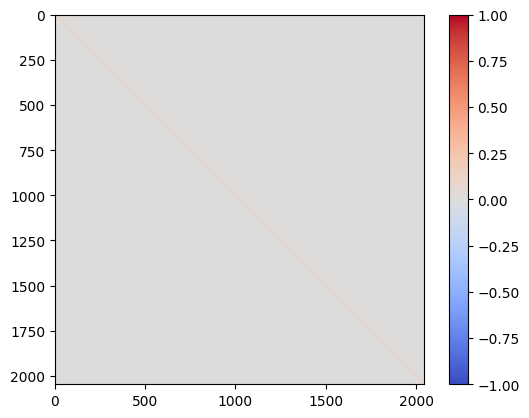

In [174]:
plt.imshow(M_corr_skylens,cmap = 'coolwarm',
           vmax=1,vmin=-1)
plt.colorbar()

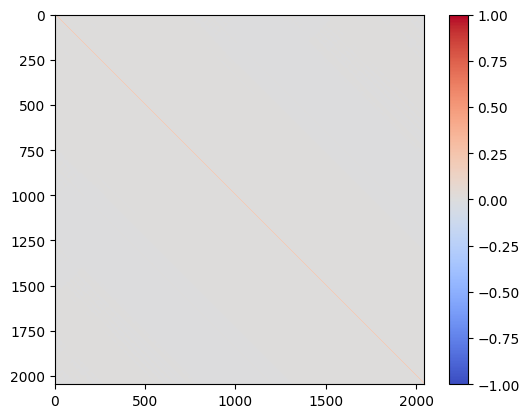

In [175]:
plt.imshow(M_corr_nmt,cmap = 'coolwarm',
           vmax=1,vmin=-1)
plt.colorbar()

In [176]:
def upper(df):
    '''Returns the upper triangle of a correlation matrix.
    You can use scipy.spatial.distance.squareform to recreate matrix from upper triangle.
    Args:
      df: pandas or numpy correlation matrix
    Returns:
      list of values from upper triangle
    '''
    
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

In [177]:
upper_tri_skylens = upper(M_corr_skylens)
upper_tri_nmt = upper(M_corr_nmt)

Text(0.5, 1.0, 'Log10 of absolute ratio')

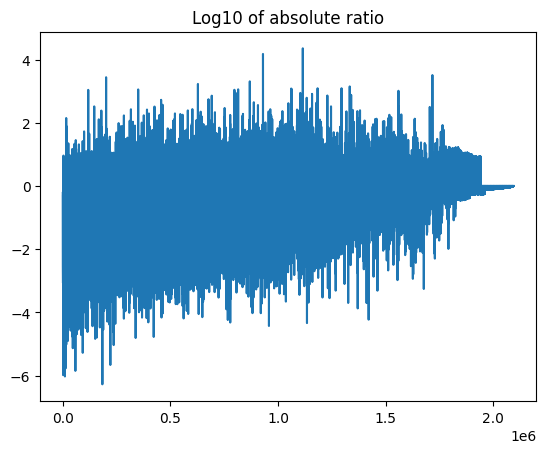

In [178]:
plt.plot(np.log10(np.abs(upper_tri_skylens/upper_tri_nmt)))
plt.title("Log10 of absolute ratio")

/var/folders/s2/zrtt0b094p52rpt0m42r4xmr0000gn/T/ipykernel_37891/1202575670.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


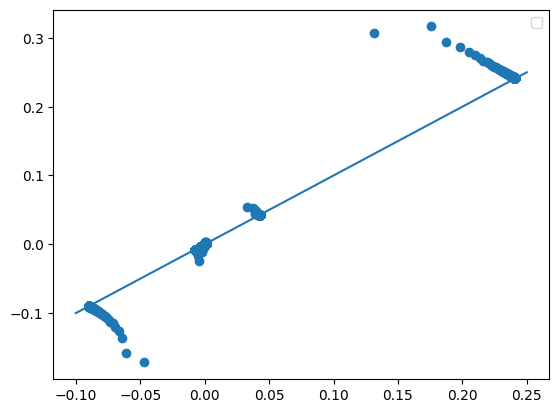

In [179]:
plt.scatter(upper_tri_skylens,upper_tri_nmt,)
plt.plot(np.linspace(-.1,.25,100),np.linspace(-.1,.25,100))
plt.legend(loc='best')

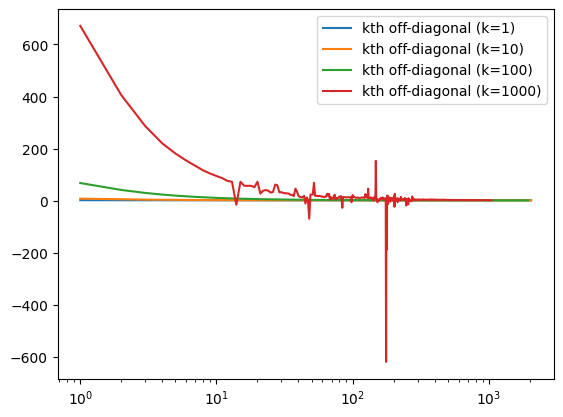

In [180]:
# Plot the kth off-diagonal (k=1)

k = 1
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

k = 10
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

k = 100
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

k = 1000
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

plt.legend(loc='best')

Check mask consistency to make sure `NaMaster` is processing mask properly. 

In [184]:
# check any difference in masks 

np.sum(mask_elg - felg.get_mask())

0.0

Therefore, no difference in masks passed.

##### Test different types of masks


This test will tell us if the off-diagonal terms are diverging due to mask complexity or some other issue. 

###### Test 1: Full sky mask

This should result in a diagonal coupling matrix without any off-diagonal terms. 

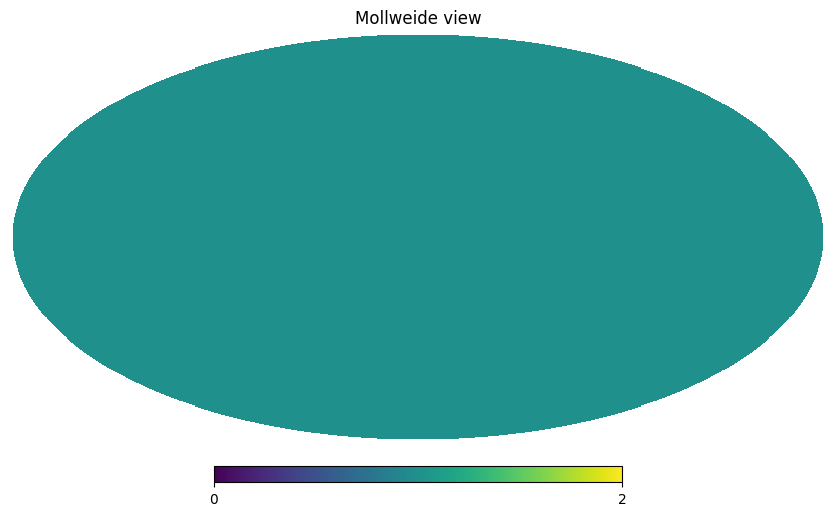

In [21]:
nside = 1024
mask_full_sky = np.ones(hp.nside2npix(nside))  # All pixels set to 1
hp.mollview(mask_full_sky)

In [22]:
# generat NaMaster fields 

felg = nmt.NmtField(mask_full_sky, [data_elg], n_iter=0)
f545 = nmt.NmtField(mask_full_sky, [data_cib], n_iter=0)

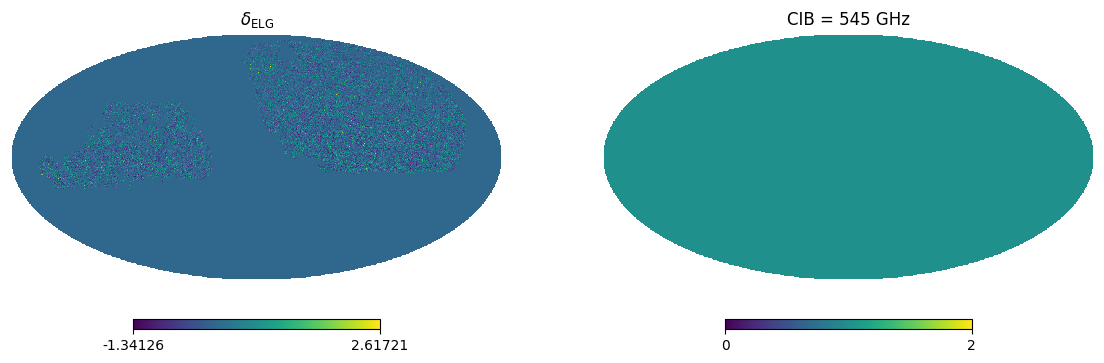

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

plt.axes(axes[0])
hp.mollview(felg.get_maps()[0], 
            title=r'$\delta_{\rm ELG}$', rot = -85,
            hold=True)

plt.axes(axes[1])
hp.mollview(felg.get_mask(), 
            title='CIB = 545 GHz', rot = -85,
            hold=True)

In [24]:
delta_ell = 1
b = nmt.NmtBin.from_nside_linear(1024, nlb=delta_ell)

# Create a NaMaster workspaces for the different spin combinations
w00 = nmt.NmtWorkspace.from_fields(felg, f545, b)

# Extract the mode-coupling matrix
mcm00 = w00.get_coupling_matrix()

In [25]:
M_nmt_fullsky = mcm00[1:2048,1:2048]
M_nmt_fullsky_corr = M_nmt_fullsky/np.sqrt(np.outer(np.diag(M_nmt_fullsky),np.diag(M_nmt_fullsky)))

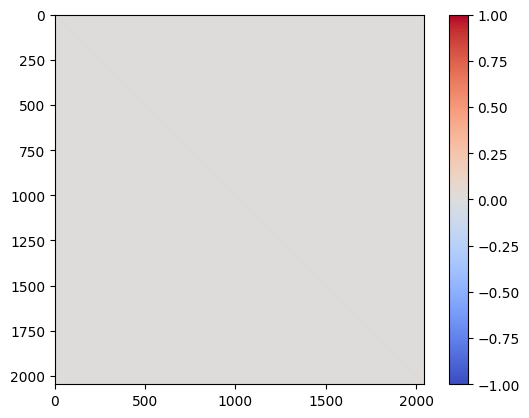

In [26]:
plt.imshow(M_nmt_fullsky_corr,vmin=-1,vmax=1,
           cmap='coolwarm')
plt.colorbar()

In [29]:
np.diag(M_nmt_fullsky_corr,k=1)

array([2.48878649e-35, 2.21099049e-35, 2.27905661e-35, ...,
       2.85795435e-35, 2.85785261e-35, 2.85775114e-35])

In [30]:
np.diag(M_nmt_fullsky_corr,k=1000)

array([1.46595598e-14, 1.46720832e-14, 1.46846307e-14, ...,
       1.40961625e-13, 1.39965397e-13, 1.39025329e-13])

In [42]:
M_fullsky_skylens = np.load("/Users/tkarim/Documents/research/cib.nosync/data/test/M_fullsky.npy")[1:,1:]

In [43]:
ells = np.arange(1,2048)

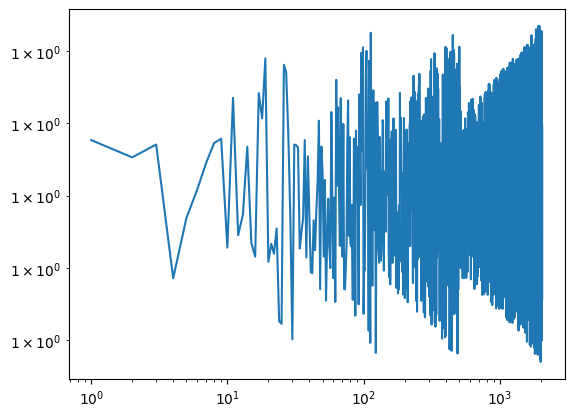

In [44]:
plt.loglog(ells, 
           np.diag(M_nmt_fullsky)/np.diag(M_fullsky_skylens))

In [45]:
M_corr_skylens = M_fullsky_skylens/np.sqrt(np.outer(np.diag(M_fullsky_skylens),np.diag(M_fullsky_skylens)))

In [46]:
M_corr_nmt = M_nmt_fullsky_corr

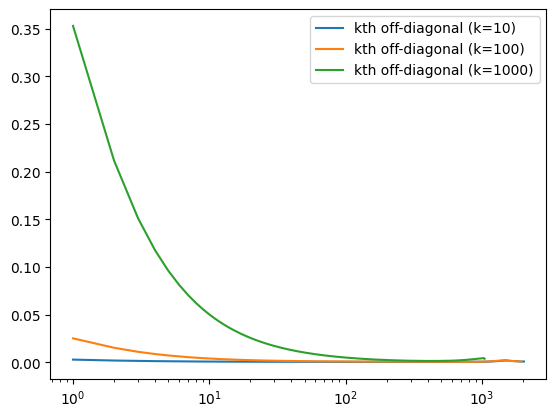

In [48]:
# Plot the kth off-diagonal (k=1)

# k = 1
# kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
# kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
# plt.semilogx(ells[:-k], 
#             kth_off_diag_nmt/kth_off_diag_skylens, 
#         label=f'kth off-diagonal (k={k})')

k = 10
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

k = 100
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

k = 1000
kth_off_diag_nmt = np.diag(M_corr_nmt, k=k)
kth_off_diag_skylens =  np.diag(M_corr_skylens, k=k)
plt.semilogx(ells[:-k], 
            kth_off_diag_nmt/kth_off_diag_skylens, 
        label=f'kth off-diagonal (k={k})')

plt.legend(loc='best')

In [49]:
def extract_off_diagonals(matrix, max_k):
    off_diags = {}
    for k in range(1, max_k + 1):
        off_diags[k] = np.diag(matrix, k=k)  # Extract kth off-diagonal
    return off_diags

In [28]:
np.diag(M_nmt_fullsky)

array([0.99999999, 0.99999999, 0.99999999, ..., 0.99999999, 0.99999999,
       0.99999999])

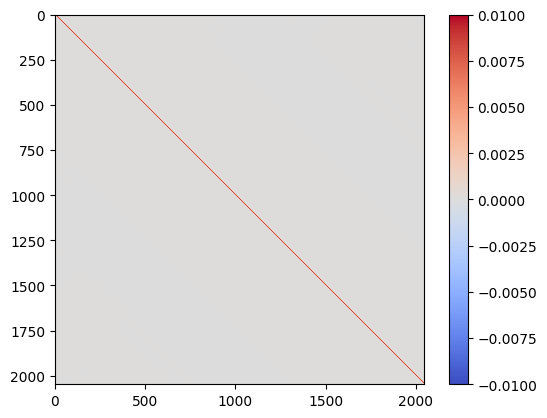

In [32]:
plt.imshow(mcm00[:2048, :2048], cmap = 'coolwarm', 
           vmin = -.01, vmax = .01)
plt.colorbar()

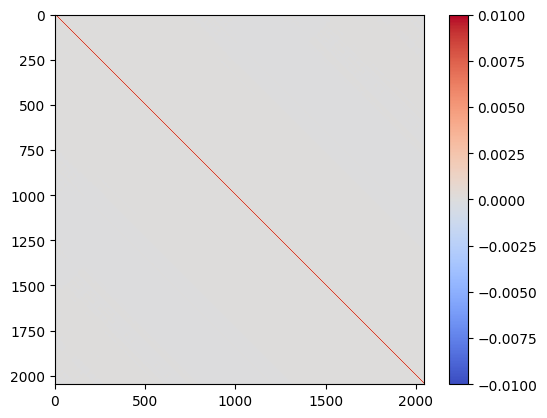

In [35]:
plt.imshow(M_gcib, cmap = 'coolwarm', 
           vmin = -.01, vmax = .01)
plt.colorbar()

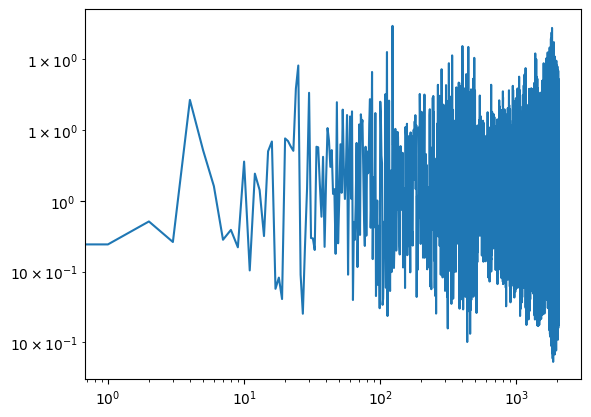

In [41]:
plt.loglog(np.arange(2048), np.diag(M_gcib)/np.diag(mcm00[:2048, :2048]))
#plt.loglog(np.arange(2048), )

In [44]:
skylens_corr = M_gcib/np.outer(np.diag(M_gcib),np.diag(M_gcib))

In [54]:
M_gcib/mcm00[:2048, :2048] - 1

array([[ 4.44811987e-09, -6.66666675e-01, -8.00000004e-01, ...,
        -9.99740499e-01, -9.99765316e-01, -1.00016223e+00],
       [ 1.99999993e+00, -3.07124230e-08, -4.00000009e-01, ...,
        -9.99272774e-01, -9.99548426e-01, -9.99279988e-01],
       [ 3.99999991e+00,  6.66666643e-01, -1.44880599e-08, ...,
        -9.99141207e-01, -9.98752688e-01, -9.98338927e-01],
       ...,
       [ 4.34207464e+03,  1.35133925e+03,  5.73919900e+02, ...,
         5.36548141e-08, -4.88662578e-04, -9.76775685e-04],
       [ 3.93057345e+03,  8.39561744e+02,  8.34831125e+02, ...,
         4.88854564e-04,  5.72952041e-08, -4.88331700e-04],
       [-2.72149332e+03,  1.34054465e+03,  1.11318323e+03, ...,
         9.77781391e-04,  4.88707996e-04, -2.17791082e-08]])

In [45]:
namaster_corr = mcm00[:2048, :2048]/np.outer(np.diag(mcm00[:2048, :2048]),np.diag(mcm00[:2048, :2048]))

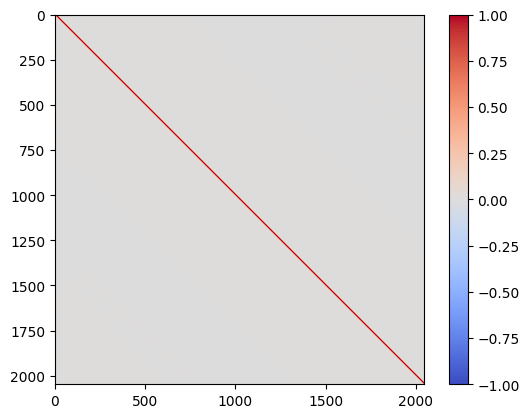

In [48]:
plt.imshow(skylens_corr, vmin = -1, vmax = 1,
           cmap = 'coolwarm')
plt.colorbar()

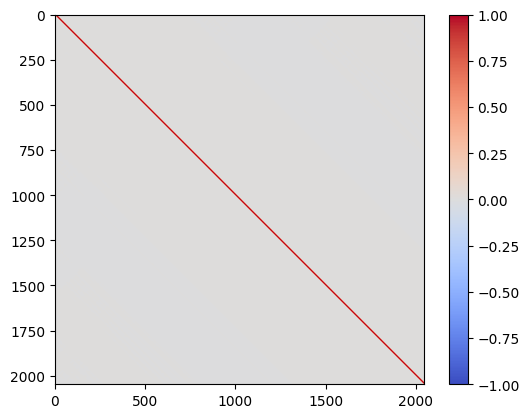

In [49]:
plt.imshow(namaster_corr, vmin = -1, vmax = 1,
           cmap = 'coolwarm')
plt.colorbar()

In [67]:
namaster_corr

array([[ 2.55569498e+01,  1.86583433e+00,  2.03028718e+01, ...,
        -3.79950822e-06, -8.91703816e-06, -1.32265476e-06],
       [ 6.21944778e-01,  1.86822288e+01,  1.10129467e+00, ...,
        -3.37190314e-06, -1.87238185e-06, -4.28665831e-06],
       [ 4.06057436e+00,  6.60776804e-01,  2.20694280e+01, ...,
        -4.65095027e-06, -2.93502493e-06, -1.07941125e-06],
       ...,
       [-9.28748037e-10, -2.47267402e-09, -5.68436845e-09, ...,
         2.17671763e+01,  9.26228218e-01,  5.25229958e+00],
       [-2.17860693e-09, -1.37237858e-09, -3.58542015e-09, ...,
         9.25775627e-01,  2.17671763e+01,  9.26228107e-01],
       [-3.22992615e-10, -3.14040902e-09, -1.31796245e-09, ...,
         5.24716913e+00,  9.25775737e-01,  2.17671763e+01]])

In [68]:
skylens_corr

array([[ 2.55569497e+01,  6.21944780e-01,  4.06057432e+00, ...,
        -9.85974531e-10, -2.09268327e-09,  2.14578575e-10],
       [ 1.86583434e+00,  1.86822294e+01,  6.60776825e-01, ...,
        -2.45213448e-09, -8.45518376e-10, -3.08644625e-09],
       [ 2.03028716e+01,  1.10129471e+00,  2.20694283e+01, ...,
        -3.99420241e-09, -3.66089131e-09, -1.79298134e-09],
       ...,
       [-4.03362181e-06, -3.34389405e-06, -3.26805642e-06, ...,
         2.17671751e+01,  9.25775502e-01,  5.24716910e+00],
       [-8.56535263e-06, -1.15356890e-06, -2.99680562e-06, ...,
         9.26228094e-01,  2.17671751e+01,  9.25775768e-01],
       [ 8.78699267e-07, -4.21299913e-06, -1.46845171e-06, ...,
         5.25229955e+00,  9.26228138e-01,  2.17671768e+01]])

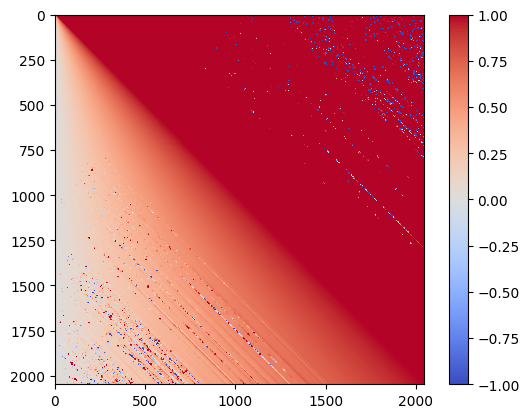

In [50]:
plt.imshow(namaster_corr/skylens_corr, vmin = -1, vmax = 1,
           cmap = 'coolwarm')
plt.colorbar()

In [55]:
import numpy as np

def compute_relative_error_offdiagonal(cov1, cov2, epsilon=1e-10):
    """
    Compute the relative error between the off-diagonal elements of two covariance matrices.
    
    Parameters:
        cov1 (ndarray): First covariance matrix.
        cov2 (ndarray): Second covariance matrix.
        epsilon (float): Small value to avoid division by zero.
        
    Returns:
        relative_error (ndarray): Matrix of relative errors for off-diagonal elements.
    """
    # Ensure the inputs are numpy arrays
    cov1, cov2 = np.asarray(cov1), np.asarray(cov2)
    
    # Mask the diagonal to focus on off-diagonal elements
    diag_mask = np.eye(cov1.shape[0], dtype=bool)
    off_diag_mask = ~diag_mask
    
    # Compute relative error
    abs_diff = np.abs(cov1 - cov2)
    max_values = np.maximum(np.abs(cov1), np.abs(cov2))
    relative_error = np.zeros_like(cov1)
    relative_error[off_diag_mask] = abs_diff[off_diag_mask] / (max_values[off_diag_mask] + epsilon)
    
    return relative_error


In [59]:
relative_error = compute_relative_error_offdiagonal(M_gcib, mcm00[:2048, :2048])

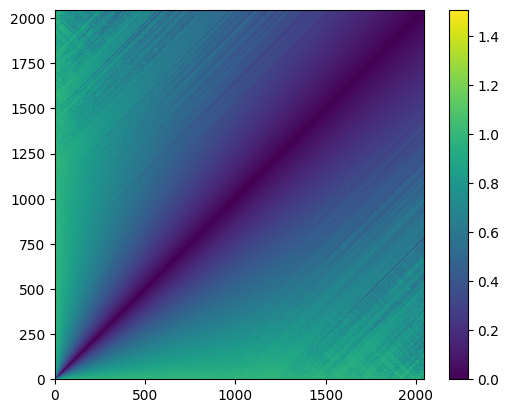

In [61]:
plt.imshow(relative_error, cmap="viridis", origin="lower")
plt.colorbar()

In [63]:
tolerance = 0.1  # Adjust as needed
num_large_errors = np.sum(relative_error > tolerance)
print(f"Number of off-diagonal elements with relative error > {tolerance}: {num_large_errors}")


Number of off-diagonal elements with relative error > 0.1: 3762808


In [64]:
num_large_errors/2048**2

0.8971233367919922

In [65]:
import matplotlib.pyplot as plt

def visualize_offdiagonal_elements(cov1, cov2):
    """
    Visualize the off-diagonal elements of two covariance matrices.
    
    Parameters:
        cov1 (ndarray): First covariance matrix.
        cov2 (ndarray): Second covariance matrix.
    """
    # Ensure the inputs are numpy arrays
    cov1, cov2 = np.asarray(cov1), np.asarray(cov2)
    
    # Extract off-diagonal elements
    diag_mask = np.eye(cov1.shape[0], dtype=bool)
    off_diag1 = cov1[~diag_mask]
    off_diag2 = cov2[~diag_mask]
    
    # Scatter plot of off-diagonal elements
    plt.figure(figsize=(6, 6))
    plt.scatter(off_diag1, off_diag2, alpha=0.7, color="blue")
    plt.plot([min(off_diag1.min(), off_diag2.min()), max(off_diag1.max(), off_diag2.max())],
             [min(off_diag1.min(), off_diag2.min()), max(off_diag1.max(), off_diag2.max())],
             color="red", linestyle="--", label="y = x")
    plt.xlabel("Off-Diagonal Elements of Cov1")
    plt.ylabel("Off-Diagonal Elements of Cov2")
    plt.title("Comparison of Off-Diagonal Elements")
    plt.legend()
    plt.grid()
    plt.show()


/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


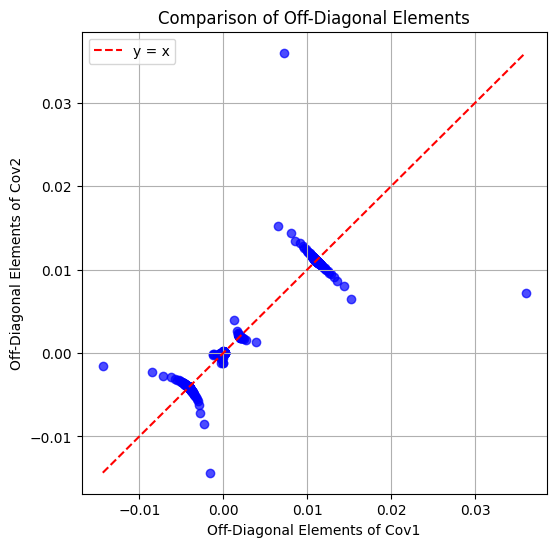

In [66]:
visualize_offdiagonal_elements(M_gcib, mcm00[:2048, :2048])

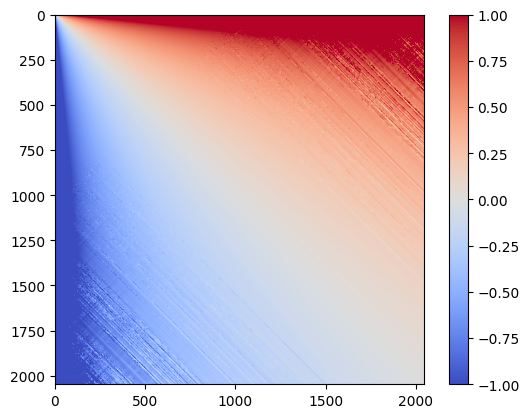

In [36]:
quant = mcm00[:2048, :2048]/M_gcib
plt.imshow(np.log10(np.abs(quant)), cmap = 'coolwarm',
           vmin = -1, vmax = 1)
plt.colorbar()

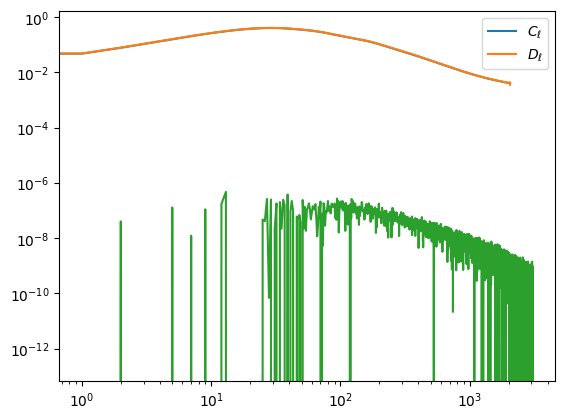

In [136]:
plt.loglog(ps.ell_range, tst_c_99[5], label = r'$C_{\ell}$')
plt.loglog(ps.ell_range, pcl_g545/fsky, label = r'$D_{\ell}$')
plt.loglog(pcl_g545_nmt/fsky)

plt.legend(loc='best')


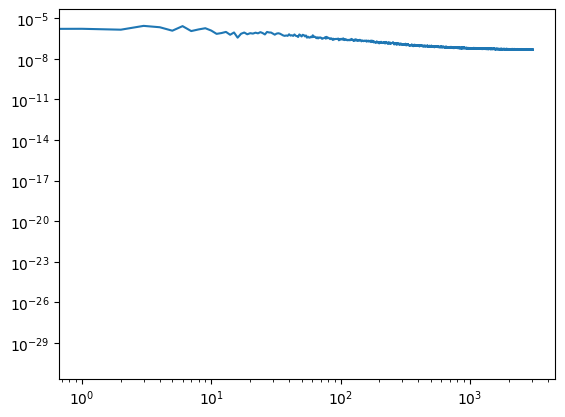

In [144]:
plt.loglog(pcl_gg_nmt)

### Comparison of `Skylens` and `NaMaster`

In [91]:
mcibgal_obj_pk.cc

array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995])

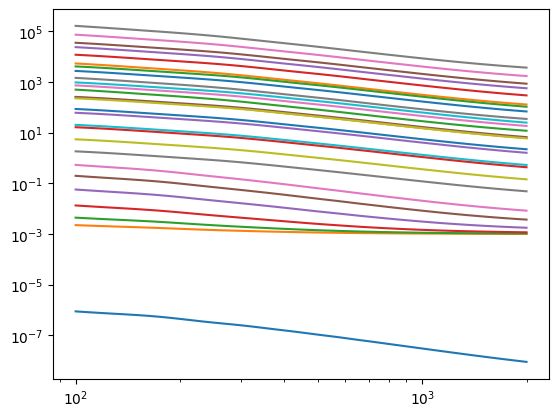

In [89]:
for i in range(28):
    plt.loglog(consts.ell, tst_c.reshape(28,99)[i])

### Compare Halo Mass Function and Halo Bias Function

1.0
1.0
1.0


Text(0, 0.5, 'HMF Ratio [me/DopplerCIB]')

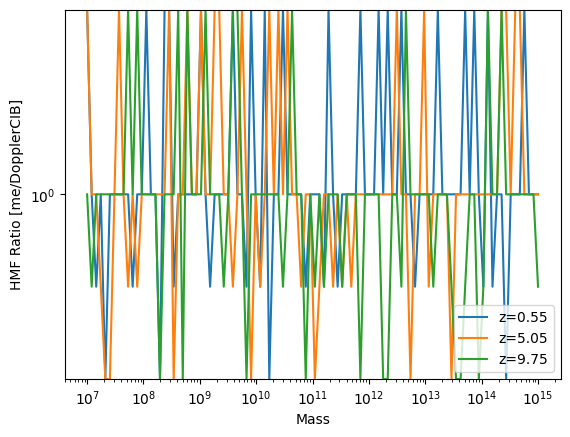

In [11]:
zidx = 5
ratio = ps.hmfzT[0,0,:,zidx]/mcibgal_obj_pk.hmfmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 50
ratio = ps.hmfzT[0,0,:,zidx]/mcibgal_obj_pk.hmfmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = -5
ratio = ps.hmfzT[0,0,:,zidx]/mcibgal_obj_pk.hmfmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

plt.legend(loc='best')
plt.xlabel("Mass")
plt.ylabel("HMF Ratio [me/DopplerCIB]")

**Observation:** Halo Mass Function matches once fixed for the $h^{-3}$ factor. 

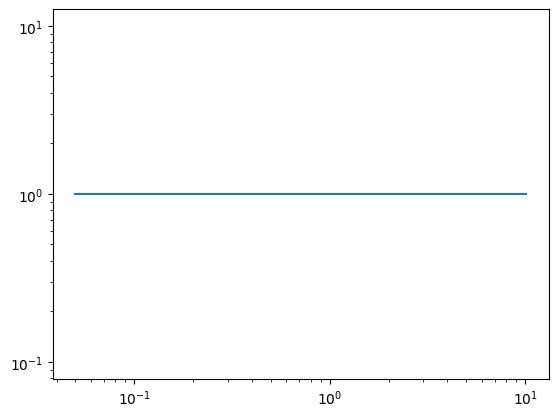

In [12]:
midx = 60
plt.loglog(consts.Plin['z'],  ps.biasmz[0,0,midx,:]/mcibgal_obj_pk.biasmz[midx])
#plt.loglog(consts.Plin['z'], ps.biasmz[0,0,midx,:])

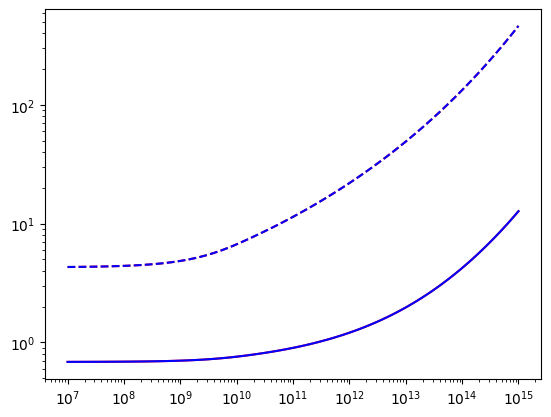

In [33]:
zidx = 10
plt.loglog(consts.Mh_Msol, mcibgal_obj_pk.biasmz[:,zidx],c='r')
plt.loglog(consts.Mh_Msol, ps.biasmz[0,0,:,zidx],c='b')

zidx = -10
plt.loglog(consts.Mh_Msol, mcibgal_obj_pk.biasmz[:,zidx],ls='--',c='r')
plt.loglog(consts.Mh_Msol, ps.biasmz[0,0,:,zidx],ls='--',c='b')

1.0
1.0
1.0


Text(0, 0.5, 'Bias Ratio [me/DopplerCIB]')

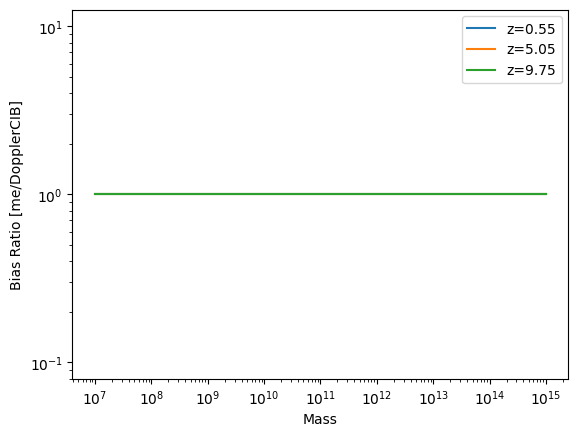

In [34]:
# bias comparison
zidx = 5
ratio = ps.biasmz[0,0,:,zidx]/mcibgal_obj_pk.biasmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = 50
ratio = ps.biasmz[0,0,:,zidx]/mcibgal_obj_pk.biasmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

zidx = -5
ratio = ps.biasmz[0,0,:,zidx]/mcibgal_obj_pk.biasmz[:,zidx]
print(ratio.mean())
plt.loglog(consts.Mh_Msol, ratio,
           label = f'z={np.round(consts.Plin["z"][zidx],2)}')

plt.legend(loc='best')
plt.xlabel("Mass")
plt.ylabel("Bias Ratio [me/DopplerCIB]")

**Observation:** Halo Biases diverge significantly.

Need to investigate $\nu_{200}$ to understand what is going on. 

In [35]:
# calculate nu from DopplerCIB
nm = len(cosmo_var.mass) # number of mass bins

# number of CIB redshift bins
redshifts = np.loadtxt('/Users/tkarim/Documents/research/DopplerCIB/data_files/redshifts.txt')
nr = len(redshifts)

# store bias as a function of mass and redshift 
bias_m_z = np.zeros((nm, nr))
r200_m21 = np.zeros((nm, nr))
sigma_m21 = np.zeros((nm, nr))
nu_m21 = np.zeros((nm, nr))
mass2radius_m21 = np.zeros_like(nu_m21)
mass2radius_sig_m21 = np.zeros_like(nu_m21)

from astropy.cosmology import Planck18 as cosmo 
for r in range(nr):
    instance = mhmf_unfw.h_u_b(cosmo_var.k, cosmo_var.Pk[:,r],
                                redshifts[r],
                                cosmo,
                                200,
                                cosmo_var.mass)
    mass2radius_m21[:,r] = instance.mass_to_radius()
    mass2radius_sig_m21[:,r] = instance.sigma(mass2radius_m21[:,r])
    nu_m21[:,r] = instance.nu()
    bias_m_z[:, r] = instance.b_nu()
    r200_m21[:,r] = instance.r_delta()
    sigma_m21[:,r] = instance.sigma(rad=r200_m21[:,r])

In [13]:
plt.loglog(consts.Plin['z'],nu_k25[midx],label='K25')
plt.loglog(redshifts,nu_m21[midx],label='M21')

NameError: name 'nu_k25' is not defined

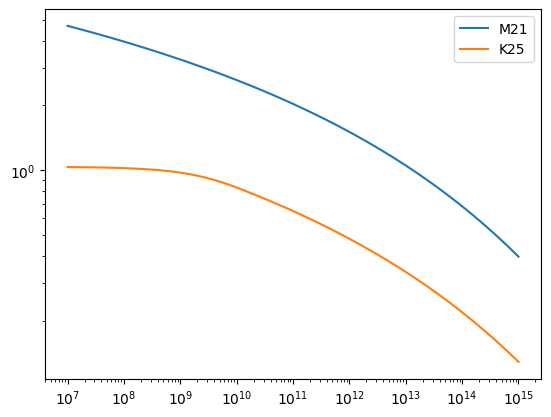

In [11]:
midx = 50
plt.loglog(consts.Mh_Msol, mass2radius_sig_m21[:,midx], label ='M21')
plt.loglog(consts.Mh_Msol, mass2radius_sig_k25[:,midx], label ='K25')
plt.legend(loc='best')

In [12]:
zidx = 10
tmp_m2r = halo.mass_to_radius()
tmp_kk = consts.k_grid_over_ell[:,zidx]
tmp_pk = consts.Pk_array_over_ell[:,zidx]

In [13]:
tmp_kk = consts.Plin['k']
tmp_pk = consts.Plin['pk'][zidx]

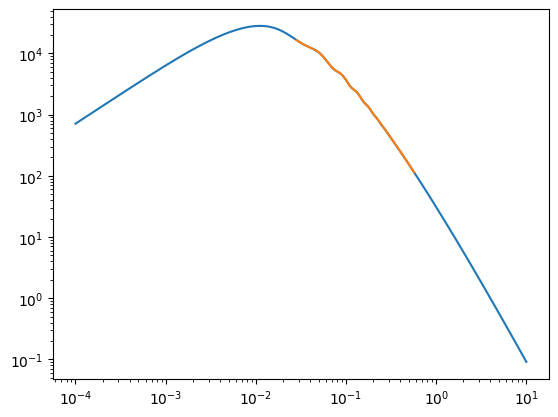

In [14]:
plt.loglog(tmp_kk, tmp_pk)
plt.loglog(consts.k_grid_over_ell[:,zidx],consts.Pk_array_over_ell[:,zidx])

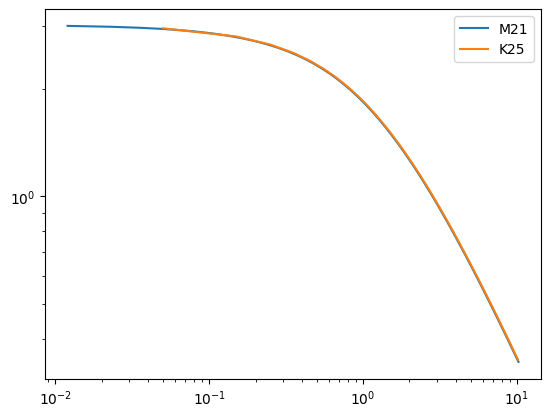

In [26]:
plt.loglog(redshifts, mass2radius_sig_m21[midx],label='M21')
plt.loglog(consts.Plin['z'], mass2radius_sig_k25[midx],label='K25')
plt.legend(loc='best')

Text(0, 0.5, '$\\nu$')

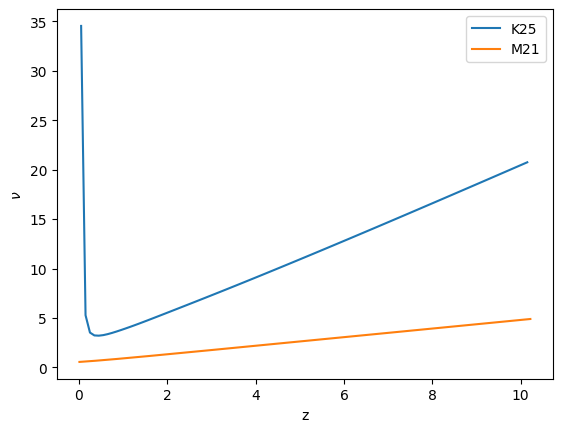

In [15]:
midx = 50
plt.plot(consts.Plin['z'], pc.nu[zidx], label = 'K25')
plt.plot(redshifts, nu_m21[midx], label = 'M21')
plt.legend(loc='best')
plt.xlabel("z")
plt.ylabel(r"$\nu$")

**Observation:** Clearly, the two curves do not match.

- Need to investigate constituent functions of $\sigma$ to make sense of this. 

#### Constituent Function 1: Linear Power Spectra

In [36]:
pk_m21 = cosmo_var.Pk_array(ell, consts.Plin['z'])
k_m21 = cosmo_var.karray(ell,consts.Plin['z'])
pk_me = consts.Pk_array_over_ell
k_me = consts.k_grid_over_ell

Text(0.5, 1.0, 'Ratio of Linear Matter Power Spectra: K25/M21')

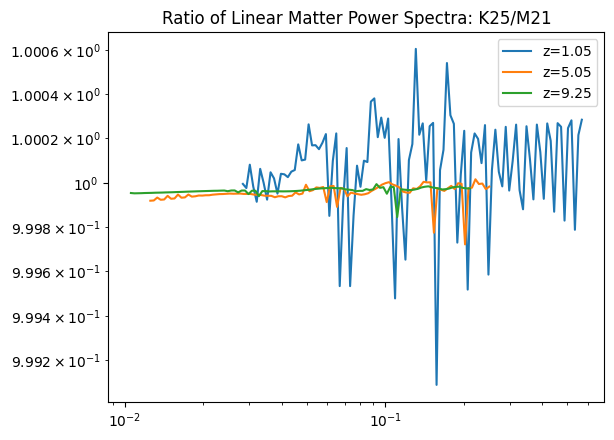

In [37]:
zidx = 10
plt.loglog(k_m21[:,zidx], pk_me[:,zidx]/pk_m21[:,zidx], label = f"z={np.round(consts.Plin['z'][zidx],2)}")

zidx = 50
plt.loglog(k_m21[:,zidx], pk_me[:,zidx]/pk_m21[:,zidx], label = f"z={np.round(consts.Plin['z'][zidx],2)}")

zidx = -10
plt.loglog(k_m21[:,zidx], pk_me[:,zidx]/pk_m21[:,zidx], label = f"z={np.round(consts.Plin['z'][zidx],2)}")

plt.legend(loc='best')
plt.title("Ratio of Linear Matter Power Spectra: K25/M21")

**Observation:** Linear power spectra disagree at the level of $10\%$. 

#### Test `W(rk)`

In [86]:
# picking example mass bin midx
midx = 15
zidx = 10

rk = np.outer(r200_m21[midx], cosmo_var.k)
rk.shape

(210, 707)

In [87]:
W_m21 = instance.W(rk)

In [77]:
_, W_me = halo.sigma(pc.rad200)

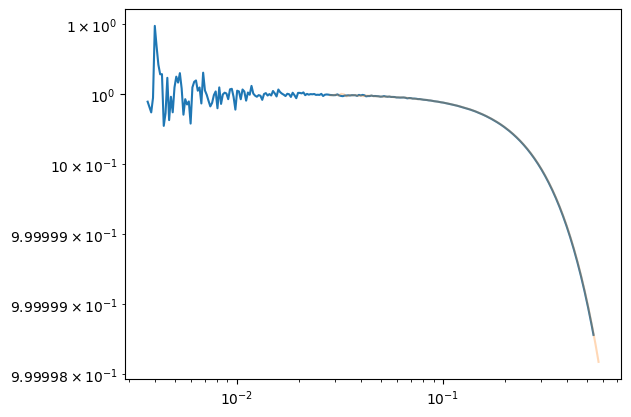

In [97]:
plt.loglog(cosmo_var.k[200:450], W_m21[61][200:450],label='M21')
plt.loglog(consts.k_grid_over_ell[:,zidx], W_me[:,midx,zidx],label='K25', alpha = 0.3)

In [ ]:
    def sigma(self, rad):
        """
        matter variance for given power spectrum, wavenumbers k and radius of
        the halo. radius is calculated below from mass of the halo. It has to
        be noted that there's no factor
        of \Delta = 200 to calculate the radius.
        """
        rk = np.outer(rad, self.kk)
        rest = self.power * self.kk**3
        # dlnk = np.log(self.kk[1] / self.kk[0])
        lnk = np.log(self.kk)
        integ = rest*self.W(rk)**2
        sigm = (0.5/np.pi**2) * intg.simpson(integ, x=lnk, axis=-1)
        return np.sqrt(sigm)

### Compare 2-halo

In [33]:
# prediction from DopplerCIB
c2h_m21 = mcibgal_obj_pk.twohalo_int()

4.323661263288425e-31
sfrsub shape = (20, 102)
pkt shape = (102, 99)


In [59]:
##==prediction from my code==##
# calculate unfw
uprof_me = halo.nfwfourier_u(lambda_NFW=1, 
                          rad200=pc.rad200, 
                          c=pc.concentration, 
                          c_term=pc.concentration_amp) 

# calculate Seff
seff_me = cib.Seff(1, model='M21')

# cibterm needed to calculate 2-halo term
# match the parameters exactly as DopplerCIB
params_sfr = ((mcibgal_obj_pk.etamax, # etamax
               np.log10(mcibgal_obj_pk.Meffmax), 0.0, #mu_0, mu_p
               mcibgal_obj_pk.sigmaMh, #sigma_M
               mcibgal_obj_pk.tau, #tau
               mcibgal_obj_pk.z_c, #zc
               11, 1)) #N_IR central HOD 
cibterm,djc,djsub = cib.cibterm(params = params_sfr, u = uprof_me, cib_model = 'M21') # (nu, ell, Mh, z)

you set meanIR to 1 by hand for testing.


In [63]:
%%time 

# store power spectra
c2h_me = np.zeros((6,6,len(ell),102)) # (nu, nu, ell)
#loop over to get all auto and cross CIB power spectra
for idx1 in range(6):
    for idx2 in range(6):
        c2h_me[idx1,idx2] = ps.cibcrosscib_pk_2h(cibterm[idx1], cibterm[idx2])

CPU times: user 198 ms, sys: 50 ms, total: 248 ms
Wall time: 258 ms


In [40]:
from scipy.integrate import simpson

In [65]:
def tst_cibcrosscib_pk_2h(cibterm):
    """
    Returns P_{CIB X CIB'} 2-halo term.
    
    Note that the jnu terms get cancelled out by the ones in W_CIB
    
    Cell = int dz/c * H(z)/chi^2(z) * W_nu * W_nu' * Plin * integral_nu * integral_nu'
    integral_nu = integral_nu' = int dlog10Mh * I-term * b(Mh, z) * HMF
    
    Args:
        
    Returns: 
        P_CIBXCIB : of shape (k,z)
    """
    
    # integrals
    integrand = cibterm * ps.hmfzTXbias 
    integral = simpson(y=integrand, dx=ps.dm, axis=2) #(nu, k,z)
    
    # Pairwise products of integrals for unique combinations (nu_i, nu_j)
    pk2h_all = np.einsum('ikz,jkz->ijkz', integral, integral)  # Shape (nu, nu, k, z)
    
    #(k,z)
    pk2h_all = ps.Pk_lin * pk2h_all
    
    return pk2h_all

In [66]:
%%time 

tst = tst_cibcrosscib_pk_2h(cibterm)

CPU times: user 29.6 ms, sys: 40.9 ms, total: 70.5 ms
Wall time: 69.8 ms


In [138]:
def tst_cibcrosscib_pk_1h(djc, djsub, uprof):
    """
    Returns P_{CIB X CIB'} 1-halo term.
    
    Note that the jnu terms get cancelled out by the ones in W_CIB
    
    pk1h = int(t1+t2+t3)*HMF*dlogMh
    t1 = djc_nu * djsub_nu' * unfw
    t2 = djc_nu' * djsub_nu * unfw
    t3 = djsub_nu * djsub_nu' * unfw^2 
    
    Args:
        djc_nu, djc_nu_prime : central emissivity (Mh,z)
        djsub_nu, djsub_nu_prime : sat emissivity (Mh,z)
        uprof : Fourier halo profile (ell,Mh,z)
    Returns: 
        pk1h : of shape (k,z)
    """
    
    # Compute pairwise products for integrand_cs1, integrand_cs2, integrand_ss
    # Expand djc, djsub, and uprof to align shapes for pairwise operations
    t_c1s2 = np.einsum('imz,jmz->ijmz', djc, djsub)       # djc_nu1 * djsub_nu2 * uprof
    t_c2s1 = t_c1s2.transpose(1, 0, 2, 3)  # Swap i <-> j axes for transpose)
    t_s1s2 = np.einsum('imz,jmz->ijmz', djsub, djsub)  # djsub_nu1 * djsub_nu2 * uprof^2

    t_c1s2 = t_c1s2[:,:,np.newaxis,:,:]
    t_c2s1 = t_c2s1[:,:,np.newaxis,:,:]
    t_s1s2 = t_s1s2[:,:,np.newaxis,:,:]

    # Combine terms and include HMF
    integrand_tot = (t_c1s2*uprof + t_c2s1*uprof + t_s1s2*uprof**2) * ps.hmfzT[np.newaxis, np.newaxis, :, :]

    # Integrate over halo mass (Mh axis)
    pk1h_all = simpson(y=integrand_tot, dx=ps.dm, axis=3)  # Shape (nu, nu, k, z)

    return pk1h_all

In [171]:
#%%time 

tst22 = tst_cibcrosscib_pk_1h(djc, djsub, uprof_me)

In [143]:
%%time 

# store power spectra
c1h_me = np.zeros((6,6,len(ell),102)) # (nu, nu, ell)
# loop over to get all auto and cross CIB power spectra
for idx1 in range(6):
    for idx2 in range(6):
        c1h_me[idx1,idx2] = ps.cibcrosscib_pk_1h(djc[idx1],
                                                   djc[idx2],
                                                   djsub[idx1],
                                                   djsub[idx2],
                                                   uprof_me)

CPU times: user 205 ms, sys: 7.17 ms, total: 212 ms
Wall time: 212 ms


In [122]:
uprof_me.shape[2]

102

In [156]:
djc.shape

(6, 100, 102)

In [172]:
#%%time 

tst_lat = tst2_cibcrosscib_pk_1h(djc,djsub,uprof_me)

In [175]:
tst22 - tst_lat

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [115]:
djc.shape

(6, 100, 102)

In [110]:
%%time

tst1h = tst_cibcrosscib_pk_1h(djc,djsub,uprof_me)

CPU times: user 386 ms, sys: 416 ms, total: 802 ms
Wall time: 839 ms


In [109]:
%%time 

# store power spectra
c1h_me = np.zeros((6,6,len(ell),102)) # (nu, nu, ell)
# loop over to get all auto and cross CIB power spectra
for idx1 in range(6):
    for idx2 in range(6):
        c1h_me[idx1,idx2] = ps.cibcrosscib_pk_1h(djc[idx1],
                                                   djc[idx2],
                                                   djsub[idx1],
                                                   djsub[idx2],
                                                   uprof_me)

CPU times: user 207 ms, sys: 45.1 ms, total: 252 ms
Wall time: 252 ms


Text(0.5, 1.0, '2-halo term')

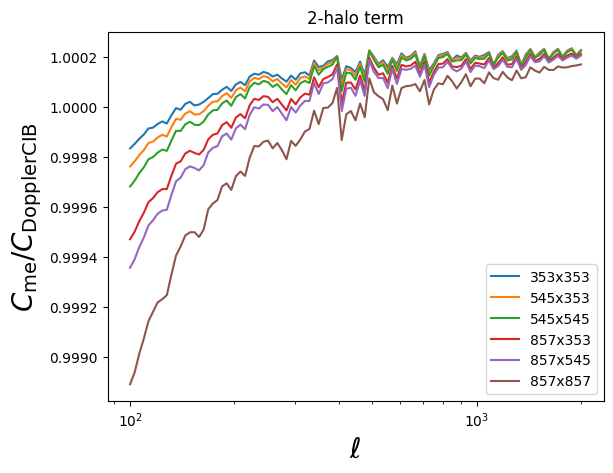

In [15]:
# plot comparisons 
fs = 20

for idx1 in range(3,6):
    for idx2 in range(3,6):
        if idx2 > idx1:
            continue
        plt.semilogx(ell, 
                     (mcibgal_obj_pk.cc[idx1]*c2h_me[idx1,idx2]*mcibgal_obj_pk.cc[idx2])/c2h_m21[idx1,idx2], 
                     label = f'{nus[idx1]}x{nus[idx2]}')
plt.legend(loc='best')
plt.xlabel(r"$\ell$",fontsize=fs)
plt.ylabel(r"$C_{\rm me}/C_{\rm DopplerCIB}$",fontsize=fs)
plt.title("2-halo term")

### Compare 1-halo

In [31]:
c1h_m21 = mgal_obj.onehalo_int()

AttributeError: 'ProfHODMore15' object has no attribute 'onehalo_int'

In [163]:
djc = cib.djc_dlogMh(params_sfr,seff_me,'M21')
djsub = cib.djsub_dlogMh(params_sfr,seff_me,'M21')

you set meanIR to 1 by hand for testing.


In [164]:
# store power spectra
c1h_me = np.zeros((6,6,len(ell))) # (nu, nu, ell)
# loop over to get all auto and cross CIB power spectra
for idx1 in range(6):
    for idx2 in range(6):
        c1h_me[idx1,idx2], _ = ps.cibcrosscib_cell_1h(djc[idx1],
                                                   djc[idx2],
                                                   djsub[idx1],
                                                   djsub[idx2],
                                                   uprof_me)

[9.03282489e-02 1.00196484e-02 3.59568038e-03 1.82670347e-03
 1.09948813e-03 7.31984080e-04 5.21098619e-04 3.89167570e-04
 3.01293852e-04 2.39911882e-04 1.95399730e-04 1.62129710e-04
 1.36633388e-04 1.16679624e-04 1.00781082e-04 8.79158665e-05
 7.73634482e-05 6.86042351e-05 6.12560798e-05 5.50329821e-05
 4.97175492e-05 4.51422210e-05 4.11762127e-05 3.77162734e-05
 3.46800365e-05 3.20011676e-05 2.96257734e-05 2.75097137e-05
 2.56165645e-05 2.39160601e-05 2.23828883e-05 2.09957519e-05
 1.97366300e-05 1.85901931e-05 1.75433362e-05 1.65848033e-05
 1.57048835e-05 1.48951642e-05 1.41483284e-05 1.34579882e-05
 1.28185471e-05 1.22250852e-05 1.16732635e-05 1.11592438e-05
 1.06796206e-05 1.02313644e-05 9.81177245e-06 9.41842777e-06
 9.04916347e-06 8.70203237e-06 8.37528079e-06 8.06732594e-06
 7.77673630e-06 7.50221457e-06 7.24258286e-06 6.99676972e-06
 6.76379879e-06 6.54277882e-06 6.33289496e-06 6.13340096e-06
 5.94361238e-06 5.76290053e-06 5.59068709e-06 5.42643935e-06
 5.26966594e-06 5.119913

Text(0, 0.5, '$C_{\\rm me}/C_{\\rm DopplerCIB}$')

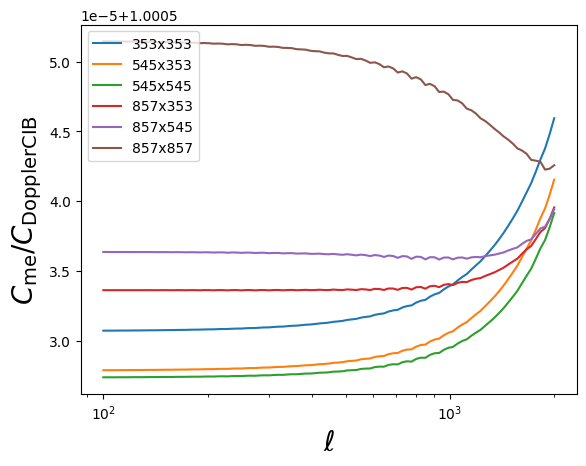

In [165]:
# plot comparisons 
fs = 20

for idx1 in range(3,6):
    for idx2 in range(3,6):
        if idx2 > idx1:
            continue
        plt.semilogx(ell, 
                     (mcibgal_obj_pk.cc[idx1]*c1h_me[idx1,idx2]*mcibgal_obj_pk.cc[idx2])/c1h_m21[idx1,idx2], 
                     label = f'{nus[idx1]}x{nus[idx2]}')
plt.legend(loc='best')
plt.xlabel(r"$\ell$",fontsize=fs)
plt.ylabel(r"$C_{\rm me}/C_{\rm DopplerCIB}$",fontsize=fs)

In [134]:
djc_m21 = mcibgal_obj_pk.djc_dlnMh()
djsub_m21 = mcibgal_obj_pk.djsub_dlnMh()

4.323661263288425e-31
sfrsub shape = (20, 102)


In [135]:
unfw_m21 = cosmo_var.interp_nfw(consts.ell, consts.Plin['z'])

In [154]:
# store power spectra
c1h_mycode_djsub_from_DCIB = np.zeros((6,6,len(ell))) # (nu, nu, ell)
# loop over to get all auto and cross CIB power spectra
for idx1 in range(6):
    for idx2 in range(6):
        c1h_mycode_djsub_from_DCIB[idx1,idx2], geo_k25 = ps.cibcrosscib_cell_1h(djc_m21[idx1],
                                                   djc_m21[idx2],
                                                   djsub_m21[idx1],
                                                   djsub_m21[idx2],
                                                   np.moveaxis(unfw_m21,0,1))

[9.03282489e-02 1.00196484e-02 3.59568038e-03 1.82670347e-03
 1.09948813e-03 7.31984080e-04 5.21098619e-04 3.89167570e-04
 3.01293852e-04 2.39911882e-04 1.95399730e-04 1.62129710e-04
 1.36633388e-04 1.16679624e-04 1.00781082e-04 8.79158665e-05
 7.73634482e-05 6.86042351e-05 6.12560798e-05 5.50329821e-05
 4.97175492e-05 4.51422210e-05 4.11762127e-05 3.77162734e-05
 3.46800365e-05 3.20011676e-05 2.96257734e-05 2.75097137e-05
 2.56165645e-05 2.39160601e-05 2.23828883e-05 2.09957519e-05
 1.97366300e-05 1.85901931e-05 1.75433362e-05 1.65848033e-05
 1.57048835e-05 1.48951642e-05 1.41483284e-05 1.34579882e-05
 1.28185471e-05 1.22250852e-05 1.16732635e-05 1.11592438e-05
 1.06796206e-05 1.02313644e-05 9.81177245e-06 9.41842777e-06
 9.04916347e-06 8.70203237e-06 8.37528079e-06 8.06732594e-06
 7.77673630e-06 7.50221457e-06 7.24258286e-06 6.99676972e-06
 6.76379879e-06 6.54277882e-06 6.33289496e-06 6.13340096e-06
 5.94361238e-06 5.76290053e-06 5.59068709e-06 5.42643935e-06
 5.26966594e-06 5.119913

/var/folders/s2/zrtt0b094p52rpt0m42r4xmr0000gn/T/ipykernel_54160/2181798867.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(consts.Plin['z'], djc[-2,-5,:]/djc_m21[-2,-5,:])


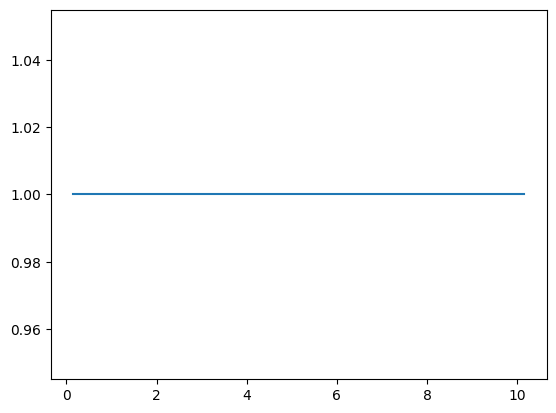

In [137]:
plt.plot(consts.Plin['z'], djc[-2,-5,:]/djc_m21[-2,-5,:])
#plt.loglog(consts.Plin['z'], djsub[-2,60,:])

Text(0, 0.5, '$C_{\\rm me}/C_{\\rm DopplerCIB}$')

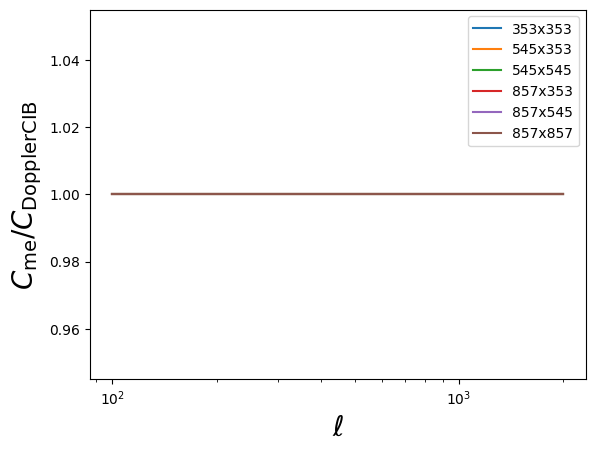

In [156]:
# plot comparisons 
fs = 20

for idx1 in range(3,6):
    for idx2 in range(3,6):
        if idx2 > idx1:
            continue
        plt.semilogx(ell, 
                     (mcibgal_obj_pk.cc[idx1]*c1h_mycode_djsub_from_DCIB[idx1,idx2]*mcibgal_obj_pk.cc[idx2])/c1h_m21[idx1,idx2], 
                     label = f'{nus[idx1]}x{nus[idx2]}')
plt.legend(loc='best')
plt.xlabel(r"$\ell$",fontsize=fs)
plt.ylabel(r"$C_{\rm me}/C_{\rm DopplerCIB}$",fontsize=fs)

In [157]:
from scipy.integrate import simpson

In [158]:
# abhi's code separate
def onehalo_int(dj_cen, dj_sub, u):
    nfreq = len(mcibgal_obj_pk.nu0)
    nl = len(mcibgal_obj_pk.ell)
    Cl_1h = np.zeros((nfreq, nfreq, nl))
    #dj_cen, dj_sub = self.djc_dlnMh(), self.djsub_dlnMh()
    #u = self.unfw
    geo = mcibgal_obj_pk.uni.dchi_dz(mcibgal_obj_pk.z)/(mcibgal_obj_pk.uni.chi(mcibgal_obj_pk.z)*(1+mcibgal_obj_pk.z))**2
    dm = np.log10(mcibgal_obj_pk.mh[1] / mcibgal_obj_pk.mh[0])
    fcxcc = mcibgal_obj_pk.fc*mcibgal_obj_pk.cc
    
    for i in range(nl):
        for f in range(nfreq):
            rest1 = (dj_cen[f, :, :]*dj_sub*u[:, i, :] + dj_cen *
                        dj_sub[f, :, :]*u[:, i, :] + dj_sub[f, :, :] *
                        dj_sub*u[:, i, :]**2)*mcibgal_obj_pk.hmfmz
            # if((i == 100)):
            #     print(rest1)
            intg_mh = simpson(rest1, dx=dm, axis=1)
            # intg_mh[:, :5] = 0  # cutting contribn from 0 to 0.5 redshift
            intg_z = simpson(intg_mh*geo, x=mcibgal_obj_pk.z, axis=-1)
            Cl_1h[f, :, i] = fcxcc[f]*intg_z*fcxcc
            
    return Cl_1h, geo

In [159]:
c1h_m21code_with_my_djcs, geo_m21 = onehalo_int(djc, djsub, np.moveaxis(uprof_me,0,1))

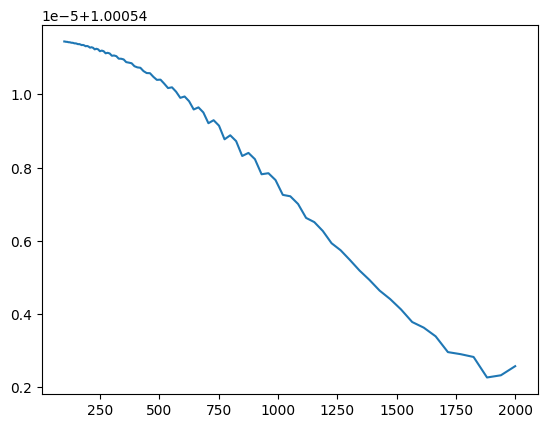

In [160]:
plt.plot(consts.ell, (c1h_m21code_with_my_djcs/c1h_m21)[-1,-1])

In [189]:
tst_hmalpha_cibcib = np.random.normal(loc=1.0,scale=0.01,size=(6,6,1,1))

In [201]:
shotnoise_cibcib = np.random.normal(loc=1000.0,scale=100,size=(6,6,1))

In [202]:
# test cibcrosscib_cell_tot

c_cibcib = ps.cibcrosscib_cell_tot(tst_hmalpha_cibcib, cibterm, 
                                   djc, djsub, uprof_me,
                                   shotnoise_cibcib)

In [204]:
djc.shape

(6, 100, 102)

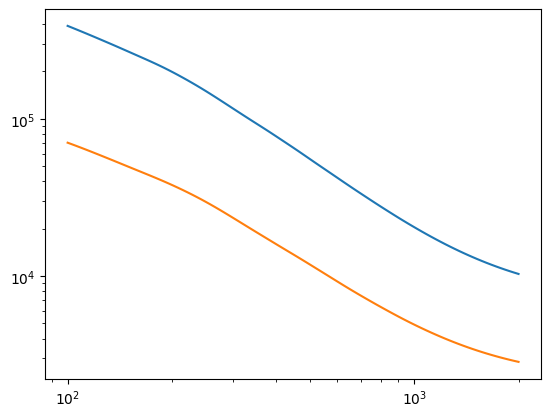

In [203]:
plt.loglog(consts.ell, c_cibcib[-1,-1])
plt.loglog(consts.ell, c_cibcib[-2,-2])

### Data test

In [27]:
# best fit from Rocher et al. 2023
fexp = 0; tau_prof = 6.14; lambda_NFW = 1 # use 1 because treat fully NFW
prof_params = fexp, tau_prof, lambda_NFW
uprof,_,unfw = halo.uprof_mixed(prof_params=prof_params, 
                         rad200=pc.rad200, 
                         c=pc.concentration, 
                         c_term=pc.concentration_amp, 
                         plot=True)


In [28]:
unfw[:,:,0] = 0

In [13]:
# values from Y23
#etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM
#params_sfr = (0.49, 11.52, -0.02, 2.74, 0.5, 2.15, 12.54, 0.4) 

In [14]:
#cterm,_,_ = cib.cibterm(params=params_sfr, u=unfw, cib_model='M21')

In [15]:
# # 857 X 857
# cterm1 = cterm[-1]
# cterm2 = cterm[-1]

# tst = ps.cibcrosscib_cell_2h(cterm1, cterm2)

In [29]:
# color correction 
cc_pl = np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995]) 

Import M21 values

In [30]:
dat_M21 = {} # dict to store values 
freqs = ['353', '545', '857']

# col 0: ell, col 1: pk (Jy/sr), col 2: error pk
for f1 in freqs:
    for f2 in freqs:
        if int(f1) > int(f2):
            continue
        else:
            dat_M21[f'{f1}x{f2}'] = np.genfromtxt("data/maniyar21/CIB" + f1 + "x" + f2 + ".txt")

Text(0.5, 1.0, 'Data from M21')

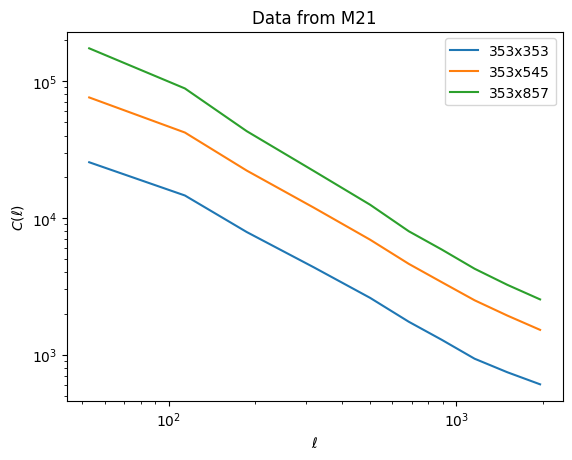

In [31]:
# for plotting check all variations with 353

for f1 in freqs:
    plt.loglog(dat_M21[f'353x{f1}'][:,0], dat_M21[f'353x{f1}'][:,1],
               label = f'353x{f1}')
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C (\ell) $")
plt.legend(loc = 'best')
plt.title("Data from M21")

Generate values from theory code

In [32]:
# M21 best fits
# etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM
params_sfr = (0.42, 12.94, 0, 1.75, 1.17, 1.5, 12.94, 0.4) 

In [34]:
cterm= cib.cibterm(params=params_sfr, u=unfw, cib_model='M21')

you set meanIR to 1 by hand for testing.


In [35]:
# idx = 3 is freq 353
# idx = 4 is freq 545
# idx = 5 is freq 857
idx = 5
cterm1 = cterm[idx]
cterm2 = cterm[idx]
cibxcib_2h = ps.cibcrosscib_cell_2h(cterm1, cterm2)

In [36]:
seff_me=cib.Seff(1,model='M21')

In [37]:
djc = cib.djc_dlogMh(params_sfr=params_sfr,
                     seff=seff_me,
                     model='M21')

djsub = cib.djsub_dlogMh(params_sfr=params_sfr,
                     seff=seff_me,
                     model='M21')

you set meanIR to 1 by hand for testing.


In [38]:
djc_t = djc#[:,:,1:]
djsub_t = djsub#[:,:,1:]
unfw_t = unfw#[:,:,1:]

In [39]:
c1h_me = ps.cibcrosscib_cell_1h(djc_nu=djc_t[idx],
                                djc_nu_prime=djc_t[idx],
                                djsub_nu=djsub_t[idx],
                                djsub_nu_prime=djsub_t[idx],
                                uprof=unfw_t)

In [40]:
import sys 
sys.path.append("/Users/tkarim/Documents/research/DopplerCIB")

import CIB_halo as mcib
import cosmo_related as mcosmo
import input_var_cibmean as minput
import Gal_halo as mgh
import CIBxGal_halo as mcg
import hmf_unfw_bias as mhmf_unfw

In [41]:
# setup relevant objects to pass to Abhi's code 

cosmo_var = mcosmo.cosmo_var_iv(mass=consts.Mh_Msol,
                                z=consts.Plin['z'][1:],
                                do_powerspec=1)

# experimental specification 

cib_exp = 'Planck'
# color corrections for 100, 143, 217, 353, 545, 857 and 3000 GHz for Planck
cc_pl = np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995])  # , 0.960])
cc = cc_pl  

nu0 = np.array([100., 143., 217., 353., 545., 857.]) 
nus = ['100', '143', '217', '353', '545', '857']
# fwhm obtained from https://wiki.cosmos.esa.int/planckpla/index.php/Effective_Beams
fwhm = np.array([9.651, 7.248, 4.990, 4.818, 4.682, 4.325])  # in arcmin
fwhm_rad = fwhm*(np.pi/180.)/60.
# fwhm = 4.8  # 4.8 Planck arcmin # 0.5 CCAT-Prime
# 1303.5067 for sensitivity (Tab:4 muK deg & kJy/sr deg)
sensitivity_muKarcmin = np.array([108., 48., 60., 210., 1137., 29075.])
sensitivity_Jy2_sr = np.array([58., 26.929, 72., 305, 369., 369.])
sensitivity_Jy_sr = np.sqrt(sensitivity_Jy2_sr)
# sensitivity = 13.5  # 13.5 Planck Jy/sr  # 1.2 CCAT-Prime
ell = np.logspace(2, np.log10(2000), 99)
fc = np.ones(len(nu0))

strfig = "allcomponents_lognormal_sigevol_1p5zcutoff_nolens_onlyautoshotpar_no3000_gaussian600n857n1200_planck_spire_hmflog10.txt"
cibres = "/Users/tkarim/Documents/research/cib.nosync/data/one_halo_bestfit_"+strfig

exp = {'name': cib_exp,
          'do_cibmean': 0,
          'cc': cc,
          'fc': fc,
          'snuaddr': '/Users/tkarim/Documents/research/cib.nosync/data/filtered_snu_planck.fits',
          # 'nu0min': nu0min, 'nu0max': nu0max,
          # 'nucen': str(int(nucen)),
          'nu0': nu0,
          'ell': ell,
          'fwhm': fwhm,
          'sensitivity': sensitivity_Jy_sr,
          'cibpar_resfile': cibres,
          'nu_string': nus}

## initialize data_var_iv 

data_var_iv = minput.data_var_iv(exp = exp)

Calculating the halo mass function for given mass and redshift for CIB mean calculations.
[39.52037275]
5.298428495800479e-17
2.4832862197860225e-18


In [42]:
# modified mcibgal to not consider z = 0 

## initialize CIBXGal_halo.py

mcibgal_obj_pk = mcg.CIBxgal(data_var_iv=data_var_iv,
                          cosmo_var_iv=cosmo_var,
                          gal_exp='DESI_ELG',
                          r_l=1)

Plot theory over M21

In [43]:
cl_m21 = mcibgal_obj_pk.cl_cibtot()

4.7975558064681035e-31
sfrsub shape = (20, 101)
4.7975558064681035e-31
sfrsub shape = (20, 101)
pkt shape = (101, 99)


In [44]:
shotn = mcibgal_obj_pk.shot_cib()
shotn.shape

(6, 6, 99)

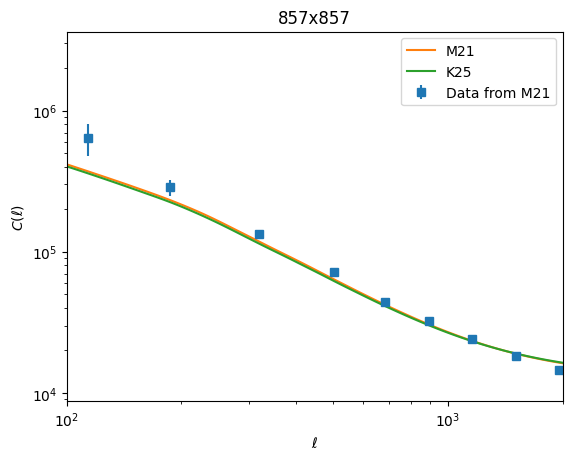

In [45]:
f1 = '857'
f2 = '857'    
plt.errorbar(dat_M21[f'{f1}x{f2}'][:,0], dat_M21[f'{f1}x{f2}'][:,1],
             yerr=dat_M21[f'{f1}x{f2}'][:,2],
             label = 'Data from M21',
             marker = "s", ls = "")

plt.loglog(consts.ell, cl_m21[-1,-1],
           label = 'M21')

plt.loglog(consts.ell, 
           (cibxcib_2h[0] + c1h_me) * cc_pl[idx]**2 + shotn[idx,idx],
           label = 'K25')

plt.xlim([100, 2000])
plt.title(f"{f1}x{f2}")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C (\ell) $")
# plt.xscale("log")
# plt.yscale("log")
plt.legend(loc = 'best')

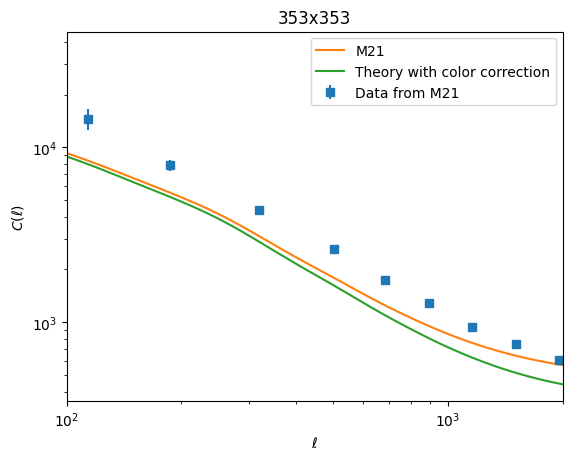

In [49]:
# 545 x 545
#idx = 4 is 545
 
idx1 = 3
idx2 = 3
cterm1 = cterm[idx1]
cterm2 = cterm[idx2]
cibxcib_2h = ps.cibcrosscib_cell_2h(cterm1, cterm2)

f1 = '353'
f2 = '353'   
plt.errorbar(dat_M21[f'{f1}x{f2}'][:,0], dat_M21[f'{f1}x{f2}'][:,1],
             yerr=dat_M21[f'{f1}x{f2}'][:,2],
             label = 'Data from M21', marker = "s", ls = "")

plt.loglog(consts.ell, cl_m21[3,3],
           label = 'M21')

plt.loglog(consts.ell, cibxcib_2h[0] * cc_pl[idx1]*cc_pl[idx2] +  + shotn[idx1,idx2],
           label = 'Theory with color correction')

plt.xlim([100, 2000])
plt.title(f"{f1}x{f2}")

plt.xlabel(r"$\ell$")
plt.ylabel(r"$C (\ell) $")
plt.legend(loc = 'best')

#### Test $\frac{d j_{\nu = 217 {\rm GHz}}}{d \log M_h}$ against 1304.3936v2

In [6]:
# Figure 5; z = 5
# logmh = [11.886396911934684, 11.979873795028787, 12.040353902905435, 12.090987167498735, 12.172443653256957, 12.288780605367542, 12.486315970051821, 12.630363284043892, 12.79395640149452, 13.054279418857151, 13.334813443729091]
# djnu_dlogmh = np.array([0.7103321033210328, 3.837638376383764, 7.324723247232472, 10.47970479704797, 13.883763837638377, 15.654981549815497, 12.61070110701107, 8.514760147601475, 4.6402214022140225, 1.2084870848708489, 0.1845018450184499])

# z = 2; centrals
logmh = [11.563472390108677, 11.692736458099732, 11.784080122112478, 11.840983443473307, 11.906982644653272, 11.986667449351003, 12.089263445687015, 12.188220342198697, 12.256154970283484, 12.370221844659785, 12.476100750570291, 12.620242397619007, 12.742418685321631, 12.880088127909083, 13.072420997294, 13.262710423540577, 13.510728800892966, 13.727730897766275]
djnu_dlogmh = np.array([0.3536585365853657, 2, 4.890243902439025, 7.634146341463414, 10.78048780487805, 14.365853658536585, 17.21951219512195, 18.46341463414634, 18.426829268292682, 17.073170731707314, 14.951219512195122, 11.73170731707317, 9.097560975609756, 6.573170731707317, 4.121951219512195, 2.3658536585365857, 0.975609756097561, 0.42682926829268286])

Text(0, 0.5, '$\\frac{d j_{\\nu}}{d \\log_{10} M_h}$')

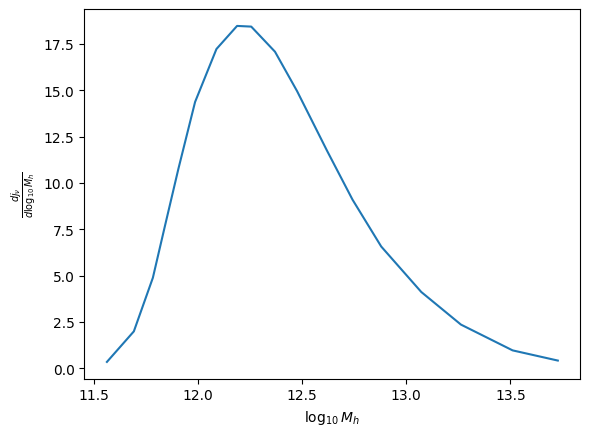

In [7]:
plt.plot(logmh, djnu_dlogmh)
plt.xlabel(r"$\log_{10} M_h$")
plt.ylabel(r"$\frac{d j_{\nu}}{d \log_{10} M_h}$")

In [11]:
# calculate emissivity from cib module 
djc_djsub, djc, djsub = cib.cibterm(params_sfr,
                                    unfw,
                                    cib_model='M21')

# idx = 2 corresponds to 217 GHz
# shape (Mh, z)
# zidx = 51 corresponds to z = 5.05 
#z = 21 corresponds to z = 2.05

you set meanIR to 1 by hand for testing.


Text(0.5, 0, '$\\log M_h$')

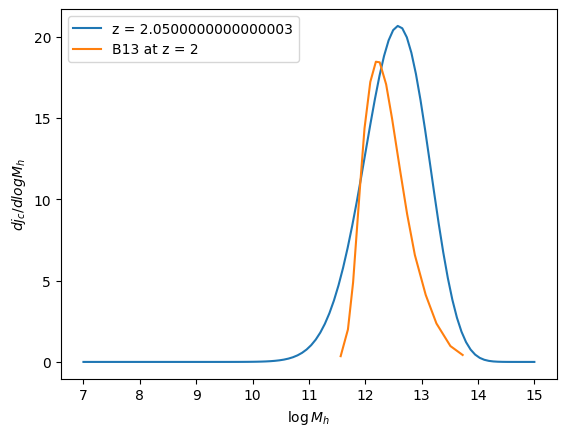

In [12]:
idx = 21
plt.plot(np.log10(consts.Mh_Msol), 
         (djc[2,:,21] * pc.hmfzT[:,idx]),#/(djc[2,:,21] * pc.hmfzT[:,21]).max(),
         label = f'z = {cib.z[21]}')
# plt.plot(np.log10(consts.Mh_Msol), djc[2,:,50]/djc[2,:,50].max(),
#          label = f'z = {cib.z[50]}')
# plt.plot(np.log10(consts.Mh_Msol), djc[2,:,5]/djc[2,:,5].max(),
#          label = f'z = {cib.z[5]}')
# plt.plot(np.log10(consts.Mh_Msol), djc[2,:,-1]/djc[2,:,-1].max(),
#          label = f'z = {cib.z[-1]}')
#plt.plot(logmh, djnu_dlogmh/djnu_dlogmh.max(), label = 'B13 at z = 2')
plt.plot(logmh, djnu_dlogmh, label = 'B13 at z = 2')
plt.legend(loc = 'best')
plt.ylabel(r"$d j_c/d log M_h$")
plt.xlabel(r"$\log M_h$")

# Compare between Abhi's code and mine

### `DopplerCIB` code

In [30]:
zidx = 12
mhub = mhmf_unfw.h_u_b(kk = consts.k_grid_over_ell[:,zidx],
                   power = consts.Pk_array_over_ell[:,zidx],
                   z = consts.Plin['z'][zidx],
                   cosmo = cosmo,
                   delta_h = 200,
                   mh = consts.Mhc_Msol)

In [31]:
tstme = halo.nfwfourier_u(lambda_NFW=1, 
                  rad200=pc.rad200, 
                  c=pc.concentration, 
                  c_term=pc.concentration_amp)

In [37]:
tstseff=cib.Seff(1,model='M21')

In [38]:
tstme = cib.djc_dlogMh(params_sfr=(mcibgal_obj.etamax,
                                   np.log10(mcibgal_obj.Meffmax),
                                   0.0,mcibgal_obj.sigmaMh,
                                   mcibgal_obj.tau,
                                   mcibgal_obj.z_c,
                                   11,1),
                       model='M21',
                       seff=tstseff)

you set meanIR to 1 by hand for testing.


Text(0.5, 0, 'Mass')

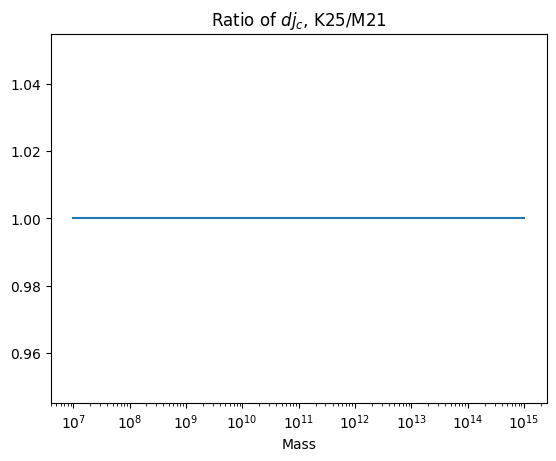

In [39]:
plt.semilogx(consts.Mh_Msol, tstme[-3,:,5]/mdjc[-3,:,5],
           label = 'K25/M21')
plt.title(r"Ratio of $dj_{c}$, K25/M21")
plt.xlabel("Mass")

#### Test $d j_{\rm sub}$

In [40]:
mdjsub = mcibgal_obj.djsub_dlnMh()

4.323661263288425e-31
sfrsub shape = (20, 102)


In [41]:
tstseff=cib.Seff(1,model='M21')

In [42]:
tstdjsub = cib.djsub_dlogMh((mcibgal_obj.etamax,
                                   np.log10(mcibgal_obj.Meffmax),
                                   0.0,mcibgal_obj.sigmaMh,
                                   mcibgal_obj.tau,
                                   mcibgal_obj.z_c,
                                   11,1),
                             tstseff,'M21')

Text(0.5, 0, 'Mass')

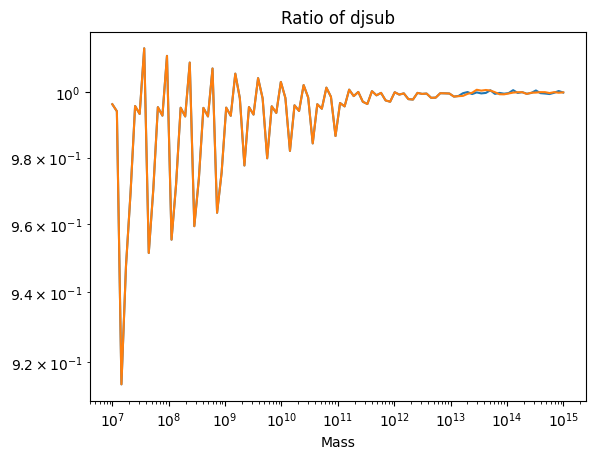

In [44]:
plt.loglog(consts.Mh_Msol, mdjsub[-2,:,56]/tstdjsub[-2,:,56])
plt.loglog(consts.Mh_Msol, mdjsub[-1,:,6]/tstdjsub[-1,:,6])
plt.title("Ratio of djsub")
plt.xlabel("Mass")

## Test $C_{2h}$

In [53]:
c2h_m21 = mcibgal_obj_pk.twohalo_int()

4.7975558064681035e-31
sfrsub shape = (20, 101)
pkt shape = (101, 99)


In [54]:
c1h_m21 = mcibgal_obj_pk.onehalo_int()

4.7975558064681035e-31
sfrsub shape = (20, 101)


In [55]:
uprof = halo.nfwfourier_u(lambda_NFW=1, 
                  rad200=pc.rad200, 
                  c=pc.concentration, 
                  c_term=pc.concentration_amp)

In [59]:
cibterm,_,_ = cib.cibterm((mcibgal_obj_pk.etamax, 
                       np.log10(mcibgal_obj_pk.Meffmax),
0.0,mcibgal_obj_pk.sigmaMh,
mcibgal_obj_pk.tau,
mcibgal_obj_pk.z_c, 11, 1)
                      , uprof, 'M21')

you set meanIR to 1 by hand for testing.


In [60]:
cibterm.shape

(6, 99, 100, 102)

In [62]:
idx1 = -1
idx2 = -1
c2h_me = ps.cibcrosscib_cell_2h(cibterm[idx1],
                       cibterm[idx2])

Text(0.5, 1.0, 'K25/M21 CIB X CIB')

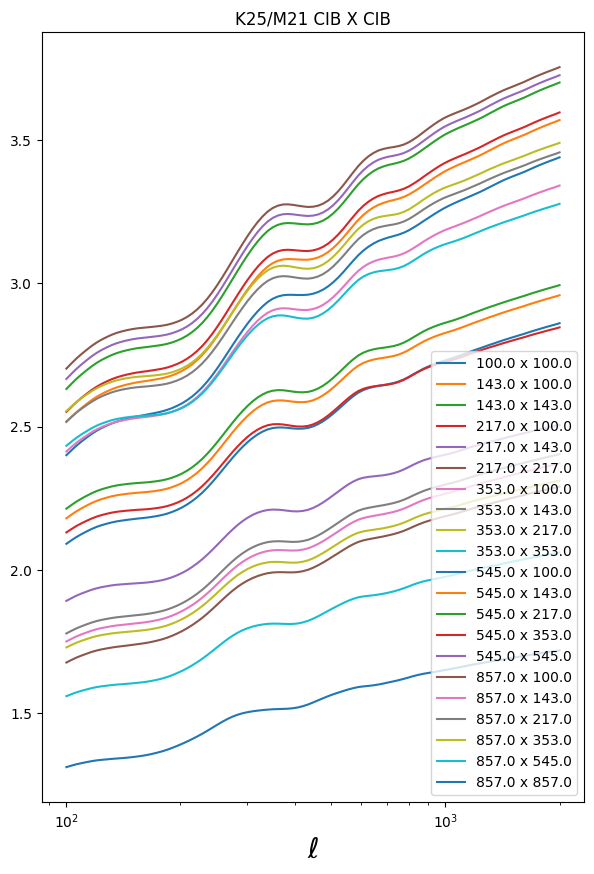

In [64]:
plt.figure(figsize=(7,10))
for idx1 in range(6):
    for idx2 in range(6):
        if idx2 > idx1:
            continue
        
        c2h_me = ps.cibcrosscib_cell_2h(cibterm[idx1],
                       cibterm[idx2])
        
        plt.semilogx(ell, 
                   (c2h_me[0]*mcibgal_obj_pk.cc[idx1]*mcibgal_obj_pk.cc[idx2])/c2h_m21[idx1,idx2], 
                   label = f'{consts.nu0[idx1]} x {consts.nu0[idx2]}')
        
plt.legend(loc = 'best')
plt.xlabel(r"$\ell$", fontsize = 20)
plt.title("K25/M21 CIB X CIB")

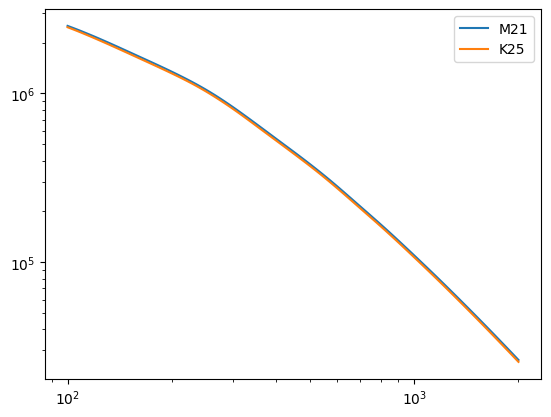

In [68]:
#plt.loglog(ell, (c2h_me[0]*mcibgal_obj_pk.cc[idx1]*mcibgal_obj_pk.cc[idx2])/c2h_m21[idx1,idx2], label = 'K25/M21')
# plt.loglog(ell, c2h_m21[idx1,idx2], label = 'M21')
# plt.loglog(ell, 
#            c2h_me[0]*mcibgal_obj_pk.cc[idx1]*mcibgal_obj_pk.cc[idx2], 
#            label='K25')
plt.legend(loc='best')

In [24]:
consts.Plin['pk'].shape

(103, 500)

In [26]:
addr = '/Users/tkarim/Documents/research/DopplerCIB/data_files/matter_power_spectra'
pkarray_m21 = np.loadtxt('%s/test_highk_lin_matterpower_210.dat' % (addr))
redshifts = np.loadtxt('/Users/tkarim/Documents/research/DopplerCIB/data_files/redshifts.txt')

In [30]:
ll = [str(x) for x in range(1, 211)]

In [31]:
k_m21 = pkarray_m21[:, 0]*planck.h
Pk_m21 = np.zeros((len(k_m21), len(redshifts)))
for i in range(len(redshifts)):
    pkarray_m21 = np.loadtxt("%s/test_highk_lin_matterpower_%s.dat" % (addr, ll[209-i]))
    Pk_m21[:, i] = pkarray_m21[:, 1]/planck.h**3

In [40]:
consts.Plin['z'][27]

2.6500000000000004

In [52]:
consts.Plin['k']

(500,)

In [51]:
consts.Plin['pk'][27]

array([2.39995559e+02, 2.45400018e+02, 2.50925943e+02, 2.56576049e+02,
       2.62353112e+02, 2.68259972e+02, 2.74299527e+02, 2.80474738e+02,
       2.86788626e+02, 2.93244276e+02, 2.99844845e+02, 3.06593555e+02,
       3.13493704e+02, 3.20548661e+02, 3.27761868e+02, 3.35136844e+02,
       3.42677172e+02, 3.50386514e+02, 3.58268612e+02, 3.66327288e+02,
       3.74566444e+02, 3.82990070e+02, 3.91602239e+02, 4.00407115e+02,
       4.09408944e+02, 4.18612061e+02, 4.28020894e+02, 4.37639963e+02,
       4.47473884e+02, 4.57527357e+02, 4.67805180e+02, 4.78312253e+02,
       4.89053577e+02, 5.00034250e+02, 5.11259474e+02, 5.22734559e+02,
       5.34464925e+02, 5.46456093e+02, 5.58713694e+02, 5.71243472e+02,
       5.84051286e+02, 5.97143110e+02, 6.10525025e+02, 6.24203232e+02,
       6.38184054e+02, 6.52473938e+02, 6.67079424e+02, 6.82007173e+02,
       6.97263973e+02, 7.12856745e+02, 7.28792527e+02, 7.45078487e+02,
       7.61721926e+02, 7.78730282e+02, 7.96111110e+02, 8.13872069e+02,
      

In [45]:
redshifts[112]

2.673

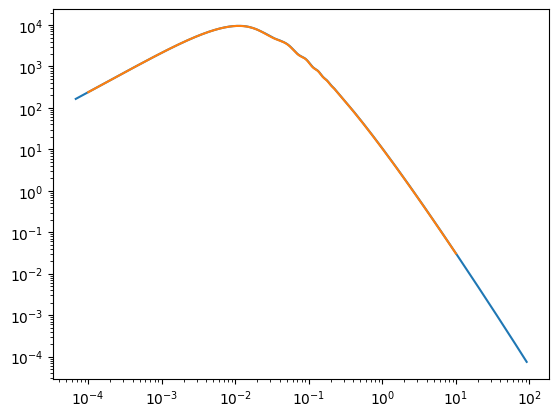

In [53]:
plt.loglog(k_m21, Pk_m21[:,112])
plt.loglog(consts.Plin['k'], consts.Plin['pk'][27])

### Test $C^{\rm CIB-CIB}_{\rm 1-h} (\ell)$ part of the code

In [10]:
seff_me=cib.Seff(1,model='M21')

In [11]:
uprof = halo.nfwfourier_u(lambda_NFW=1, 
                          rad200=pc.rad200, 
                          c=pc.concentration, 
                          c_term=pc.concentration_amp)

In [12]:
djc = cib.djc_dlogMh(params_sfr=(mcibgal_obj_pk.etamax, 
                   np.log10(mcibgal_obj_pk.Meffmax),
                   0.0,mcibgal_obj_pk.sigmaMh,
                   mcibgal_obj_pk.tau,
                   mcibgal_obj_pk.z_c, 11, 1),
                     seff=seff_me,
                     model='M21')

you set meanIR to 1 by hand for testing.


In [13]:
djsub = cib.djsub_dlogMh(params_sfr=(mcibgal_obj_pk.etamax, 
                   np.log10(mcibgal_obj_pk.Meffmax),
                   0.0,mcibgal_obj_pk.sigmaMh,
                   mcibgal_obj_pk.tau,
                   mcibgal_obj_pk.z_c, 11, 1),
                     seff=seff_me,
                     model='M21')

In [14]:
idx1 = -1
idx2 = -1
print(f'Analyzing {consts.nu0[idx1]} X {consts.nu0[idx2]}')

Analyzing 857.0 X 857.0


In [19]:
c1h_me = ps.cibcrosscib_cell_1h(djc_nu=djc[idx1],
                                djc_nu_prime=djc[idx2],
                                djsub_nu=djsub[idx1],
                                djsub_nu_prime=djsub[idx2],
                                uprof=uprof)

/Users/tkarim/Documents/research/cib.nosync/powerspectra.py:220: RuntimeWarning: invalid value encountered in multiply
  prefact = geo * wcibwcib


In [ ]:
djc_nu=djc[idx1],
                                djc_nu_prime=djc[idx2],
                                djsub_nu=djsub[idx1],
                                djsub_nu_prime=djsub[idx2],
                                uprof=uprof

In [80]:
t1 = (djc_m21[idx1] * djs_m21[idx2]*u_m21)
t1.shape

(99, 100, 102)

In [85]:
t2 = (djc_m21[idx2]*djs_m21[idx1]*u_m21)
t2.shape

(99, 100, 102)

In [86]:
t3 = (djs_m21[idx1]*djs_m21[idx2]*(u_m21**2))
t3.shape

(99, 100, 102)

In [87]:
t_tot = t1 + t2 + t3
t_tot.shape

(99, 100, 102)

In [95]:
#integrand = t_tot*ps.hmfzT[0,:,:,1:]
integrand = t_tot*mcibgal_obj_pk.hmfmz

In [105]:
print(mcibgal_obj_pk.hmfmz.shape)
ps.hmfzT[0,0,:,1:][:,30].shape

(100, 102)


(100,)

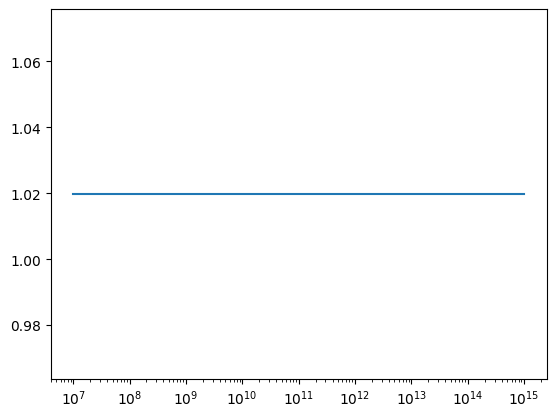

In [31]:
plt.semilogx(consts.Mh_Msol, 
           (mcibgal_obj_pk.hmfmz[:,30]/.67**2)/ps.hmfzT[0,0,:,1:][:,30], 
           label = 'M21')
# plt.loglog(consts.Mh_Msol,
#            ps.hmfzT[0,0,:,1:][:,30],
#            label = 'K25')

In [96]:
integrand.shape

(99, 100, 102)

In [97]:
from scipy.integrate import simpson

In [98]:
mid_integral = simpson(integrand,dx=ps.dm,axis=1)
mid_integral.shape

(99, 102)

In [99]:
final = simpson(mid_integral*ps.wcibwcib[1:]*ps.geo[1:], 
                x = consts.Plin['z'][1:], 
                axis = 1)
final.shape

(99,)

In [100]:
final/c1h_m21[idx1,idx2]

array([1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755, 1.0100755,
       1.0100755, 1.0100755, 1.0100755, 1.0100755, 

In [20]:
c1h_m21, djc_m21, djs_m21, u_m21, hmf_m21 = mcibgal_obj_pk.onehalo_int()

4.323661263288425e-31
sfrsub shape = (20, 102)
98 5


In [21]:
djc_m21.shape

(6, 100, 102)

In [22]:
u_m21.shape

(100, 99, 102)

In [23]:
u_m21 = np.moveaxis(u_m21,1,0)

In [26]:
tst_m21 = ps.cibcrosscib_cell_1h(djc_nu=djc_m21[idx1],
                       djc_nu_prime=djc_m21[idx2],
                       djsub_nu=djs_m21[idx1],
                       djsub_nu_prime=djs_m21[idx2],
                       uprof=u_m21)

/Users/tkarim/opt/anaconda3/envs/cosmo/lib/python3.10/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/tkarim/Documents/research/cib.nosync/powerspectra.py:220: RuntimeWarning: invalid value encountered in multiply
  prefact = geo * wcibwcib


In [27]:
tst_m21.shape

(99,)

In [28]:
c1h_m21.shape

(6, 6, 99)

In [29]:
c1h_me.shape

(99,)

In [35]:
fcxcc=mcibgal_obj_pk.fc*mcibgal_obj_pk.cc

In [37]:
fcxcc

array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995])

In [43]:
tst_m21*fcxcc[idx1]*fcxcc[idx2]

array([14000.25318361, 14000.18674974, 14000.11624763, 14000.04117227,
       13999.96153936, 13999.87670107, 13999.78671975, 13999.69089057,
       13999.58920335, 13999.48098066, 13999.36606871, 13999.24385482,
       13999.11400399, 13998.97598741, 13998.82927247, 13998.67341578,
       13998.50765845, 13998.33166502, 13998.1444043 , 13997.94568741,
       13997.73415264, 13997.50978866, 13997.2708506 , 13997.01749395,
       13996.74769123, 13996.46152158, 13996.15699809, 13995.83380305,
       13995.49012798, 13995.12516508, 13994.7373269 , 13994.32527248,
       13993.8876532 , 13993.42251708, 13992.92880502, 13992.40384408,
       13991.84694724, 13991.25458201, 13990.6265511 , 13989.95827172,
       13989.25010863, 13988.49644863, 13987.69777262, 13986.8484432 ,
       13985.94793863, 13984.99109817, 13983.97614134, 13982.89853951,
       13981.75502655, 13980.54183279, 13979.25412822, 13977.88887946,
       13976.43951081, 13974.90392113, 13973.27347989, 13971.54729301,
      

In [46]:
(tst_m21*fcxcc[idx1]*fcxcc[idx2])/c1h_m21[-1,-1]

array([2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441934,
       2.18441934, 2.18441934, 2.18441934, 2.18441934, 2.18441

In [111]:
djc.shape

(6, 100, 103)

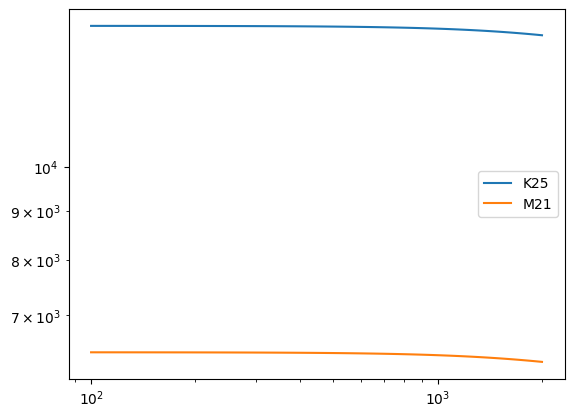

In [98]:
plt.loglog(ell,
           c1h_me*mcibgal_obj_pk.cc[idx1]*mcibgal_obj_pk.cc[idx1],
           label='K25')
plt.loglog(ell,c1h_m21[idx1,idx2,:],label='M21')
plt.legend(loc='best')

In [95]:
# 2-halo temr
cibterm = cib.cibterm((mcibgal_obj_pk.etamax, 
                       np.log10(mcibgal_obj_pk.Meffmax),
0.0,mcibgal_obj_pk.sigmaMh,
mcibgal_obj_pk.tau,
mcibgal_obj_pk.z_c, 11, 1)
                      , uprof, 'M21')

c2h_me = ps.cibcrosscib_cell_2h(cibterm[idx1],
                       cibterm[idx2])

you set meanIR to 1 by hand for testing.


/Users/tkarim/Documents/research/cib.nosync/powerspectra.py:184: RuntimeWarning: invalid value encountered in multiply
  prefact = geo * wcibwcib


In [96]:
c2h_me[0].shape

(99,)

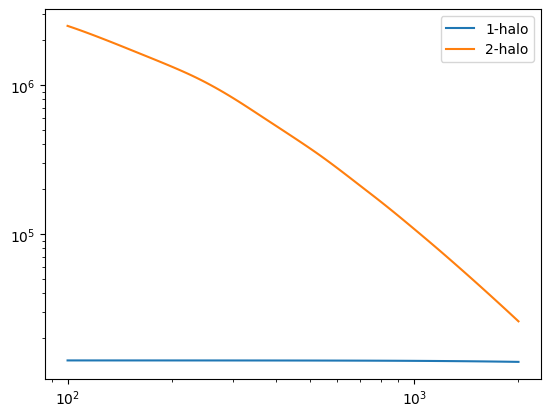

In [97]:
plt.loglog(ell,c1h_me,label='1-halo')
plt.loglog(ell,c2h_me[0],label='2-halo')
plt.legend(loc='best')

In [59]:
cib_data = pickle.load(open("data/cib/cibdata_1024_eq.pkl", "rb"))

In [62]:
np.save("data/cib/cibdata_1024_eq.npy",cib_data)

# Generate theory $C_{gg}$ and $C_{Ig}$ curves with $p(z)$ variations

We need to generate a suite of $1000$ theory curves per CIB ferquency to assess the variation coming from $p(z)$ uncertainty. We read in the $p(z)$ file with each variation and run it through the pipeline and obtain the curves. 

We have to ensure that the cosmology used is consistent.

In [9]:
import gal
import powerspectra as ps
import consts
import precalc as pc
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

/Users/tkarim/research/galCIB/powerspectra.py:64: RuntimeWarning: divide by zero encountered in log10
  ELL_sampled = np.logspace(np.log10(consts.LMIN),


In [42]:
# define fiducial values for M21 model

hmalphas = np.ones(28) # 1- to 2- halo smoothing transition parameter is set to 1
shotnoise_gCIB = np.zeros(27) #np.ones(27) #* 10**9 # set all the g X CIB and CIB X CIB shot noises to be 1e9 by default following Y23
gal_params = np.array([5.47, 11.64, 0.30, 0.1, # Ncen (4): gamma, log10Mc, sigmaM, Ac
                       0.41, 11.20, 10**13.84 * (0.41)**(1/0.81), 0.81]) # Nsat (4): As, M0, M1, alpha
prof_params = np.array([0.58, 6.14, 0.67]) # fexp, tau, lambda_NFW
cib_params = np.array([0.49, 11.52, -0.02, 2.74, 0.5, 2.15, 11.38, 0.4]) # SFR (6): etamax, mu_peak0, mu_peakp, sigma_M0, tau, zc, Mmin_IR, IR_sigma_lnM

all_params = np.concatenate((hmalphas, shotnoise_gCIB, gal_params, prof_params, cib_params))

/Users/tkarim/research/galCIB/powerspectra.py:64: RuntimeWarning: divide by zero encountered in log10
  ELL_sampled = np.logspace(np.log10(consts.LMIN),


In [43]:
theory_c_ells = ps.c_all(all_params, cib_model='M21',NSIDE=1024)

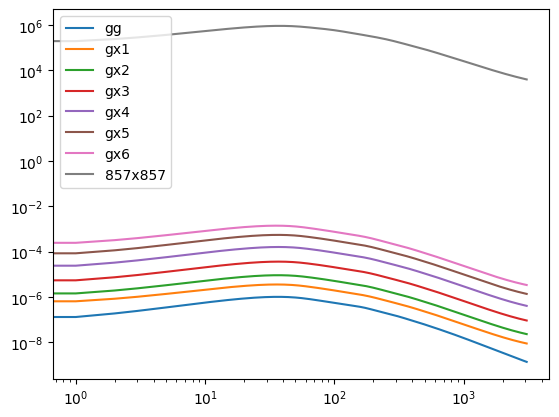

In [57]:
NSIDE = 1024
LMAX = 3*NSIDE-1
ells = np.arange(0,LMAX)
plt.loglog(ells, theory_c_ells[0], label = 'gg')

for i in range(1,7):
    plt.loglog(ells, theory_c_ells[i], label = f'gx{i}')
plt.loglog(ells, theory_c_ells[-1], label = '857x857')
#plt.loglog(ells, theory_c_ells[4], label = 'g545')
#plt.loglog(ells, theory_c_ells[5], label = 'g857')
#plt.loglog(ells, theory_c_ells[7] * 1e-12, label = '1x1')
plt.legend(loc='best')

In [45]:
tmp_gg = theory_c_ells[0]
tmp_g100 = theory_c_ells[1]
tmp_1x1 = theory_c_ells[7]

In [46]:
import healpy as hp
del_g, del_100 = hp.synfast([tmp_gg, tmp_g100, tmp_1x1], nside = 1024, pol = False)

In [47]:
tst_cgg = hp.anafast(del_g, del_g, pol=False)
tst_cgI = hp.anafast(del_g, del_100, pol=False)
tst_cII = hp.anafast(del_100, del_100, pol = False)

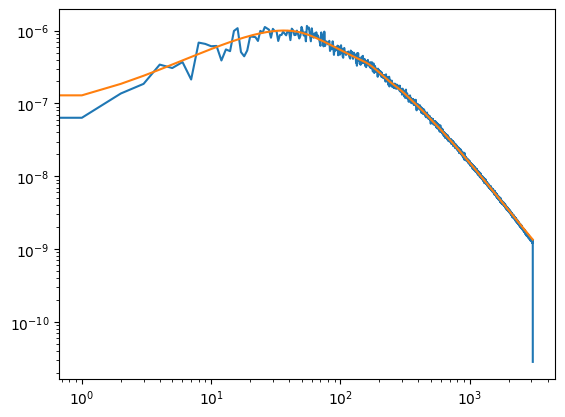

In [48]:
plt.loglog(tst_cgg, label = 'sim gg')
plt.loglog(tmp_gg, label = 'th gg')

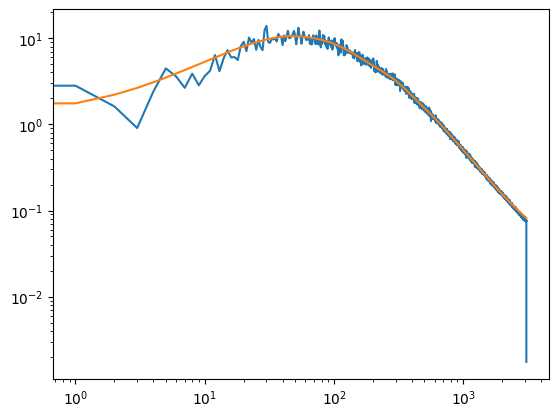

In [49]:
plt.loglog(tst_cII, label = 'sim 353 x 353')
plt.loglog(tmp_1x1, label = 'th 353 x 353')

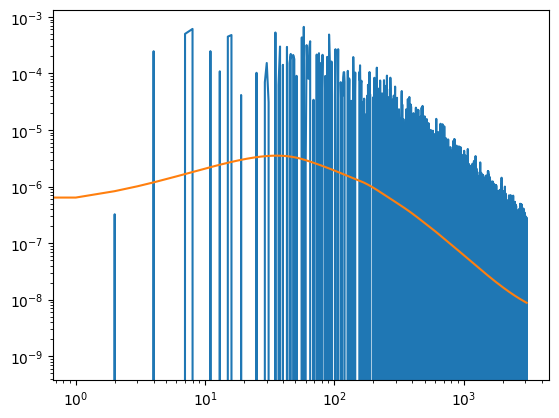

In [51]:
plt.loglog(tst_cgI, label = 'sim g x 353')
plt.loglog(tmp_g100, label = 'th g x 353')

In [8]:
# read all the pz values 
import pickle
import time 

dndz_all = pickle.load(open("/Users/tkarim/Documents/research/galCIB/data/gal/dndz_extended.p", "rb"))

In [9]:
# loop over all the 1000 p(z) realizations

# save values 
theory_c_ells_ensemble = np.zeros((1000,28,LMAX)) # nsims x # of 2pcf x ell range (0,3*NSIDE-1)

# dictionary to store realizations of pz 
dict_pz = {}
dict_pz['z'] = dndz_all['zrange']

mag_bias = consts.dict_gal['ELG']['mag_bias_alpha']

start = time.time()

for i in range (1000):
    if (i%100 == 0):
        print(i)
    dict_pz['pz'] = dndz_all['dndz'][i]
    theory_c_ells_ensemble[i] = ps.c_all(all_params, cib_model='M21',NSIDE=1024,
                                         pz=dict_pz,
                                         mag_bias_alpha=mag_bias)
    
print(f"Total time = {time.time() - start} seconds.")

0
100
200
300
400
500
600
700
800
900
Total time = 406.3270900249481 seconds.


In [10]:
theory_c_ells_ensemble.shape # gg
#theory_c_ells_ensemble[:,4:7,:].shape # gCIB

(1000, 28, 3071)

In [11]:
np.save("data/gal/theory_pz_variations.npy",theory_c_ells_ensemble)

#### Covariance and Correlation Matrix Plots

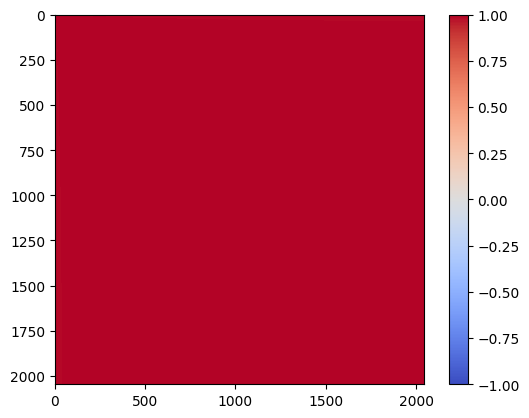

In [57]:
plt.imshow(np.corrcoef(theory_c_ells_ensemble[:,0,:].T),vmin=-1,vmax=+1,cmap='coolwarm')
plt.colorbar()

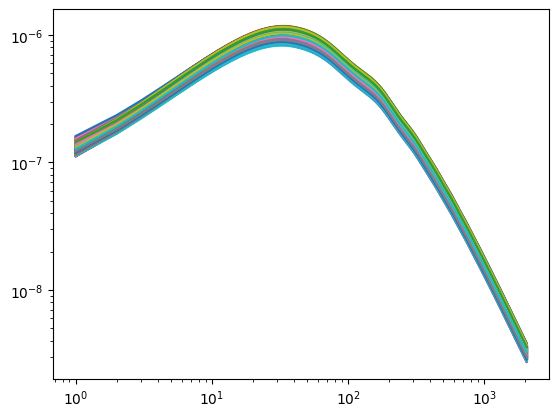

In [61]:
for i in range(1000):
    plt.loglog(ells, theory_c_ells_ensemble[i,0,:])

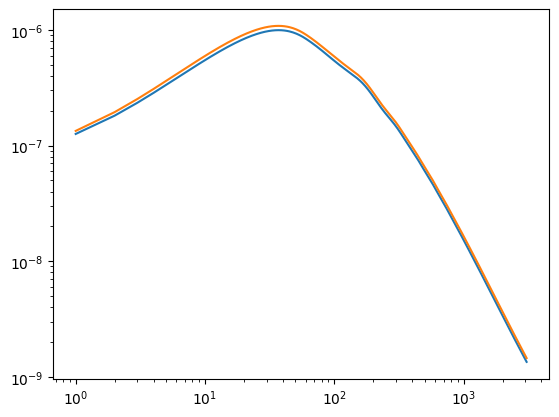

In [26]:
plt.loglog(ells, theory_c_ells_ensemble[10,0,:])
plt.loglog(ells, theory_c_ells_ensemble[100,0,:])

In [62]:
np.corrcoef(theory_c_ells_ensemble[:,0,:].T)

array([[1.        , 0.98429417, 0.96540479, ..., 0.88604198, 0.88604727,
        0.88605296],
       [0.98429417, 1.        , 0.99627493, ..., 0.94831388, 0.94831753,
        0.94832145],
       [0.96540479, 0.99627493, 1.        , ..., 0.96803603, 0.96803884,
        0.96804184],
       ...,
       [0.88604198, 0.94831388, 0.96803603, ..., 1.        , 1.        ,
        1.        ],
       [0.88604727, 0.94831753, 0.96803884, ..., 1.        , 1.        ,
        1.        ],
       [0.88605296, 0.94832145, 0.96804184, ..., 1.        , 1.        ,
        1.        ]])

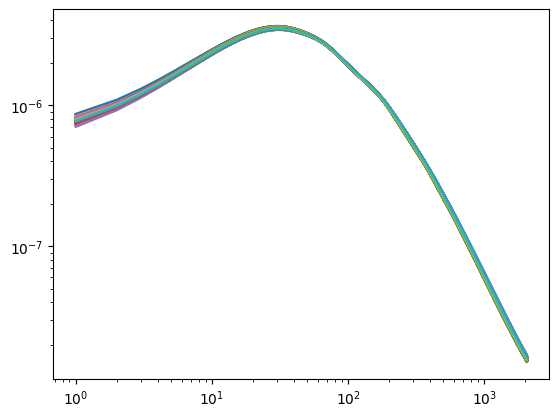

In [64]:
for i in range(1000):
    plt.loglog(ells, theory_c_ells_ensemble[i,1,:])

In [71]:
# read in skylens theory pz variations 

theory_c_ells_skylens = np.load("/Users/tkarim/Documents/research/galCIB/data/gal/theory_c_ell_pz_variation_2024May31_rongr_CMBlensing.npy",
                                allow_pickle=True)

In [84]:
theory_c_ells_skylens[()]['gg'].shape

(1000, 3072)

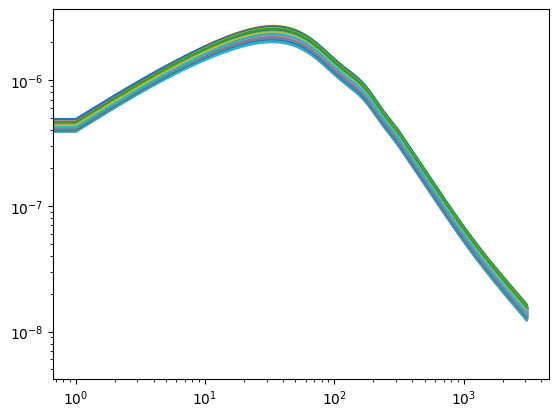

In [86]:
tmp = np.arange(3072)
for i in range(1000):
    plt.loglog(tmp, theory_c_ells_skylens[()]['gg'][i])

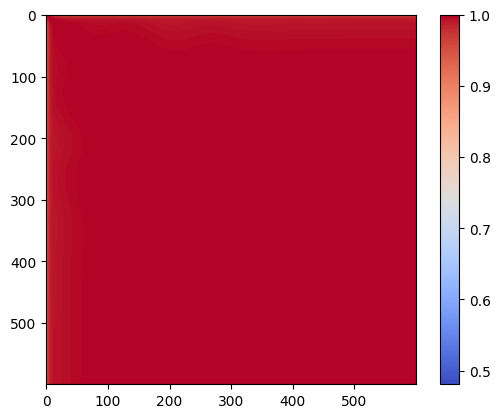

In [189]:
plt.imshow(np.corrcoef(theory_c_ells_skylens[()]['gg'].T)[:600,:600],cmap='coolwarm')
plt.colorbar()

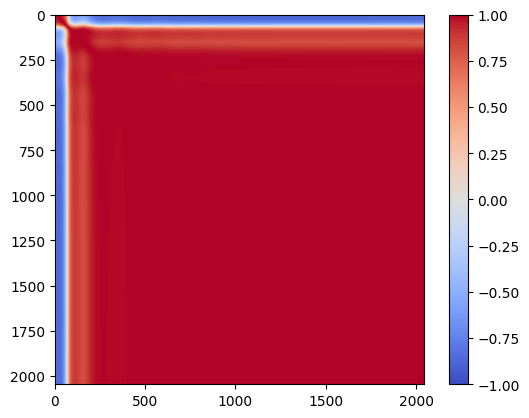

In [69]:
plt.imshow(np.corrcoef(theory_c_ells_ensemble[:,1,:].T), vmin=-1,vmax=+1,cmap='coolwarm')
plt.colorbar()

In [158]:
import itertools
def bin_mat(r=[],mat=[],r_bins=[]):
    """Sukhdeep's Code to bins data and covariance arrays

    Input:
    -----
        r  : array which will be used to bin data, e.g. ell values
        mat : array or matrix which will be binned, e.g. Cl values
        bins : array that defines the left edge of the bins,
               bins is the same unit as r

    Output:
    ------
        bin_center : array of mid-point of the bins, e.g. ELL values
        mat_int : binned array or matrix
    """

    bin_center=0.5*(r_bins[1:]+r_bins[:-1])
    n_bins=len(bin_center)
    ndim=len(mat.shape)
    mat_int=np.zeros([n_bins]*ndim,dtype='float64')
    norm_int=np.zeros([n_bins]*ndim,dtype='float64')
    bin_idx=np.digitize(r,r_bins)-1
    r2=np.sort(np.unique(np.append(r,r_bins))) #this takes care of problems around bin edges
    dr=np.gradient(r2)
    r2_idx=[i for i in np.arange(len(r2)) if r2[i] in r]
    dr=dr[r2_idx]
    r_dr=r*dr

    ls=['i','j','k','l']
    s1=ls[0]
    s2=ls[0]
    r_dr_m=r_dr
    for i in np.arange(ndim-1):
        s1=s2+','+ls[i+1]
        s2+=ls[i+1]
        r_dr_m=np.einsum(s1+'->'+s2,r_dr_m,r_dr)#works ok for 2-d case

    mat_r_dr=mat*r_dr_m
    for indxs in itertools.product(np.arange(min(bin_idx),n_bins),repeat=ndim):
        x={}#np.zeros_like(mat_r_dr,dtype='bool')
        norm_ijk=1
        mat_t=[]
        for nd in np.arange(ndim):
            slc = [slice(None)] * (ndim)
            #x[nd]=bin_idx==indxs[nd]
            slc[nd]=bin_idx==indxs[nd]
            
            if nd==0:
                mat_t=mat_r_dr[slc[0]]
            else:
                mat_t=mat_t[slc]
            norm_ijk*=np.sum(r_dr[slc[nd]])
        if norm_ijk==0:
            continue
        mat_int[indxs]=np.sum(mat_t)/norm_ijk
        norm_int[indxs]=norm_ijk
    return bin_center,mat_int


In [172]:
# bin data 
tmpELL = np.arange(100,2048,100) # bin centers

c_ells_skylens_binned = np.zeros((1000, tmpELL.shape[0]-1))

for i in range(1000):
    ELL_mid, c_ells_skylens_binned[i] = bin_mat(tmp[:2000], theory_c_ells_skylens[()]['gg'][i][:2000],tmpELL)

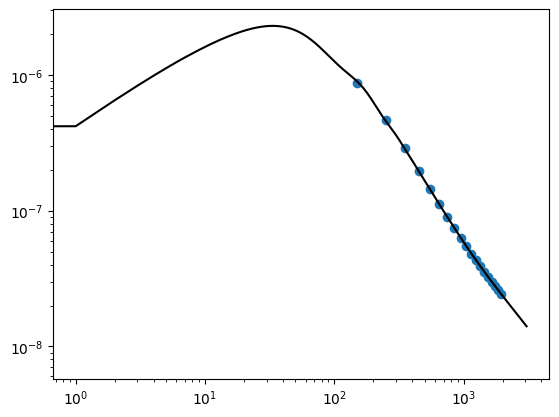

In [174]:
idx = 10
plt.scatter(ELL_mid, c_ells_skylens_binned[idx], label = 'binned')
plt.loglog(tmp, theory_c_ells_skylens[()]['gg'][idx], c = 'k')

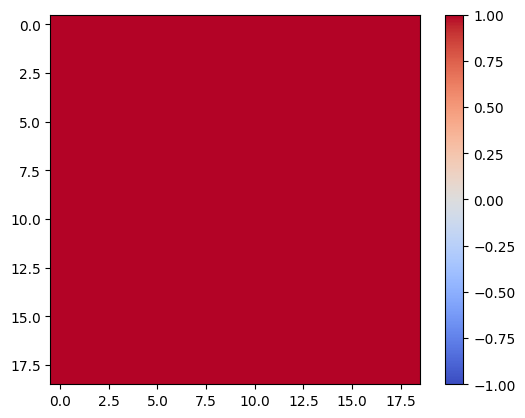

In [181]:
plt.imshow(np.corrcoef(c_ells_skylens_binned.T), vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.colorbar()

# Scratch